# Importation des bibliothèques

In [1]:
# Importation des bibliothèques nécessaires
# -----------------------------------------

# Manipulation et analyse des données
import pandas as pd  # Pour gérer les données sous forme de DataFrame
import numpy as np  # Pour effectuer des calculs mathématiques avancés

# Visualisation des données
import missingno as msno  # Visualisation des valeurs manquantes
import matplotlib.pyplot as plt  # Création de graphiques statiques
import seaborn as sns  # Graphiques statistiques avancés avec un style amélioré

# Statistiques et tests hypothétiques
from scipy.stats import (
    spearmanr,  # Test de corrélation de Spearman (variables ordinales ou continues)
    shapiro,    # Test de normalité de Shapiro-Wilk
    chi2_contingency,  # Test du chi carré pour les relations entre deux variables catégorielles
)

import scipy.stats as stats  # Fonctions statistiques générales

# Gestion des dates
from datetime import datetime  # Manipulation des dates et heures

from sklearn.preprocessing import KBinsDiscretizer  # Discrétisation des données en intervalles

# Importation des données

In [2]:
dfData= pd.read_csv("2016_Building_Energy_Benchmarking.csv")
dfData.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   
3                    0659000640  ...      8.115253e+05         2768924.0   
4                    0659000970  ...      1.573449e+06         5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   
3         18112.13086         1811213.0        False       NaN   
4         88039.98438         8803998.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  
3         Compliant      NaN             286.43                   4.67  
4         Compliant      NaN             505.01                   2.88  

[5 rows x 46 columns]

In [3]:
dfData.shape

(3376, 46)

In [4]:
dfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [5]:
# Liste des noms de toutes les colonnes
nom_colonnes = dfData.columns.tolist()

# Colonnes numériques
colonnes_numeriques = dfData.select_dtypes(include=['number']).columns.tolist()

# Colonnes textuelles
colonnes_textuelles = dfData.select_dtypes(include=['object', 'string']).columns.tolist()

# Afficher les résultats avec le nombre d'éléments
print("Noms des colonnes :", nom_colonnes, "\nNombre de colonnes :", len(nom_colonnes))
print("\nColonnes numériques :", colonnes_numeriques, "\nNombre de colonnes numériques :", len(colonnes_numeriques))
print("\nColonnes textuelles :", colonnes_textuelles, "\nNombre de colonnes textuelles :", len(colonnes_textuelles))

Noms des colonnes : ['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier', 'TotalGHGEmissions', 'GHGEmissionsIntensity'] 
Nombre de colonnes : 46

Colonnes 

| **Nom de la colonne**          | **Description**                                                                                                                                     | **Type**     |
|:-------------------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------|:-------------|
| OSEBuildingID                  | Identifiant unique pour chaque propriété couverte par l'ordonnance de benchmarking de Seattle.                                                     | Number       |
| DataYear                       | Année calendaire représentée par chaque enregistrement de données.                                                                                 | Number       |
| BuildingType                   | Classification du type de bâtiment par la ville de Seattle.                                                                                        | Text         |
| PrimaryPropertyType            | Usage principal d'une propriété (plus de 50 % de la fonction).                                                                                     | Text         |
| PropertyName                   | Nom officiel ou commun de la propriété tel qu'entré dans le gestionnaire de portefeuille de l'EPA.                                                 | Text         |
| Address                        | Adresse postale de la propriété.                                                                                                                   | Text         |
| City                           | Ville de la propriété.                                                                                                                             | Text         |
| State                          | État de la propriété.                                                                                                                              | Text         |
| ZipCode                        | Code postal de la propriété.                                                                                                                       | Number       |
| TaxParcelIdentificationNumber  | Identifiant fiscal de la propriété dans le comté de King.                                                                                          | Text         |
| CouncilDistrictCode            | District municipal de Seattle où se trouve la propriété.                                                                                          | Number       |
| Neighborhood                   | Quartier de la propriété tel que défini par le Département des quartiers de Seattle.                                                               | Text         |
| Latitude                       | Latitude de la propriété.                                                                                                                          | Number       |
| Longitude                      | Longitude de la propriété.                                                                                                                         | Number       |
| YearBuilt                      | Année de construction ou de rénovation complète de la propriété.                                                                                   | Number       |
| NumberofBuildings              | Nombre de bâtiments inclus dans le rapport de la propriété.                                                                                        | Number       |
| NumberofFloors                 | Nombre d'étages signalés dans le gestionnaire de portefeuille.                                                                                     | Number       |
| PropertyGFATotal               | Surface brute totale du bâtiment et du parking en pieds carrés.                                                                                    | Number       |
| PropertyGFAParking             | Surface totale des parkings en pieds carrés.                                                                                                       | Number       |
| PropertyGFABuilding(s)         | Surface totale en pieds carrés entre les murs extérieurs d'un bâtiment.                                                                            | Number       |
| ListOfAllPropertyUseTypes      | Tous les usages signalés de la propriété dans le gestionnaire de portefeuille.                                                                      | Text         |
| LargestPropertyUseType         | Plus grand usage de la propriété (par exemple, bureau, commerce de détail) par GFA.                                                                | Text         |
| LargestPropertyUseTypeGFA      | Surface brute de l'usage principal de la propriété en pieds carrés.                                                                                | Number       |
| SecondLargestPropertyUseType   | Deuxième plus grand usage de la propriété par GFA.                                                                                                 | Text         |
| SecondLargestPropertyUseTypeGFA| Surface brute de la deuxième utilisation de la propriété en pieds carrés.                                                                          | Number       |
| ThirdLargestPropertyUseType    | Troisième plus grand usage de la propriété par GFA.                                                                                                | Text         |
| ThirdLargestPropertyUseTypeGFA | Surface brute de la troisième utilisation de la propriété en pieds carrés.                                                                         | Number       |
| YearsENERGYSTARCertified       | Années où la propriété a reçu la certification ENERGY STAR.                                                                                        | Text       |
| ENERGYSTARScore                | Score ENERGY STAR (1-100) pour évaluer la performance énergétique globale d'une propriété.                                                          | Number         |
| SiteEUI(kBtu/sf)               | Intensité énergétique de site : énergie consommée divisée par la surface brute en milliers de BTU par pied carré.                                  | Number       |
| SiteEUIWN(kBtu/sf)             | Intensité énergétique de site normalisée pour les conditions météorologiques (WN) en milliers de BTU par pied carré.                               | Number       |
| SourceEUI(kBtu/sf)             | Intensité énergétique source : énergie totale utilisée pour faire fonctionner la propriété, y compris les pertes, divisée par la surface brute.     | Number       |
| SourceEUIWN(kBtu/sf)           | Intensité énergétique source normalisée pour les conditions météorologiques (WN).                                                                  | Number       |
| SiteEnergyUse(kBtu)            | Quantité annuelle d'énergie consommée par la propriété, mesurée en milliers de BTU.                                                               | Number       |
| SiteEnergyUseWN(kBtu)          | Quantité annuelle d'énergie consommée ajustée pour les conditions météorologiques sur 30 ans, mesurée en milliers de BTU.                         | Number       |
| SteamUse(kBtu)                 | Quantité annuelle de vapeur consommée par la propriété, mesurée en milliers de BTU.                                                               | Number       |
| Electricity(kWh)               | Quantité annuelle d'électricité consommée par la propriété, mesurée en kilowattheures.                                                            | Number       |
| Electricity(kBtu)              | Quantité annuelle d'électricité consommée, mesurée en milliers de BTU.                                                                            | Number       |
| NaturalGas(therms)             | Quantité annuelle de gaz naturel consommée par la propriété, mesurée en thermes.                                                                  | Number       |
| NaturalGas(kBtu)               | Quantité annuelle de gaz naturel consommée, mesurée en milliers de BTU.                                                                           | Number       |
| DefaultData                    | Indique si des données par défaut ont été utilisées pour au moins une caractéristique de la propriété.                                             | Checkbox     |
| Comments                       | Commentaires fournis par un propriétaire ou un agent pour contextualiser l'utilisation de l'énergie.                                               | Number         |
| ComplianceStatus               | Statut de conformité de la propriété avec les exigences de benchmarking énergétique.                                                               | Text         |
| Outlier                        | Indique si une propriété est une valeur aberrante élevée ou basse (O/N) (Oui/Non).                                                                                        | Text         |
| TotalGHGEmissions              | Quantité totale d'émissions de gaz à effet de serre en équivalent CO2, mesurée en tonnes métriques.                                                | Number         |
| GHGEmissionsIntensity          | Intensité des émissions de gaz à effet de serre, mesurée en kilogrammes d'équivalent CO2 par pied carré.                                           | Number         |


**Structure des Données**<br>
Les données comprennent 46 colonnes, dont 30 numériques et 15 textuelles, couvrant divers aspects des bâtiments.<br>

**Informations d'Identification et de Localisation**<br>
**Identifiants** : OSEBuildingID, TaxParcelIdentificationNumber<br>
**Localisation** : Address, City, State, ZipCode, Latitude, Longitude<br>
**Données Administratives** : CouncilDistrictCode, Neighborhood<br>

**Caractéristiques Structurelles**<br>
**Taille et Usage** :<br>
PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s)<br>
NumberofBuildings, NumberofFloors<br>
BuildingType, PrimaryPropertyType<br>

**Utilisation** :<br>
ListOfAllPropertyUseTypes<br>
LargestPropertyUseType, SecondLargestPropertyUseType, ThirdLargestPropertyUseType<br>
LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseTypeGFA<br>

**Données Énergétiques et Environnementales**<br>
**Consommation d'Énergie** :<br>
SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu)<br>
Electricity(kWh), Electricity(kBtu)<br>
NaturalGas(therms), NaturalGas(kBtu)<br>
SteamUse(kBtu)<br>

**Efficacité Énergétique** :<br>
SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf)<br>
SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf)<br>
ENERGYSTARScore, YearsENERGYSTARCertified<br>

**Émissions** :<br>
TotalGHGEmissions, GHGEmissionsIntensity

**"kBtu"** signifie "kilo British thermal unit" (kilo unité thermique britannique). C'est une unité de mesure d'énergie couramment utilisée dans le domaine de l'efficacité énergétique des bâtiments.<br>
Cette unité permet de comparer la consommation énergétique de différents bâtiments, indépendamment des sources d'énergie utilisées (électricité, gaz naturel, vapeur, etc.).<br>
L'utilisation du kBtu facilite la comparaison entre bâtiments car elle convertit toutes les formes d'énergie en une unité commune.<br>

# Visualisation des données manquantes

<Axes: >

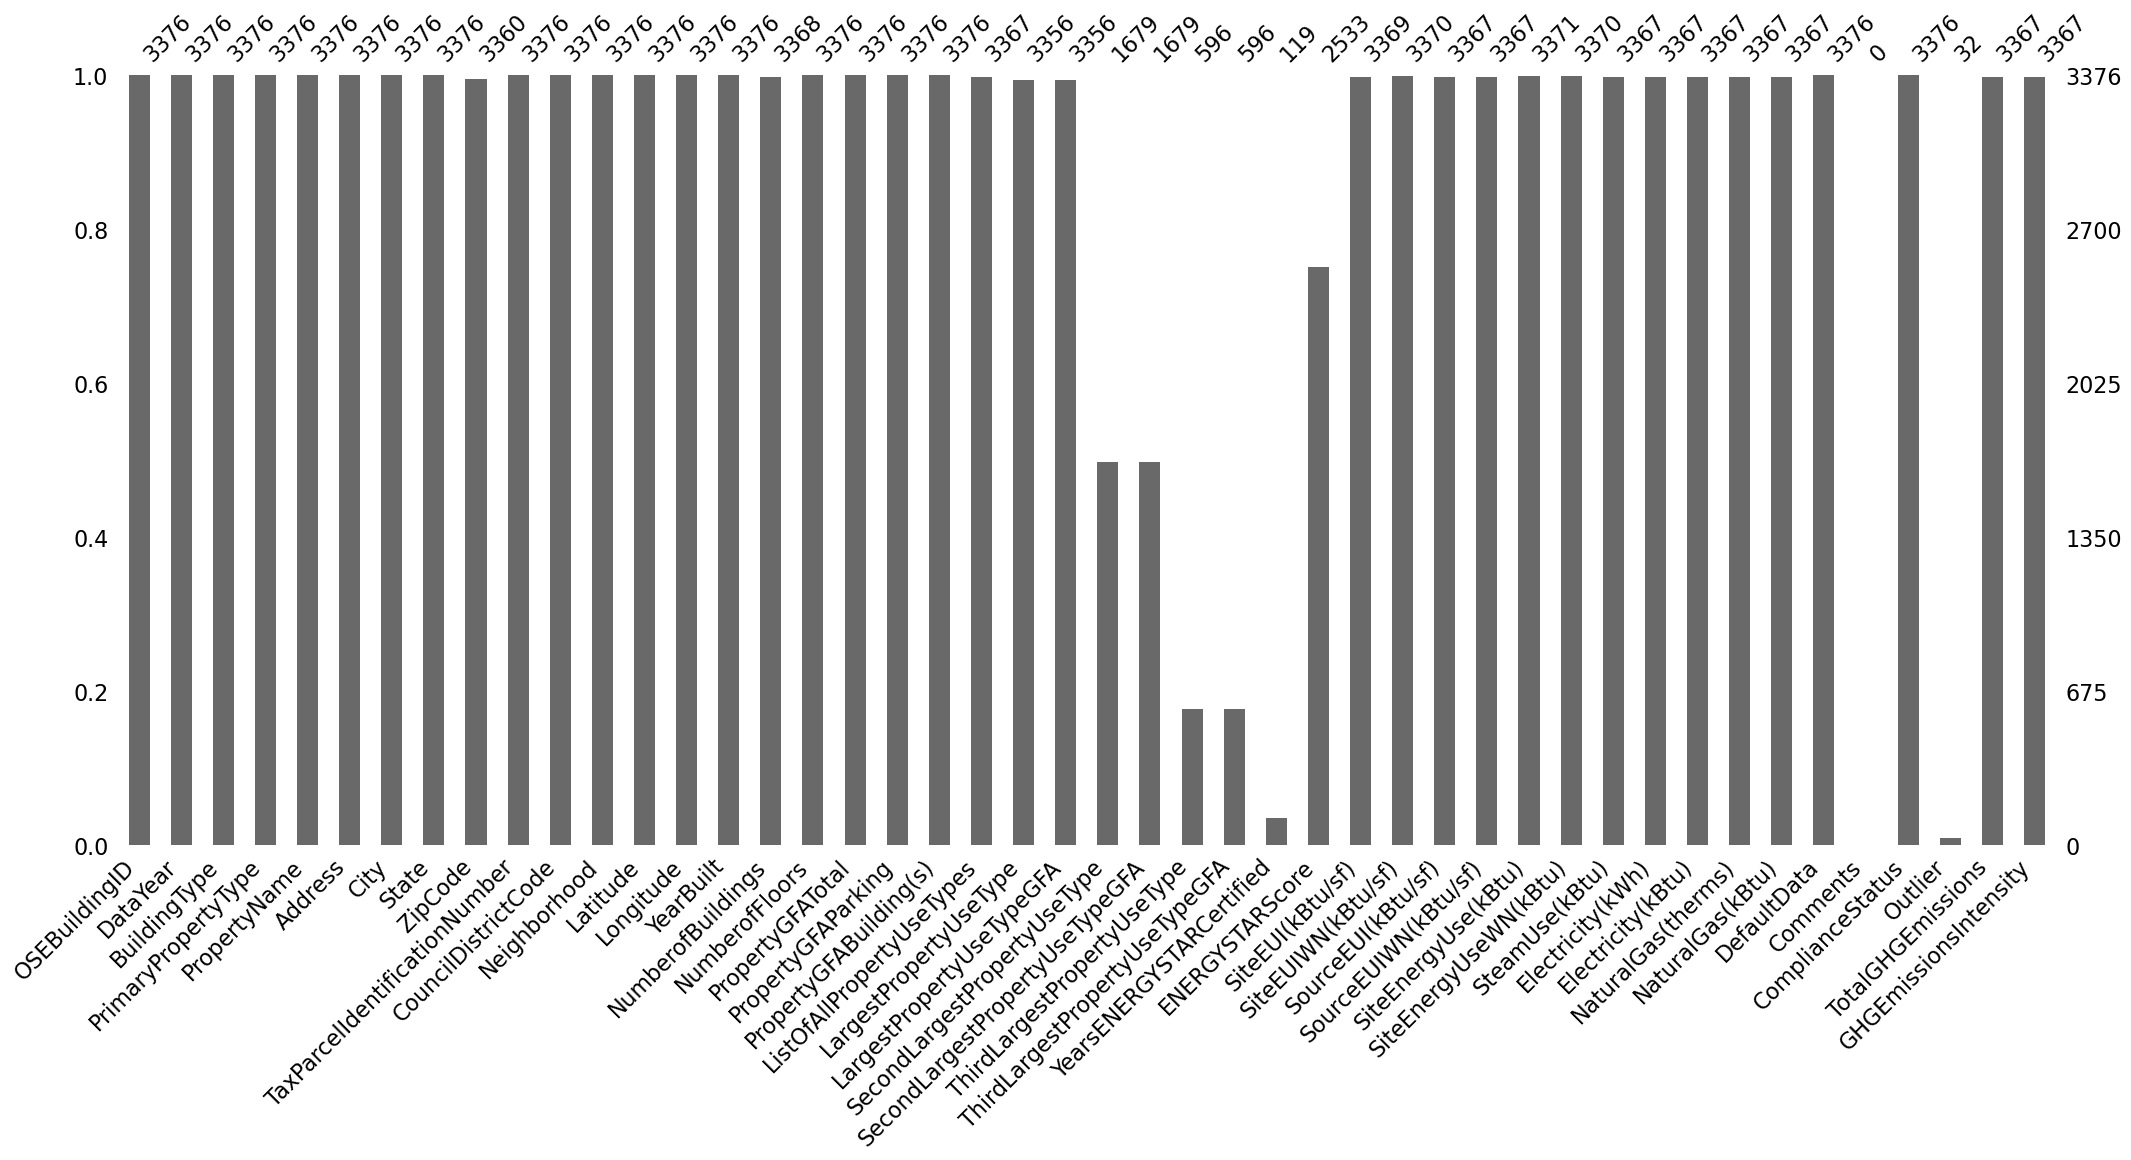

In [6]:
#Visualisation des valeurs manquantes
msno.bar(dfData)

# Sélection des bâtiments uniquement non-résidentiels

## Type de bâtiment 

In [7]:
dfData['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

**NonResidential** : Bâtiments à usage non résidentiel (ex. : bureaux, commerces, etc.).<br>
**Nonresidential COS** : Bâtiments non résidentiels spécifiquement dans la catégorie COS (peut-être lié à une organisation ou un standard local).<br>
**Multifamily MR (5-9)** : Immeubles résidentiels multifamiliaux de taille moyenne (probablement avec 5 à 9 unités de logement).<br>
**SPS-District K-12** : Écoles publiques (district scolaire) pour les niveaux K-12 (éducation de la maternelle au lycée).<br>
**Campus** : Un ensemble de bâtiments regroupés, souvent dans un contexte éducatif, professionnel ou médical.<br>
**Multifamily LR (1-4)** : Immeubles résidentiels multifamiliaux de petite taille (1 à 4 unités de logement).<br>
**Multifamily HR (10+)** : Immeubles résidentiels multifamiliaux de grande taille (10 unités de logement ou plus).<br>
**Nonresidential WA** : Bâtiments non résidentiels situés dans l'État de Washington (WA) ou relevant d'une catégorie spécifique à cette région.<br>

**Je vais enlever tous les bâtiments dont le type est résidentiels.**

In [8]:
# Liste des types de bâtiments non résidentiels à garder
types_non_residentiels = ['NonResidential', 'Nonresidential COS', 'SPS-District K-12', 
                          'Campus', 'Nonresidential WA']

# Filtrer le DataFrame pour ne conserver que les bâtiments non résidentiels
df_non_residentiels = dfData[dfData['BuildingType'].isin(types_non_residentiels)]

In [9]:
df_non_residentiels.shape

(1668, 46)

## Usage principal du batiment (+50% de la fonction)

In [10]:
df_non_residentiels['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily',
       'Office'], dtype=object)

**Hotel** : Un bâtiment destiné à l'hébergement commercial, comme un hôtel ou un motel.<br> 
**Other** : Propriétés qui ne correspondent à aucune des autres catégories définies.<br>
**Mixed Use Property** : Bâtiment avec des usages multiples, comme des espaces commerciaux et résidentiels.<br>
**K-12 School** : Établissement scolaire couvrant les niveaux K-12 (maternelle jusqu'au lycée).<br>
**University** : Bâtiment ou campus universitaire.<br>
**Small- and Mid-Sized Office** : Bureaux de petite et moyenne taille.<br>
**Warehouse** : Entrepôt, généralement utilisé pour le stockage de marchandises.<br>
 **Large Office** : Bureau de grande taille, souvent un immeuble de bureaux dans un quartier d'affaires.<br>
**Senior Care Community** : Centre de soins pour les personnes âgées, tel qu'une maison de retraite ou une résidence assistée.<br>
**Medical Office** : Bureau ou clinique médicale, utilisé pour des soins de santé ambulatoires.<br>
**Retail Store** : Magasin de détail, où les produits sont vendus directement aux consommateurs.<br>
**Hospital** : Établissement médical fournissant des soins de santé plus complexes et de longue durée.<br>
**Residence Hall** : Résidence universitaire ou dortoir destiné au logement des étudiants.<br>
**Distribution Center** : Centre de distribution, souvent utilisé pour la gestion et la livraison de produits.<br>
**Worship Facility** : Lieu de culte, comme une église, une mosquée, ou une synagogue.<br>
**Low-Rise Multifamily** : Immeuble multifamilial de faible hauteur (généralement moins de 5 étages).<br>
**Supermarket / Grocery Store** : Supermarché ou magasin d'alimentation.<br>
**Laboratory** : Laboratoire scientifique ou de recherche.<br>
**Refrigerated Warehouse** : Entrepôt réfrigéré pour le stockage de produits périssables.<br>
**Restaurant** : Établissement où l'on prépare et sert des repas aux clients.<br>
**Office** : Bureau destiné à des activités commerciales ou professionnelles.<br>

**Je vais enlever tous les batiments dont l'usage principal est résidentiel**

In [11]:
# Exclure les bâtiments où l'usage principal est résidentiel
df_non_residentiels = df_non_residentiels[~df_non_residentiels['PrimaryPropertyType'].isin(['Residence Hall', 'Senior Care Community', 'Low-Rise Multifamily'])]

In [12]:
df_non_residentiels.shape

(1624, 46)

## Plus grand usage de la propriété par GFA

In [13]:
df_non_residentiels['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'Other - Mall', 'Medical Office',
       'Retail Store', 'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Other/Specialty Hospital',
       'Financial Office', 'Distribution Center', 'Parking',
       'Multifamily Housing', 'Worship Facility', 'Restaurant',
       'Data Center', 'Laboratory', 'Supermarket/Grocery Store',
       'Convention Center', 'Urgent Care/Clinic/Other Outpatient', nan,
       'Other - Services', 'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing/Industrial Plant',
       'Other - Recreation', 'Lifestyle Center'

In [14]:
# Liste des usages résidentiels à exclure
types_residentiels = ['Multifamily Housing', 'Other - Lodging/Residential', 
                      'Residential Care Facility', 'Residence Hall/Dormitory']

# Filtrer pour exclure les usages résidentiels
df_non_residentiels = df_non_residentiels[~df_non_residentiels['LargestPropertyUseType'].isin(types_residentiels)]

In [15]:
df_non_residentiels.shape

(1608, 46)

## Second plus grand usage de la propriété

In [16]:
df_non_residentiels['SecondLargestPropertyUseType'].unique()

array([nan, 'Parking', 'Office', 'Restaurant', 'K-12 School',
       'Laboratory', 'Refrigerated Warehouse',
       'Non-Refrigerated Warehouse', 'Other - Education',
       'Vocational School', 'Retail Store',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Other - Entertainment/Public Assembly', 'Data Center',
       'Swimming Pool', 'Other', 'Courthouse', 'Residence Hall/Dormitory',
       'Distribution Center', 'Self-Storage Facility', 'Other - Services',
       'Movie Theater', 'Other - Recreation',
       'Convenience Store without Gas Station', 'Performing Arts',
       'College/University', 'Supermarket/Grocery Store',
       'Other - Restaurant/Bar', 'Adult Education', 'Medical Office',
       'Enclosed Mall', 'Multifamily Housing', 'Bar/Nightclub',
       'Financial Office',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Manufacturing/Industrial Plant', 'Other - Lodging/Residential',
       'Bank Branch', 'Fitness Center/Health Club/G

In [17]:
# Liste des usages résidentiels à exclure
types_residentiels_second = ['Multifamily Housing', 'Residence Hall/Dormitory', 
                             'Other - Lodging/Residential']

# Filtrer pour exclure les usages résidentiels dans le deuxième plus grand usage
df_non_residentiels = df_non_residentiels[~df_non_residentiels['SecondLargestPropertyUseType'].isin(types_residentiels_second)]

In [18]:
df_non_residentiels.shape

(1595, 46)

## Troisième plus grand usage de la propriété

In [19]:
df_non_residentiels['ThirdLargestPropertyUseType'].unique()

array([nan, 'Restaurant', 'Swimming Pool', 'Data Center', 'Office',
       'Retail Store', 'Other - Entertainment/Public Assembly',
       'Non-Refrigerated Warehouse', 'Other', 'Distribution Center',
       'Other - Services', 'Medical Office', 'Parking', 'Food Service',
       'Other - Utility', 'Fitness Center/Health Club/Gym',
       'Social/Meeting Hall', 'Pre-school/Daycare',
       'Convenience Store without Gas Station', 'Financial Office',
       'Other - Restaurant/Bar', 'Other - Education',
       'Multifamily Housing', 'Laboratory', 'Bank Branch',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Other - Recreation', 'Self-Storage Facility',
       'Other - Technology/Science', 'Refrigerated Warehouse',
       'Bar/Nightclub', 'Manufacturing/Industrial Plant',
       'Other/Specialty Hospital', 'Fast Food Restaurant', 'K-12 School',
       'Supermarket/Grocery Store', 'Strip Mall', 'Vocational School'],
      dtype=object)

In [20]:
# Liste des types résidentiels à exclure
types_residentiels = ['Multifamily Housing']

# Filtrer les données pour exclure les bâtiments avec des usages résidentiels dans le ThirdLargestPropertyUseType
df_non_residentiels = df_non_residentiels[~df_non_residentiels['ThirdLargestPropertyUseType'].isin(types_residentiels)]

In [21]:
df_non_residentiels.shape

(1583, 46)

## Liste des usages

In [22]:
df_non_residentiels['ListOfAllPropertyUseTypes'].unique()

array(['Hotel', 'Hotel, Parking, Restaurant',
       'Hotel, Parking, Swimming Pool', 'Police Station',
       'Other - Entertainment/Public Assembly', 'Hotel, Parking',
       'Data Center, Library, Parking',
       'Fitness Center/Health Club/Gym, Office, Swimming Pool',
       'Office, Other, Other - Lodging/Residential, Restaurant, Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership',
       'Hotel, Parking, Retail Store, Swimming Pool',
       'K-12 School, Multifamily Housing, Office, Other - Entertainment/Public Assembly',
       'Self-Storage Facility',
       'Energy/Power Station, Laboratory, Manufacturing/Industrial Plant, Non-Refrigerated Warehouse, Office',
       'Non-Refrigerated Warehouse, Office, Refrigerated Warehouse',
       'Non-Refrigerated Warehouse, Office', 'Office, Other - Education',
       'Office, Self-Storage Facility, Vocational School',
       'Data Center, Office, Retail Store',
       '

In [23]:
# Liste des mots-clés liés au résidentiel
mots_cles_residentiels = ['Residential', 'Multifamily Housing', 'Single Family Home', 'Other - Lodging/Residential']

In [24]:
# Filtrer les bâtiments non résidentiels
df_non_residentiels = df_non_residentiels[~df_non_residentiels['ListOfAllPropertyUseTypes'].str.contains(
    '|'.join(mots_cles_residentiels), na=False
)]

In [25]:
df_non_residentiels.shape

(1578, 46)

Maintenant je n'ai que des bâtiments exclusivement non-résidentiels

# Etudes des colonnes "ComplianceStatus", "DefaultData" et "Outlier"

## Etude de "ComplianceStatus"

In [26]:
df_non_residentiels['ComplianceStatus'].value_counts()

ComplianceStatus
Compliant                       1459
Error - Correct Default Data      88
Non-Compliant                     17
Missing Data                      14
Name: count, dtype: int64

Compliant : Cette catégorie contient les enregistrements qui sont considérés comme conformes, c'est-à-dire qui respectent les critères ou les règles attendues dans le dataset.<br>

Error - Correct Default Data : Cette catégorie pourrait signifier que les données sont marquées comme erronées ou incorrectes, mais qu'elles ont une valeur par défaut qui pourrait nécessiter une correction ou une mise à jour.<br>

Non-Compliant : Les enregistrements dans cette catégorie sont non conformes, c'est-à-dire qu'ils ne respectent pas les critères ou les règles attendues pour être considérés comme valides ou corrects.<br>

Missing Data : Cette catégorie regroupe les enregistrements où des données essentielles sont manquantes. Il peut s'agir de valeurs nulles ou absentes dans certaines colonnes.<br>

**Je vais supprimer les batiments dont les valeurs de ComplianceStatus sont autres que Compliant.**

In [27]:
# Suppression des lignes où ComplianceStatus n'est pas 'Compliant'
df_cleaned = df_non_residentiels[df_non_residentiels['ComplianceStatus'] == 'Compliant']

In [28]:
df_cleaned.shape

(1459, 46)

## Etude de "DefaultData"

In [29]:
df_cleaned['DefaultData'].value_counts()

DefaultData
False    1459
Name: count, dtype: int64

"DefaultData" indique si des données par défaut ont été utilisées pour au moins une caractéristique de la propriété. Ici ce n'est pas le cas car la variable est à "False" sur toutes les propriétés".

## Etude de "Outlier"

In [30]:
df_cleaned['Outlier'].value_counts()

Series([], Name: count, dtype: int64)

"Outlier" indique si une propriété est une valeur aberrante élevée ou basse (Oui/Non). Ici la colonne est vide donc nous n'avons pas d'outliers.

# Suppression des colonnes avec + 50% de valeurs manquantes

In [31]:
#Visualisation des valeurs manquantes
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1459 non-null   int64  
 1   DataYear                         1459 non-null   int64  
 2   BuildingType                     1459 non-null   object 
 3   PrimaryPropertyType              1459 non-null   object 
 4   PropertyName                     1459 non-null   object 
 5   Address                          1459 non-null   object 
 6   City                             1459 non-null   object 
 7   State                            1459 non-null   object 
 8   ZipCode                          1446 non-null   float64
 9   TaxParcelIdentificationNumber    1459 non-null   object 
 10  CouncilDistrictCode              1459 non-null   int64  
 11  Neighborhood                     1459 non-null   object 
 12  Latitude                 

In [32]:
# Calcul du pourcentage de valeurs manquantes par colonne
missing_percentage = df_cleaned.isnull().mean() * 100

# Filtrer les colonnes où le pourcentage de valeurs manquantes est inférieur ou égal à 50%
df_cleaned_filtered = df_cleaned.loc[:, missing_percentage <= 50]

# Affichage des colonnes restantes
df_cleaned_filtered.shape

(1459, 41)

<Axes: >

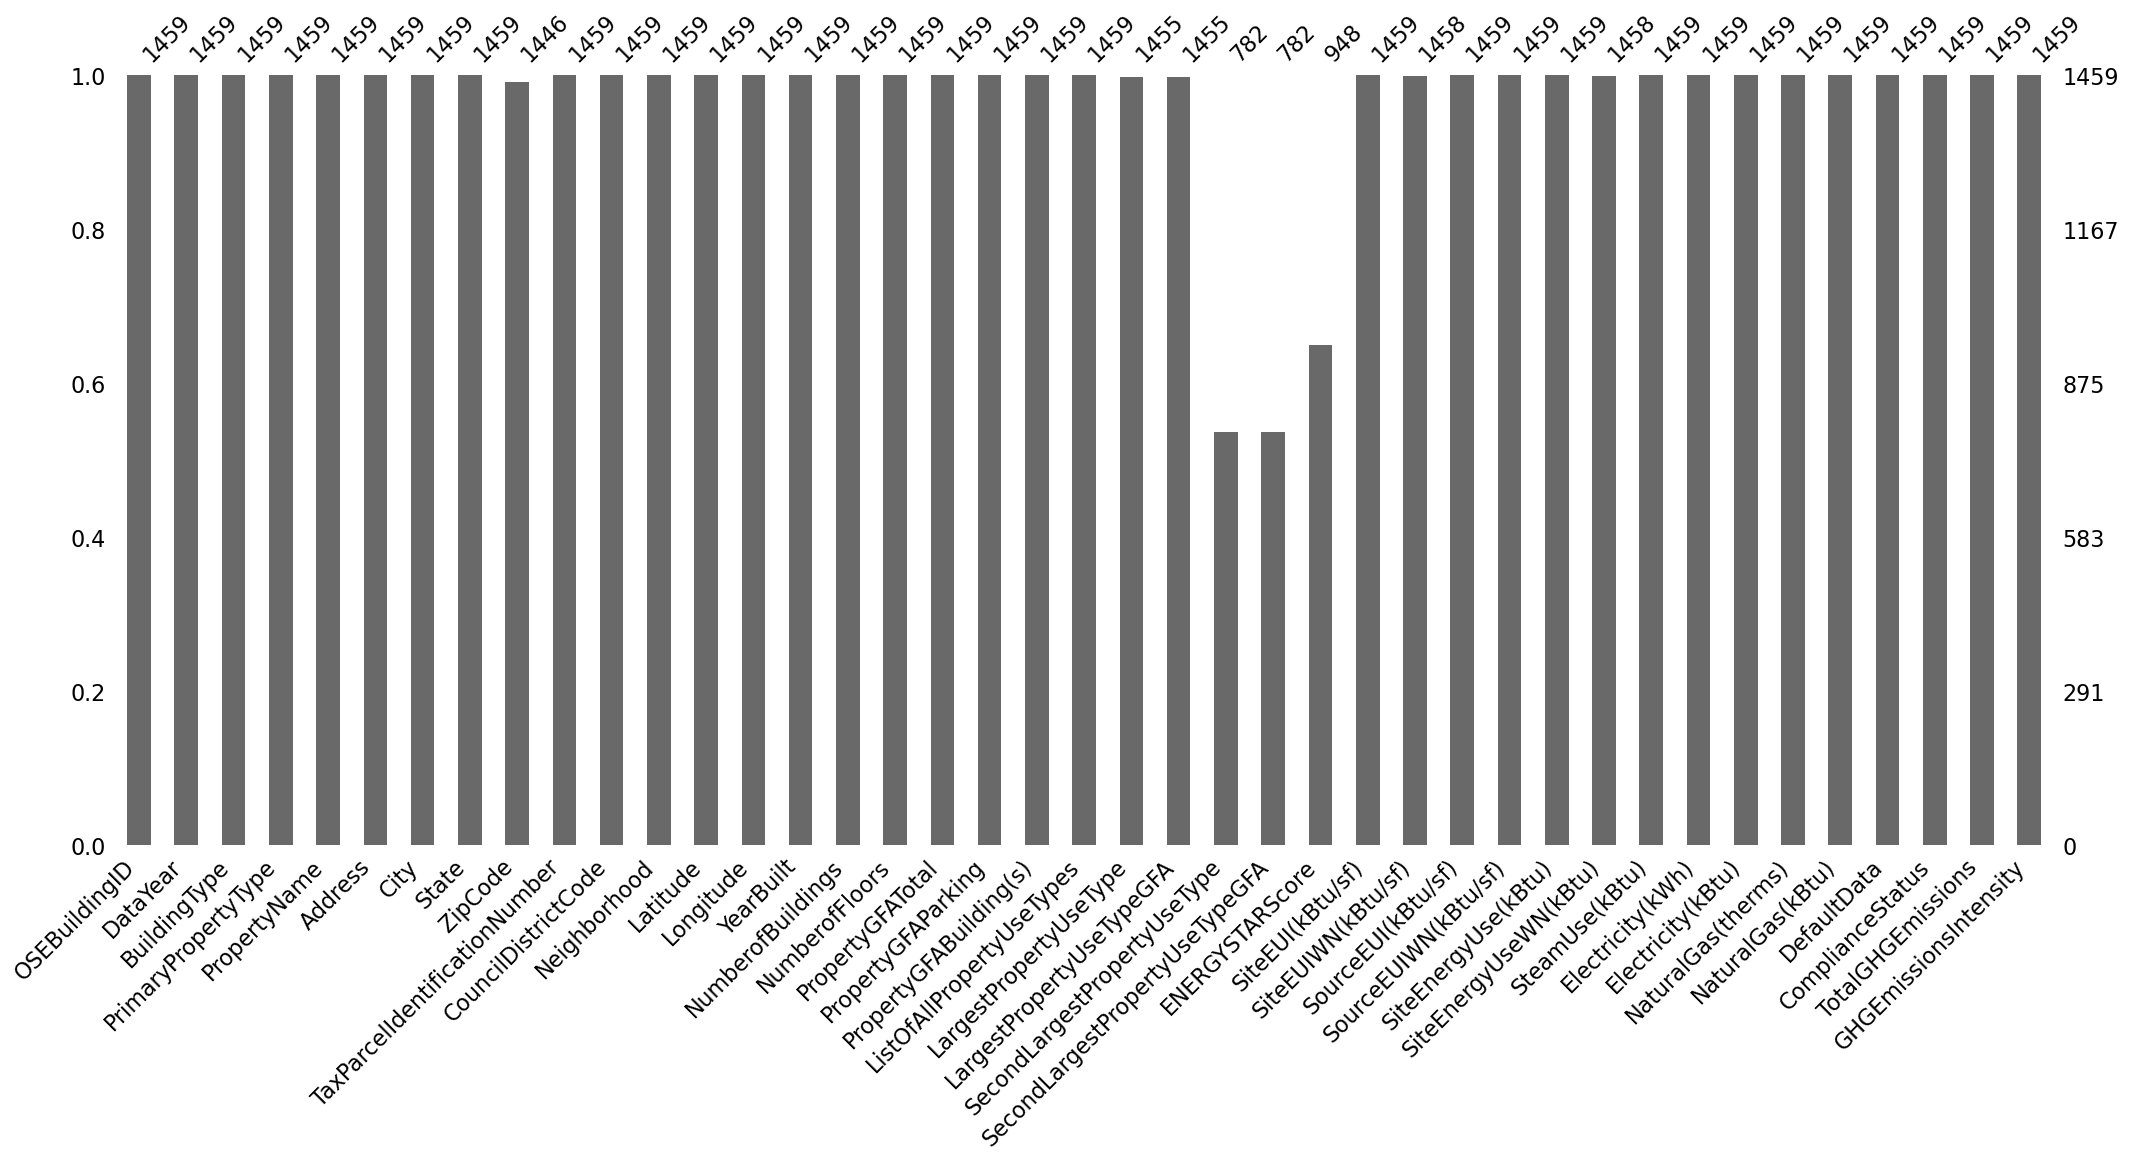

In [33]:
#Visualisation des valeurs manquantes
msno.bar(df_cleaned_filtered)

In [34]:
df_cleaned = df_cleaned_filtered.copy()

# Sélection des variables cibles

Nos variables cibles seront "TotalGHGEmissions" et "SiteEnergyUse(kBtu)".

## Variable "TotalGHGEmissions"

### Analyse de la distribution de la variable

In [35]:
df_cleaned['TotalGHGEmissions'].isnull().sum()

0

In [36]:
df_cleaned['TotalGHGEmissions'].describe()

count     1459.000000
mean       195.005716
std        800.025263
min         -0.800000
25%         20.110000
50%         49.120000
75%        142.865000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [37]:
# Sélectionner les lignes où les émissions de GHG sont négatives
bâtiments_negatifs = df_cleaned[df_cleaned['TotalGHGEmissions'] <= 0]

# Afficher le nombre de lignes
nombre_outliers_negatifs = len(bâtiments_negatifs)
print(f"Nombre de lignes où TotalGHGEmissions est inférieur ou égal à 0 : {nombre_outliers_negatifs}")

# Vérifier les autres colonnes liées à l'énergie pour ces bâtiments
bâtiments_negatifs[['OSEBuildingID', 'YearBuilt', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'ENERGYSTARScore']]

Nombre de lignes où TotalGHGEmissions est inférieur ou égal à 0 : 2


OSEBuildingID  YearBuilt  Electricity(kWh)  Electricity(kBtu)  \
513             700       2008           0.00000                0.0   
3206          49784       2013      -33826.80078          -115417.0   

      NaturalGas(therms)  NaturalGas(kBtu)  TotalGHGEmissions  ENERGYSTARScore  
513                  0.0               0.0                0.0             31.0  
3206                 0.0               0.0               -0.8            100.0

**Pour le bâtiment 700** il y a incohérence:<br>
Valeurs nulles pour la consommation d'énergie :<br>
L'Electricity(kWh) et le NaturalGas(therms) sont tous deux égaux à zéro, ce qui indique que ce bâtiment n'a consommé ni électricité ni gaz naturel, ce qui est rare, voire improbable dans un bâtiment en fonctionnement normal. Cela pourrait signifier qu'il n'y a pas de consommation d'énergie enregistrée ou une erreur dans la saisie des données.<br>

Total des émissions de GES égales à zéro :<br>
Le TotalGHGEmissions est également égal à zéro, ce qui correspond logiquement à une absence de consommation d'énergie (électricité et gaz), mais cela semble peu plausible pour un bâtiment en fonctionnement réel, même si la consommation d'énergie est très faible ou nulle (par exemple, un bâtiment très écoénergétique ou ayant des systèmes solaires pour la production d'énergie).<br>

ENERGYSTARScore relativement bas :<br>
Un score ENERGYSTAR de 31 pour un bâtiment avec zéro émission de GES peut également sembler contradictoire. En général, un bâtiment qui consomme peu ou pas d'énergie aurait un score élevé, mais dans ce cas, le score est assez bas, ce qui pourrait être dû à d'autres facteurs, comme des performances en dehors des domaines liés à la consommation d'énergie, comme l'efficacité des équipements ou des pratiques inefficaces malgré une faible consommation d'énergie.

Conclusion :<br>
**Il faut supprimer l'enregistrement 700**<br>


**Bâtiment 49784**<br>
Année de construction : 2013<br>
ENERGY STAR Score : 100/100<br>
Consommation d'électricité : Négative<br>
Émissions de CO₂ : Négatives
<br>
Conclusion<br>
Ces caractéristiques ne sont PAS aberrantes mais cohérentes :<br>

Bâtiment récent (2013)<br>
Performance énergétique maximale (score ENERGY STAR 100)<br>
Probablement équipé de technologies vertes<br>
Potentiellement producteur net d'énergie<br>
Interprétation<br>
Les valeurs négatives sont probablement dues à une production d'énergie renouvelable supérieure à la consommation, ce qui en fait un exemple optimal d'efficacité énergétique et de durabilité.<br>

Justification de la suppression<br>
Cependant, cette observation doit être supprimée car le modèle ne dispose pas de variables expliquant explicitement cette production d'énergie (par exemple, présence de panneaux solaires ou d’équipements de cogénération).
Conserver cette donnée pourrait introduire un biais ou une distorsion dans le modèle, en influençant les prédictions sans que les facteurs explicatifs soient pris en compte. Pour garantir la cohérence et la robustesse du modèle, cette observation a donc été retirée de l'analyse.

In [38]:
# Suppression de l'enregistrement où OSEBuildingID est égal à 700
df_cleaned = df_cleaned[df_cleaned['OSEBuildingID'] != 700]
# Suppression de l'enregistrement où OSEBuildingID est égal à 49784
df_cleaned = df_cleaned[df_cleaned['OSEBuildingID'] != 49784]

### Calcul de l'IQR

In [39]:
# Calcul des quartiles
Q1 = df_cleaned['TotalGHGEmissions'].quantile(0.25)
Q3 = df_cleaned['TotalGHGEmissions'].quantile(0.75)

# Calcul de l'IQR
IQR = Q3 - Q1

# Calcul des limites inférieure et supérieure
IQR_inf = Q1 - 1.5 * IQR
IQR_sup = Q3 + 1.5 * IQR

# Affichage des résultats
print(f"IQR inf : {IQR_inf}")
print(f"IQR sup : {IQR_sup}")

IQR inf : -164.56
IQR sup : 328.08000000000004


In [40]:
# Filtrer les bâtiments dont les valeurs de TotalGHGEmissions sont supérieures à l'IQR supérieur
outliers = df_cleaned[df_cleaned['TotalGHGEmissions'] > IQR_sup]

# Afficher le nombre de bâtiments
nombre_outliers = outliers.shape[0]
print(f"Nombre de bâtiments avec TotalGHGEmissions > IQR sup : {nombre_outliers}")

Nombre de bâtiments avec TotalGHGEmissions > IQR sup : 162


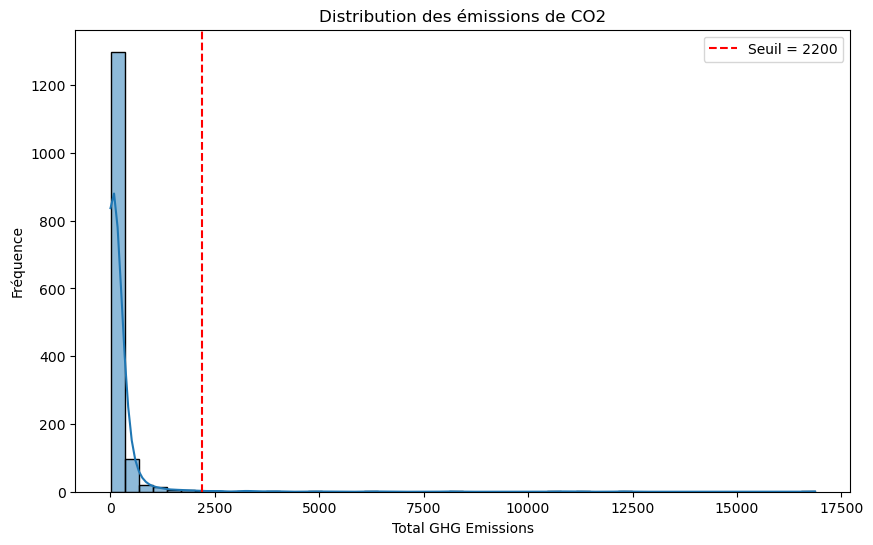

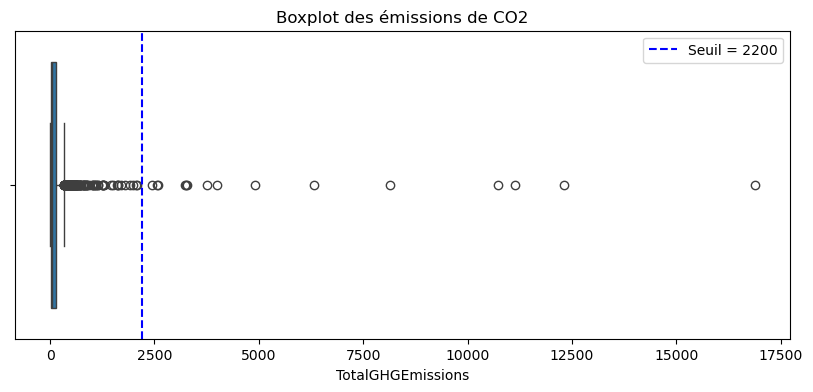

In [41]:
# Histogramme avec seuil
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['TotalGHGEmissions'], bins=50, kde=True)
plt.axvline(2200, color='red', linestyle='--', label='Seuil = 2200')
plt.title('Distribution des émissions de CO2')
plt.xlabel('Total GHG Emissions')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

# Boxplot avec annotations
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_cleaned['TotalGHGEmissions'])
plt.axvline(2200, color='blue', linestyle='--', label='Seuil = 2200')
plt.title('Boxplot des émissions de CO2')
plt.legend()
plt.show()

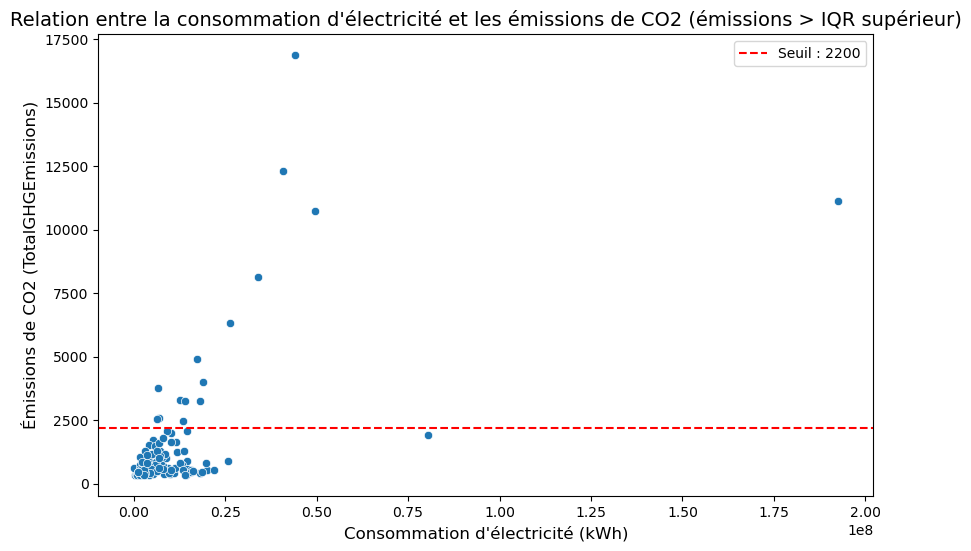

In [42]:
# Filtrer les données pour ne garder que les émissions > IQR supérieur
df_filtered = df_cleaned[df_cleaned['TotalGHGEmissions'] > IQR_sup]

# Création du graphique de dispersion avec les données filtrées
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='Electricity(kWh)', y='TotalGHGEmissions')

# Ajout d'une ligne horizontale pour indiquer le seuil de 2200
plt.axhline(y=2200, color='red', linestyle='--', label='Seuil : 2200')

# Ajout des titres et labels
plt.title('Relation entre la consommation d\'électricité et les émissions de CO2 (émissions > IQR supérieur)', fontsize=14)
plt.xlabel('Consommation d\'électricité (kWh)', fontsize=12)
plt.ylabel('Émissions de CO2 (TotalGHGEmissions)', fontsize=12)

# Ajout de la légende
plt.legend()

# Affichage du graphique
plt.show()

### Étude des bâtiments aux émissions de CO₂ supérieures à 2200

L'analyse des émissions de CO₂ des bâtiments révèle que certaines valeurs extrêmes, identifiées par un seuil de 2200, se démarquent nettement du reste des données. Ces bâtiments représentent une catégorie particulière, avec des émissions significativement plus élevées que la majorité des autres bâtiments. Cette séparation visible dans les graphiques, notamment le boxplot, suggère qu'ils pourraient appartenir à un sous-groupe distinct.

In [43]:
# Filtrer les bâtiments avec des émissions de CO2 > 2200
bâtiments_émissions_supérieures_2200 = df_cleaned[df_cleaned['TotalGHGEmissions'] > 2200]

# Compter le nombre de bâtiments
nombre_bâtiments_émissions_supérieures_2200 = bâtiments_émissions_supérieures_2200.shape[0]
print(f"Nombre de bâtiments avec des émissions de CO2 > 2200 : {nombre_bâtiments_émissions_supérieures_2200}")

Nombre de bâtiments avec des émissions de CO2 > 2200 : 15


In [44]:
# Filtrer les données pour ne garder que les émissions > IQR supérieur
df_filtered = df_cleaned[df_cleaned['TotalGHGEmissions'] > 2200]

# Sélectionner les colonnes pertinentes à afficher dans le tableau
tableau = df_filtered[['OSEBuildingID', 'PrimaryPropertyType', 'LargestPropertyUseType', 'YearBuilt', 'PropertyGFABuilding(s)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'ENERGYSTARScore']]

# Trier le tableau par les émissions de CO2 de manière décroissante
tableau_sorted = tableau.sort_values(by='TotalGHGEmissions', ascending=False)

# Afficher le tableau
tableau_sorted.head(20)

OSEBuildingID PrimaryPropertyType  \
35               43  Mixed Use Property   
618             828            Hospital   
3274          49967          University   
170             276            Hospital   
124             198            Hospital   
3264          49940            Hospital   
167             268            Hospital   
340             477               Other   
2325          25251          University   
1672          23071            Hospital   
1494          22062          University   
1690          23113      Medical Office   
262             389               Hotel   
3156          45927          Laboratory   
49               63               Hotel   

                     LargestPropertyUseType  YearBuilt  \
35                                   Office       1992   
618   Hospital (General Medical & Surgical)       1994   
3274                     College/University       1900   
170   Hospital (General Medical & Surgical)       2000   
124   Hospital (General Medical & Surgical)       1953   
3264  Hospital (General Medical & Surgical)       1920   
167   Hospital (General Medical & Surgical)       1990   
340                                   Other       1997   
2325                     College/University       1945   
1672  Hospital (General Medical & Surgical)       1966   
1494                     College/University       1939   
1690                         Medical Office       1964   
262                                   Hotel       1923   
3156                             Laboratory       2000   
49                                    Hotel       1982   

      PropertyGFABuilding(s)  Electricity(kBtu)  NaturalGas(kBtu)  \
35                    494835        150476283.0       297909000.0   
618                  1765970        139354828.0        17316120.0   
3274                 9320156        657074389.0               0.0   
170                  1158691        168683602.0         1832129.0   
124                   879000        115641210.0       138191238.0   
3264                  374466         90060497.0               0.0   
167                   597519         58754927.0        84668094.0   
340                   535947         64627449.0        66746425.0   
2325                  537000         22619097.0        67990538.0   
1672                  415632         42864158.0        56096612.0   
1494                 2200000         61672821.0        52975694.0   
1690                  591981         48002292.0        54671394.0   
262                   542305         24078107.0         3968211.0   
3156                  178000         22135959.0               0.0   
49                    847518         45545529.0        23324992.0   

      TotalGHGEmissions  ENERGYSTARScore  
35             16870.98              8.0  
618            12307.16             54.0  
3274           11140.56              NaN  
170            10734.57             29.0  
124             8145.52             10.0  
3264            6330.91             74.0  
167             4906.33             34.0  
340             3995.45              NaN  
2325            3768.66              NaN  
1672            3278.11             85.0  
1494            3243.48              NaN  
1690            3238.24             60.0  
262             2573.75             45.0  
3156            2549.47              NaN  
49              2451.58             63.0

**Bâtiment 35 (Mixed Use Property**) :<br>
Émissions extrêmement élevées (16870.98) par rapport aux autres.<br>
Consommation de gaz naturel très élevée (297909000 kBtu) comparée à l'électricité.<br>
Score ENERGY STAR bas (8), cohérent avec les émissions élevées.<br>
**Potentiellement incohérent : La consommation de gaz semble anormalement élevée pour un immeuble de bureaux, les émissions sont incohérentes avec la consommation d'énergie typique pour un bâtiment mixte.**<br>

**Bâtiment 618 (Hospital)** :
Émissions : 12,307.16 tonnes de CO2.
Consommation : Électricité (139,354,828 kBtu) et gaz naturel (17,316,120 kBtu).
Score ENERGY STAR : 54.
Bien que les émissions soient élevées, le score indique une performance raisonnable. **Pas d'incohérence majeure ici**, mais les émissions sont significatives.

**Bâtiment 3274 (University)** :<br>
Troisième plus gros émetteur (11140.56) mais aucune consommation de gaz naturel.<br>
Consommation électrique exceptionnellement élevée (657074389 kBtu) de loin la plus élevée du groupe.<br>
La deuxième plus forte consommation (bâtiment 170, hôpital) est de 168,683,602 kBtu, soit environ 4 fois moins. Le fait qu'il n'y ait pas de consommation de gaz naturel suggère que toute l'énergie provient de l'électricité, qui a généralement une empreinte carbone plus faible que le gaz.<br>
Surface de 9,320,156 m², largement supérieure aux autres bâtiments listés.<br>
Émissions vs consommation :<br>
Émissions de 11,140.56, troisièmes plus élevées du groupe.<br>
Ratio émissions/consommation électrique nettement plus bas que les autres bâtiments. Cette taille justifie une consommation électrique plus élevée.<br>
Bien que les émissions semblent basses par rapport à la consommation électrique, **elles sont probablement cohérentes** compte tenu de la taille du bâtiment et de l'absence de gaz naturel.

**Bâtiment 170 (Hospital)** :<br>
Les émissions de 10,734.57 tonnes de CO2 sont cohérentes avec la très grande taille du bâtiment (1,158,691 m²) et sa fonction d'hôpital qui nécessite un fonctionnement 24/7.<br>
Consommation électrique dominante :<br>
La consommation électrique élevée de 168,683,602 kBtu explique la majorité des émissions.<br>
Score ENERGY STAR cohérent :<br>
Le score ENERGY STAR de 29 est en accord avec les émissions élevées et la forte consommation énergétique.<br>
Année de construction/rénovation :<br>
L'année 2000 suggère un bâtiment relativement moderne, ce qui est cohérent avec une forte dépendance à l'électricité plutôt qu'au gaz.<br>
Les émissions élevées s'expliquent par la grande taille de l'hôpital et sa forte consommation électrique. **Ce profil énergétique est plausible pour un grand hôpital moderne fonctionnant principalement à l'électricité.**<br>

**Bâtiment 124 (Hospital)** :
Émissions : 8,145.52 tonnes de CO2.
Consommation : Électricité (115,641,210 kBtu) et gaz naturel (138,191,238 kBtu).
Score ENERGY STAR : 10.
**Les émissions de CO2 du bâtiment 124 (8,145.52 tonnes) sont cohérentes avec sa consommation d'énergie et sa taille.**

**Bâtiment 3264 (Hospital)** :<br>
Émissions significatives sans gaz naturel :<br>
Les émissions de 6330.91 tonnes de CO2 proviennent uniquement de la consommation électrique (90,060,497 kBtu).<br>
L'absence de gaz naturel suggère que l'hôpital fonctionne entièrement à l'électricité, ce qui est inhabituel mais pas nécessairement incohérent.<br>
Score ENERGY STAR élevé :<br>
Le score de 74 indique une performance énergétique supérieure à la moyenne pour ce type de bâtiment.<br>
Ce score élevé peut s'expliquer par une utilisation efficace de l'électricité, malgré des émissions importantes.<br>
Avec 374 466 GFA, c'est un hôpital de taille moyenne comparé aux autres dans les données.<br>
Efficacité énergétique :<br>
La consommation électrique de 70.51 kWh/m² (90,060,497 kBtu / 374,466 GFA) est relativement efficace pour un hôpital.
Cette efficacité justifie le score ENERGY STAR élevé, malgré des émissions importantes dues à la dépendance totale à l'électricité.<br>
En conclusion, bien que la combinaison d'émissions élevées et d'un bon score ENERGY STAR puisse sembler contradictoire, elle s'explique par l'efficacité énergétique du bâtiment malgré sa dépendance totale à l'électricité. **Cette situation n'est pas incohérente**, mais plutôt représentative d'un hôpital moderne optimisé énergétiquement, fonctionnant exclusivement à l'électricité.<br>

**Bâtiment 167 (Hospital)** :<br>
Émissions : 4,906.33 tonnes de CO2.<br>
Consommation : Électricité (58,754,927 kBtu) et gaz naturel (84,668,094 kBtu).<br>
Score ENERGY STAR : 34.<br>
**Les émissions semblent raisonnables par rapport à la taille et à l'utilisation du bâtiment.**<br>

**Bâtiment 340 (Other)** :<br>
Émissions : 6,674.25 tonnes de CO2.<br>
Consommation : Électricité (64,627,449 kBtu) et gaz naturel (66,746,425 kBtu).<br>
Score ENERGY STAR : Non disponible.<br>
**Les émissions sont élevées mais pas incohérentes compte tenu de la consommation d'énergie**.<br>

**Bâtiment 2325 (University)** :<br>
Émissions : 3,768.66 tonnes de CO2.<br>
Consommation : Électricité (22,619,097 kBtu) et gaz naturel (67,990,538 kBtu).<br>
Score ENERGY STAR : Non disponible.<br>
**Les émissions semblent raisonnables par rapport à la consommation d'énergie**.<br>

**Bâtiment 1672 (Hospital)** :<br>
Les émissions de 3,278.11 tonnes de CO2 sont considérées comme modérées pour un hôpital, surtout en comparaison avec d'autres établissements de santé. Ce bâtiment présente un score ENERGY STAR de 85, ce qui indique une performance énergétique supérieure à la moyenne pour ce type de bâtiment.<br>
Bien que le score ENERGY STAR soit élevé, il peut sembler contradictoire par rapport aux émissions. Cependant, cela peut s'expliquer par une gestion efficace de l'énergie, même si les émissions restent significatives. Les hôpitaux sont généralement de gros consommateurs d'énergie en raison de leur fonctionnement continu et des équipements spécialisés nécessaires aux soins.<br>
Avec une superficie de 415 632 GFA, ce bâtiment est de taille moyenne par rapport aux autres hôpitaux dans les données fournies.<br> La consommation totale d'énergie est composée de 42 864 158 kBtu d'électricité et de 56 096 612 kBtu de gaz naturel. Cette combinaison d'énergies peut contribuer à des émissions modérées tout en permettant une efficacité énergétique acceptable.<br>
Les émissions de 3 278 tonnes peuvent être considérées comme raisonnables pour un hôpital de cette taille et fonction. Le score ENERGY STAR élevé indique que le bâtiment utilise son énergie de manière plus efficace que beaucoup d'autres établissements similaires. L'absence d'une consommation excessive de gaz naturel pourrait également contribuer à une empreinte carbone plus faible.<br>
En conclusion, bien que les émissions soient modérées et le score ENERGY STAR élevé, **cette situation n'est pas incohérente**. Elle reflète une gestion énergétique efficace dans un contexte hospitalier où les besoins énergétiques sont élevés. Le bâtiment 1672 représente un exemple d'un hôpital qui parvient à maintenir des émissions relativement basses tout en offrant des services essentiels grâce à une utilisation optimisée de l'énergie.

**Bâtiment 1494 (University)** :<br>
Émissions : 3,243.48 tonnes de CO2.<br>
Consommation : Électricité (61,672,821 kBtu) et gaz naturel (52,975,694 kBtu).<br>
Score ENERGY STAR : Non disponible.<br>
Analyse : Les émissions sont modérées par rapport à la taille du bâtiment et à sa consommation d'énergie. **Les émissions du bâtiment 1494 semblent cohérentes par rapport à sa taille et à sa consommation d'énergie.** <br>

**Bâtiment 1690 (Medical Office)** :<br>
Émissions : 3,238.24 tonnes de CO2.<br>
Consommation : Électricité (48,002,292 kBtu) et gaz naturel (54,671,394 kBtu).<br>
Score ENERGY STAR : 60.<br>
Analyse : **Les émissions semblent raisonnables par rapport à la taille et à l'utilisation du bâtiment**.<br>

**Bâtiment 262 (Hotel)** :<br>
Émissions : 2,573.75 tonnes de CO2.<br>
Consommation : Électricité (24,078,107 kBtu) et gaz naturel (3,968,211 kBtu).<br>
Score ENERGY STAR : 45.
**Les émissions de CO2 du bâtiment 262 semblent cohérentes avec sa consommation d'énergie**.<br>

**Bâtiment 3156 (Laboratory)** :<br>
Émissions : 2,549.47 tonnes de CO2 sans consommation de gaz naturel.<br>
Score ENERGY STAR: Non disponible.<br>
**Les niveaux d'émissions semblent appropriés pour un laboratoire de cette taille et avec cette consommation d'énergie.**

**Bâtiment 49 (Hotel)** :<br>
Émissions : 2,451.58 tonnes de CO2.<br>
Électricité : 45,545,529 kBtu.<br>
Gaz naturel : 23,324,992 kBtu.<br>
Score ENERGY STAR : 63.<br>
Taille (GFA) : 847 518.<br>
Les émissions de CO2 du bâtiment 49 (2,451.58 tonnes) semblent cohérentes avec sa consommation d'énergie et sa taille.<br>

**Conclusion** <br>
Un bâtiment montre des mesures incohérentes, Bâtiment 35.

**Conclusion sur l'Étude des Bâtiments aux Émissions de CO₂ Supérieures à 2200 Tonnes**<br>
L'analyse des bâtiments ayant des émissions de CO₂ supérieures à 2200 tonnes a permis d'identifier un sous-groupe distinct avec des niveaux d'émissions significativement plus élevés que la majorité des autres bâtiments. En utilisant un seuil de 2200 tonnes, nous avons constaté que la plupart des bâtiments dans cette catégorie présentent des émissions cohérentes avec leurs caractéristiques et leur consommation d'énergie.<br>
Bien que l'IQR supérieur ait été mesuré à 327, les émissions au-dessus de 2200 tonnes ne montrent pas d'anomalies significatives. Par conséquent, il est raisonnable de conclure cette analyse à ce stade, car la majorité des bâtiments identifiés semblent conformes aux attentes en matière d'efficacité énergétique et d'utilisation des ressources.
Cette approche ciblée permet de se concentrer sur les cas les plus pertinents sans surcharger l'analyse avec des données qui ne présentent pas d'incohérences notables. Des études futures pourraient explorer plus en détail les bâtiments présentant des niveaux d'émissions extrêmes ou incohérents, mais pour l'instant, l'analyse actuelle fournit une vue d'ensemble satisfaisante de ce sous-groupe.

In [45]:
df_cleaned.shape

(1457, 41)

In [46]:
# Supprimer les bâtiments avec les OSEBuildingID spécifiés dans df_cleaned
df_cleaned = df_cleaned[~df_cleaned['OSEBuildingID'].isin([43])]

# Afficher un aperçu des données mises à jour
df_cleaned.shape

(1456, 41)

## Variable "SiteEnergyUse(kBtu)"

### Analyse de la distribution de la variable

In [47]:
df_cleaned['SiteEnergyUse(kBtu)'].isnull().sum()

0

In [48]:
df_cleaned['SiteEnergyUse(kBtu)'].describe()

count    1.456000e+03
mean     8.694126e+06
std      3.007446e+07
min      5.713320e+04
25%      1.227132e+06
50%      2.665809e+06
75%      7.260363e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

### Calcul de l'IQR

In [49]:
# Calcul des quartiles
Q1 = df_cleaned['SiteEnergyUse(kBtu)'].quantile(0.25)
Q3 = df_cleaned['SiteEnergyUse(kBtu)'].quantile(0.75)

# Calcul de l'IQR
IQR = Q3 - Q1

# Calcul des limites inférieure et supérieure
IQR_inf = Q1 - 1.5 * IQR
IQR_sup = Q3 + 1.5 * IQR

# Affichage des résultats
print(f"IQR inf : {IQR_inf}")
print(f"IQR sup : {IQR_sup}")

IQR inf : -7822715.84375
IQR sup : 16310210.90625


In [50]:
# Filtrer les bâtiments dont les valeurs de SiteEnergyUse(kBtu) sont supérieures à l'IQR supérieur
outliers = df_cleaned[df_cleaned['SiteEnergyUse(kBtu)'] > IQR_sup]

# Afficher le nombre de bâtiments
nombre_outliers = outliers.shape[0]
print(f"Nombre de bâtiments avec SiteEnergyUse(kBtu) > IQR sup : {nombre_outliers}")

Nombre de bâtiments avec SiteEnergyUse(kBtu) > IQR sup : 166


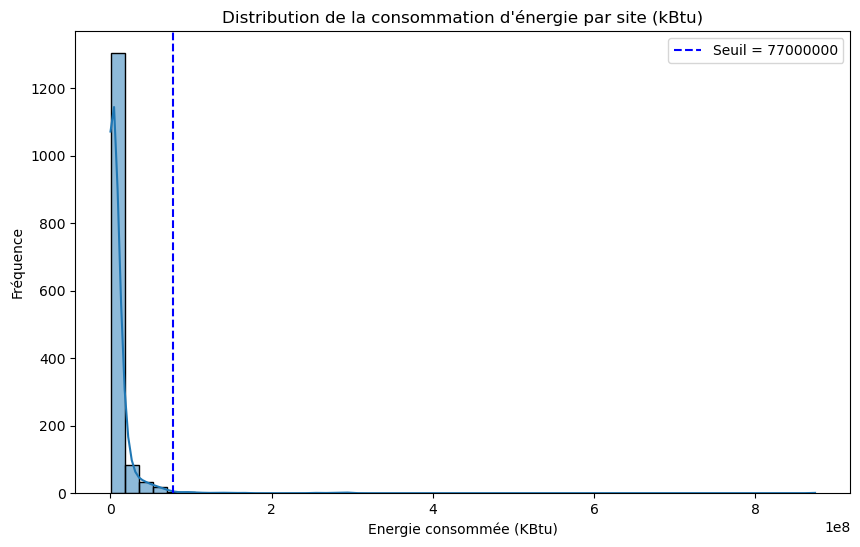

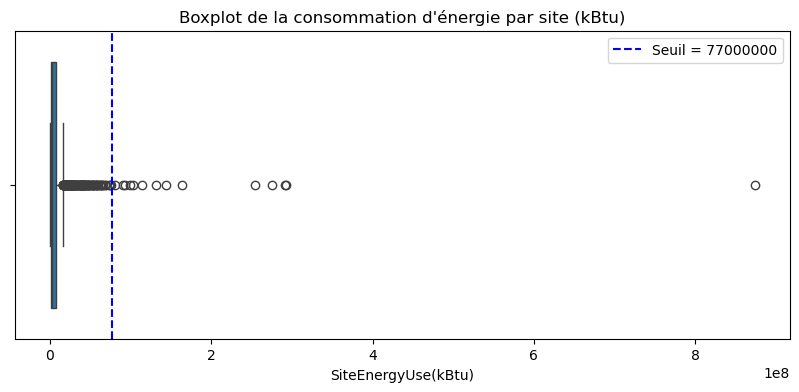

In [51]:
# Histogramme avec seuil
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['SiteEnergyUse(kBtu)'], bins=50, kde=True)
plt.axvline(77000000, color='blue', linestyle='--', label='Seuil = 77000000')
plt.title("Distribution de la consommation d'énergie par site (kBtu)")
plt.xlabel('Energie consommée (KBtu)')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

# Boxplot avec annotations
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_cleaned['SiteEnergyUse(kBtu)'])
plt.axvline(77000000, color='blue', linestyle='--', label='Seuil = 77000000')
plt.title("Boxplot de la consommation d'énergie par site (kBtu)")
plt.legend()
plt.show()

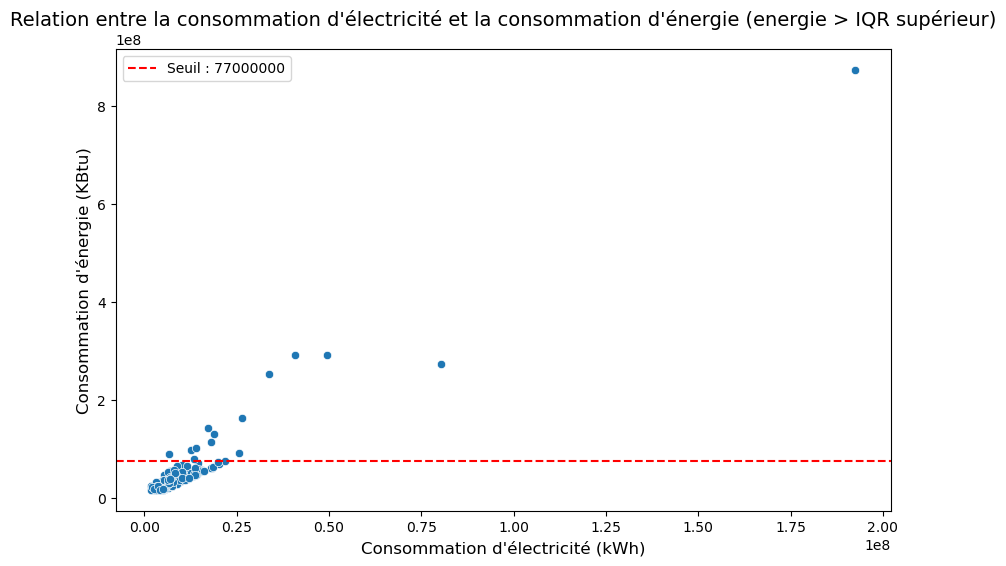

In [52]:
# Filtrer les données pour ne garder que les émissions > IQR supérieur
df_filtered = df_cleaned[df_cleaned['SiteEnergyUse(kBtu)'] > IQR_sup]

# Création du graphique de dispersion avec les données filtrées
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='Electricity(kWh)', y='SiteEnergyUse(kBtu)')
# Ajout d'une ligne horizontale pour indiquer le seuil de 2200
plt.axhline(y=77000000, color='red', linestyle='--', label='Seuil : 77000000')

# Ajout des titres et labels
plt.title('Relation entre la consommation d\'électricité et la consommation d\'énergie (energie > IQR supérieur)', fontsize=14)
plt.xlabel('Consommation d\'électricité (kWh)', fontsize=12)
plt.ylabel('Consommation d\'énergie (KBtu)', fontsize=12)
plt.legend()

# Affichage du graphique
plt.show()

### Étude des bâtiments ayant une consommation d'énergie supérieure à 77 000 000 kBtu

L'analyse de la consommation d'énergie des bâtiments révèle que certaines valeurs extrêmes, identifiées par un seuil de 77 000 000 kBtu, se distinguent nettement des autres. Ces bâtiments présentent des niveaux de consommation énergétique beaucoup plus élevés que la majorité des autres bâtiments. Cette séparation visible dans les graphiques, notamment le boxplot, suggère qu'ils pourraient constituer un sous-groupe particulier, nécessitant peut-être une attention spécifique en raison de leur forte dépendance à l'énergie.

In [53]:
# Filtrer les bâtiments avec des émissions de CO2 > 2200
bâtiments_conso_supérieures = df_cleaned[df_cleaned['SiteEnergyUse(kBtu)'] > 77000000]

# Compter le nombre de bâtiments
nombre_bâtiments_conso_supérieures = bâtiments_conso_supérieures.shape[0]
print(f"Nombre de bâtiments avec des consommations d\'énergie' > 77000000 : {nombre_bâtiments_conso_supérieures}")

Nombre de bâtiments avec des consommations d'énergie' > 77000000 : 14


In [54]:
# Filtrer les données pour ne garder que les émissions > IQR supérieur
df_filtered = df_cleaned[df_cleaned['SiteEnergyUse(kBtu)'] > 77000000]

# Sélectionner les colonnes pertinentes à afficher dans le tableau
tableau = df_filtered[['OSEBuildingID', 'PrimaryPropertyType', 'LargestPropertyUseType', 'YearBuilt', 'PropertyGFABuilding(s)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SiteEnergyUse(kBtu)', 'ENERGYSTARScore']]

# Trier le tableau par les émissions de CO2 de manière décroissante
tableau_sorted = tableau.sort_values(by='SiteEnergyUse(kBtu)', ascending=False)

# Afficher le tableau
tableau_sorted.head(20)

OSEBuildingID PrimaryPropertyType  \
3274          49967          University   
170             276            Hospital   
618             828            Hospital   
558             753               Other   
124             198            Hospital   
3264          49940            Hospital   
167             268            Hospital   
340             477               Other   
1494          22062          University   
1690          23113      Medical Office   
1672          23071            Hospital   
559             775        Large Office   
2325          25251          University   
49               63               Hotel   

                     LargestPropertyUseType  YearBuilt  \
3274                     College/University       1900   
170   Hospital (General Medical & Surgical)       2000   
618   Hospital (General Medical & Surgical)       1994   
558                             Data Center       1981   
124   Hospital (General Medical & Surgical)       1953   
3264  Hospital (General Medical & Surgical)       1920   
167   Hospital (General Medical & Surgical)       1990   
340                                   Other       1997   
1494                     College/University       1939   
1690                         Medical Office       1964   
1672  Hospital (General Medical & Surgical)       1966   
559                                  Office       1985   
2325                     College/University       1945   
49                                    Hotel       1982   

      PropertyGFABuilding(s)  Electricity(kBtu)  NaturalGas(kBtu)  \
3274                 9320156        657074389.0               0.0   
170                  1158691        168683602.0         1832129.0   
618                  1765970        139354828.0        17316120.0   
558                   429405        274532495.0          149672.0   
124                   879000        115641210.0       138191238.0   
3264                  374466         90060497.0               0.0   
167                   597519         58754927.0        84668094.0   
340                   535947         64627449.0        66746425.0   
1494                 2200000         61672821.0        52975694.0   
1690                  591981         48002292.0        54671394.0   
1672                  415632         42864158.0        56096612.0   
559                  1632820         87851862.0         5085763.0   
2325                  537000         22619097.0        67990538.0   
49                    847518         45545529.0        23324992.0   

      SiteEnergyUse(kBtu)  ENERGYSTARScore  
3274          873923712.0              NaN  
170           293090784.0             29.0  
618           291614432.0             54.0  
558           274682208.0             98.0  
124           253832464.0             10.0  
3264          163945984.0             74.0  
167           143423024.0             34.0  
340           131373880.0              NaN  
1494          114648520.0              NaN  
1690          102673696.0             60.0  
1672           98960776.0             85.0  
559            92937640.0             86.0  
2325           90609640.0              NaN  
49             80469216.0             63.0

**Bâtiment 3274 (Université)** :<br>
SiteEnergyUse : 873,923,712 kBtu<br>
Cohérent avec la très grande surface (9,320,156 m²) et l'âge du bâtiment (1900). La consommation élevée peut s'expliquer par l'inefficacité énergétique d'un bâtiment ancien.<br>

**Bâtiment 170 (Hôpital)** :<br>
SiteEnergyUse : 293,090,784 kBtu<br>
Cohérent pour un grand hôpital moderne (1,158,691 m², construit en 2000) avec un faible score ENERGY STAR (29).<br>

**Bâtiment 618 (Hôpital**) :<br>
SiteEnergyUse : 291,614,432 kBtu<br>
Cohérent pour un grand hôpital (1,765,970 m²) avec un score ENERGY STAR moyen (54).<br>

**Bâtiment 558 (Centre de données)** :<br>
SiteEnergyUse : 274,682,208 kBtu<br>
Cohérent pour un centre de données, connu pour leur consommation énergétique élevée. Le score ENERGY STAR de 98 suggère une efficacité exceptionnelle pour ce type d'installation.<br>

**Bâtiment 124 (Hôpital)** :<br>
SiteEnergyUse : 253,832,464 kBtu<br>
Cohérent pour un grand hôpital ancien (879,000 m², construit en 1953) avec un très faible score ENERGY STAR (10).<br>

**Bâtiment 3264 (Hôpital)** :<br>
SiteEnergyUse : 163,945,984 kBtu<br>
Le bâtiment 3264 a une consommation électrique de 70.51 kWh/m², ce qui est nettement inférieur à la moyenne du secteur. Cela correspond bien à son score ENERGY STAR élevé de 74, indiquant une performance énergétique supérieure à la moyenne.<br>
Même si la consommation totale (SiteEnergyUse) de 163,945,984 kBtu semble élevée, elle reste cohérente pour un hôpital de taille moyenne (374 466 m²) fonctionnant uniquement à l'électricité.<br>
En conclusion, bien que la consommation totale soit importante, elle reste cohérente avec les caractéristiques du bâtiment.<br>L'efficacité énergétique supérieure à la moyenne explique le bon score ENERGY STAR malgré une consommation totale élevée.<br>

**Bâtiment 167 (Hôpital)** :<br>
SiteEnergyUse : 143,423,024 kBtu<br>
Cohérent pour un hôpital de taille moyenne (597,519 m²) avec un faible score ENERGY STAR (34).<br>

**Bâtiment 340 (Autre)** :<br>
SiteEnergyUse : 131,373,880 kBtu<br>
La consommation combinée d'électricité et de gaz naturel est proche de la moyenne des bâtiments de grande taille.<br>
Les émissions de 6,674.25 tonnes sont proportionnelles à la consommation énergétique totale.<br>
Aucune incohérence majeure n'est détectable dans le ratio émissions/consommation.<br>

**Bâtiment 1494 (Université)** :<br>
SiteEnergyUse : 114,648,520 kBtu<br>
Cohérent pour une grande université (2,200,000 m²) construite en 1939.<br>

**Bâtiment 1690 (Bureau médical)** :<br>
SiteEnergyUse : 102,673,696 kBtu<br>
Semble élevé pour la taille (591,981 m²), mais peut être cohérent avec l'utilisation intensive d'équipements médicaux.<br>

**Bâtiment 1672 (Hôpital)** :<br>
SiteEnergyUse : 98,960,776 kBtu<br>
Cohérent avec la taille (415,632 m²) et le bon score ENERGY STAR (85).<br>

**Bâtiment 559 (Grand bureau)** :<br>
SiteEnergyUse : 92,937,640 kBtu<br>
Cohérent pour un grand immeuble de bureaux (1,632,820 m²) avec un excellent score ENERGY STAR (86).<br>

**Bâtiment 2325 (Université)** :<br>
SiteEnergyUse : 90,609,640 kBtu<br>
Cohérent pour une université de taille moyenne (537,000 m²) construite en 1945.<br>

**Bâtiment 49 (Hôtel)** :<br>
SiteEnergyUse : 80,469,216 kBtu<br>
Cohérent pour un grand hôtel (847,518 m²) avec un score ENERGY STAR moyen (63).

**Conclusion**<br>
Toutes les valeurs > 77 000 000 pour SiteEnergyUse(KBtu) sont cohérentes.

**Conclusion de l'analyse des bâtiments aux consommations énergétiques très élevées**
L'analyse des bâtiments ayant une consommation énergétique totale (SiteEnergyUse) supérieure à 77 000 000 kBtu a permis d'identifier un sous-groupe distinct de structures aux caractéristiques bien définies. Ces bâtiments se démarquent par leur taille, leur utilisation spécifique, et leur efficacité énergétique variable. Les points clés sont les suivants :

Types de bâtiments : Les bâtiments analysés appartiennent principalement à des catégories bien identifiables comme des hôpitaux, des universités, des centres de données, ou des hôtels. Leur fonction justifie généralement leur consommation élevée.

Cohérence des données : Les consommations énergétiques élevées sont globalement cohérentes avec les surfaces des bâtiments, leur utilisation intensive, et parfois leur âge ou leur efficacité énergétique, comme reflété par les scores ENERGY STAR.

Valeurs exceptionnelles mais explicables : Même les consommations les plus élevées (par exemple, le bâtiment universitaire avec 873,923,712 kBtu) s'expliquent par des facteurs tels que la très grande surface ou l'ancienneté des bâtiments.

Les caractéristiques des bâtiments aux consommations énergétiques très élevées ont été examinées et expliquées. Aucun élément ne suggère la nécessité d'une investigation plus poussée à ce stade. Il est donc justifié de conclure cette étape d'analyse et de passer à la sélection des variables explicatives pour approfondir l'étude globale.

### Analyse des erreurs de consommation énergétique par bâtiment

In [55]:
# Marge d'erreur tolérée (5%)
marge_erreur = 0.05  

# Calcul de l'énergie totale estimée
df_cleaned['Total_Calculé(kBtu)'] = df_cleaned['Electricity(kBtu)'] + df_cleaned['NaturalGas(kBtu)'] + df_cleaned['SteamUse(kBtu)']

# Calcul de l'erreur relative correcte
df_cleaned['Erreur_Relative'] = abs(df_cleaned['SiteEnergyUse(kBtu)'] - df_cleaned['Total_Calculé(kBtu)']) / df_cleaned['SiteEnergyUse(kBtu)']

# Vérification : les bâtiments avec une erreur supérieure à la marge
erreurs_importantes = df_cleaned[df_cleaned['Erreur_Relative'] > marge_erreur]

# Résumé
nb_total = len(df_cleaned)
nb_erreurs = len(erreurs_importantes)
pourcentage_erreurs = (nb_erreurs / nb_total) * 100

print(f"Bâtiments avec une erreur > {marge_erreur*100}% : {nb_erreurs} sur {nb_total} ({pourcentage_erreurs:.2f}%)")

# Créer une copie explicite de `erreurs_importantes` pour éviter l'avertissement
erreurs_importantes_copy = erreurs_importantes.copy()

# Conversion de l'erreur relative en pourcentage
erreurs_importantes_copy['Erreur_Relative (%)'] = erreurs_importantes_copy['Erreur_Relative'] * 100

# Sélection des colonnes avec l'erreur en pourcentage
colonnes_affichage = ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'SiteEnergyUse(kBtu)', 'Erreur_Relative (%)']
erreurs_importantes_copy[colonnes_affichage]

Bâtiments avec une erreur > 5.0% : 15 sur 1456 (1.03%)


Electricity(kBtu)  NaturalGas(kBtu)  SteamUse(kBtu)  \
69           14419146.0          688680.0       6093150.0   
71            7252325.0               0.0       9763690.0   
73            1293349.0               0.0       1202380.0   
75           13512686.0               0.0       5137220.0   
403           7877393.0               0.0             0.0   
563           4871126.0         1416041.0             0.0   
601          18610055.0          685132.0             0.0   
1280          1509514.0          374537.0        137900.0   
1292          1110431.0          391578.0        204650.0   
2037           786547.0         1028822.0             0.0   
2441          1597575.0          991813.0             0.0   
2761            90201.0          114794.0             0.0   
3274        657074389.0               0.0      84985240.0   
3275          3719217.0               0.0             0.0   
3277         28614613.0               0.0             0.0   

      SiteEnergyUse(kBtu)  Erreur_Relative (%)  
69           2.365898e+07            10.389299  
71           2.095503e+07            18.797452  
73           2.726369e+06             8.459603  
75           2.072325e+07            10.004908  
403          9.058916e+06            13.042653  
563          5.177270e+06            21.437870  
601          3.795171e+07            49.158581  
1280         2.485521e+06            18.650818  
1292         1.832809e+06             6.882865  
2037         2.107744e+06            13.871456  
2441         2.092696e+06            23.734551  
2761         9.772303e+05            79.022857  
3274         8.739237e+08            15.088741  
3275         5.000717e+06            25.626325  
3277         5.116831e+07            44.077469

Lors de l'analyse des données de consommation d'énergie pour nos bâtiments, une marge d'erreur de 5% a été définie comme seuil acceptable pour évaluer la précision des valeurs enregistrées. Ce seuil a été choisi afin de garantir que les données utilisées pour l'analyse restent représentatives et fiables.

Les bâtiments dont les erreurs dépassent cette marge (supérieure à 5%) ont été considérés comme des anomalies. Cela peut être dû à plusieurs facteurs, tels que des erreurs de saisie, des problèmes dans la collecte des données, ou des calculs incorrects des consommations d'énergie. Dans de tels cas, ces anomalies risquent de fausser les résultats de l'analyse, en particulier lorsqu'elles influencent des mesures agrégées telles que la consommation totale d'énergie ou les émissions de gaz à effet de serre.

En supprimant ces bâtiments, nous cherchons à :<br>
Améliorer la précision de l'analyse : En éliminant les valeurs erronées ou imprécises, nous nous assurons que les résultats obtenus sont représentatifs de la réalité.<br>
Minimiser l'impact des anomalies sur les résultats globaux : Les bâtiments avec une erreur supérieure à 5% pourraient fausser les moyennes, les totaux ou les tendances observées dans l'analyse des consommations d'énergie.<br>
Assurer la qualité des données utilisées : En retirant les observations suspectes, nous garantissons que seules les données fiables sont utilisées pour les décisions stratégiques, telles que l'optimisation de la consommation d'énergie dans les bâtiments ou les estimations d'émissions de gaz à effet de serre.<br>
Cette suppression nous permet ainsi de maintenir l'intégrité de l'analyse tout en réduisant le risque d'influences externes dues à des données inexactes.

In [56]:
# Suppression des bâtiments avec une erreur supérieure à la marge de 5%
df_cleaned = df_cleaned[df_cleaned['Erreur_Relative'] <= marge_erreur]

# Vérification du nouveau DataFrame
df_cleaned.shape

(1441, 43)

# Sélection des variables explicatives

## Variable ENERGYSTARScore

In [57]:
df_cleaned['ENERGYSTARScore'].isnull().sum()

502

In [58]:
# Conversion en variable numérique
df_cleaned.loc[:, 'ENERGYSTARScore'] = pd.to_numeric(df_cleaned['ENERGYSTARScore'], errors='coerce')

In [59]:
# Calcul du pourcentage de valeurs manquantes
df_cleaned['ENERGYSTARScore'].isnull().sum() / len(df_cleaned) * 100

34.83691880638445

La variable ENERGYSTARScore présente 35 % de valeurs manquantes dans le jeu de données. Plutôt que de procéder à une imputation de ces valeurs, il a été décidé de supprimer les lignes concernées. Cette décision repose sur plusieurs justifications :

- Fiabilité des données: Le score ENERGYSTARScore est un indicateur complexe qui dépend de multiples facteurs techniques et environnementaux. L'imputation de ces valeurs pourrait introduire des biais importants et compromettre la fiabilité des résultats obtenus.

- Complexité de l'imputation: Imputer une proportion aussi élevée de données manquantes nécessiterait des méthodes sophistiquées pour générer des estimations crédibles. Cette complexité pourrait introduire des erreurs ou des incertitudes non maîtrisées.

- Analyse plus robuste: En conservant uniquement les données complètes, les analyses sont plus rigoureuses et basées sur des observations réelles, renforçant ainsi la pertinence et la fiabilité des conclusions.

- Qualité des données priorisée: Il est préférable de travailler sur un sous-échantillon réduit mais fiable plutôt que d'intégrer des données incertaines qui pourraient nuire à la qualité des analyses.

Conclusion : La suppression des lignes comportant des valeurs manquantes dans la variable ENERGYSTARScore permet d'assurer des analyses plus fiables et de préserver l'intégrité des résultats. Cette approche favorise la qualité des données utilisées au détriment de la quantité, garantissant ainsi des conclusions plus robustes.

In [60]:
# Supprimer les lignes où 'ENERGYSTARScore' est NaN
df_cleaned = df_cleaned.dropna(subset=['ENERGYSTARScore'])

# Vérifier si des NaN restent
print(df_cleaned['ENERGYSTARScore'].isna().sum())

0


In [61]:
df_cleaned['ENERGYSTARScore'].describe()

count    939.000000
mean      63.785942
std       28.568885
min        1.000000
25%       44.000000
50%       71.000000
75%       88.000000
max      100.000000
Name: ENERGYSTARScore, dtype: float64

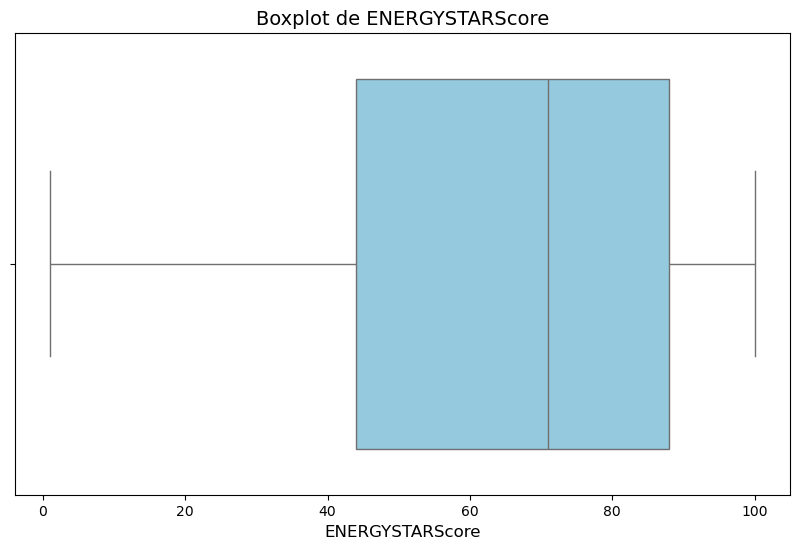

In [62]:
# Boxplot pour 'ENERGYSTARScore'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='ENERGYSTARScore', color='skyblue')
plt.title('Boxplot de ENERGYSTARScore', fontsize=14)
plt.xlabel('ENERGYSTARScore', fontsize=12)
plt.show()

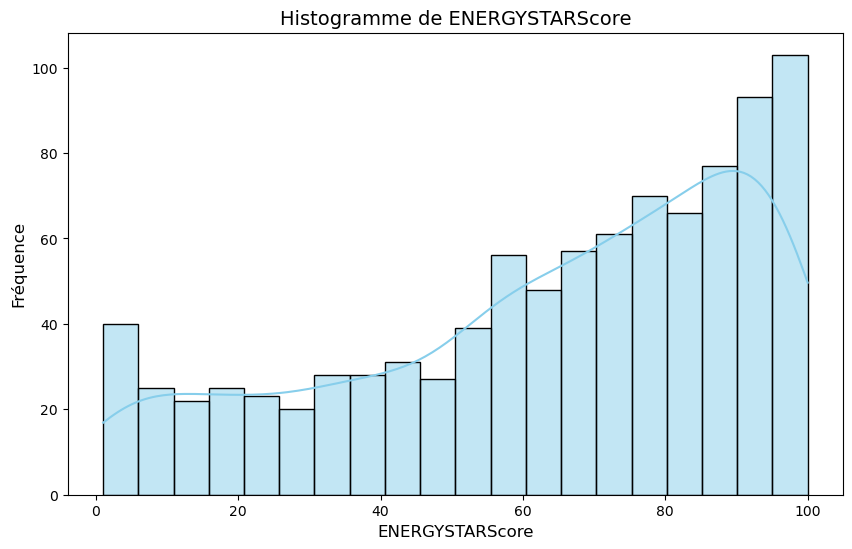

In [63]:
# Histogramme pour 'ENERGYSTARScore'
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['ENERGYSTARScore'], kde=True, bins=20, color='skyblue')
plt.title('Histogramme de ENERGYSTARScore', fontsize=14)
plt.xlabel('ENERGYSTARScore', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.show()

D'après les statistiques descriptives de la variable ENERGYSTARScore, on peut observer que la moyenne du score est de 63.83, avec un écart-type de 28.61. Le score varie entre 1 et 100, avec des valeurs de quartiles indiquant une répartition plutôt homogène :

Il n'y a pas de valeurs aberrantes visibles, car aucune valeur ne dépasse les bornes typiques pour un score ENERGY STAR compris entre 1 et 100. En outre, le boxplot confirme l'absence de valeurs extrêmes ou de points largement dissociés de la distribution principale.

Cela suggère que les données de ENERGYSTARScore sont bien distribuées sans anomalies notables.

## LargestPropertyUseType

LargestPropertyUseType indique l'usage spécifique occupant la plus grande surface dans la propriété, basé sur la mesure de la surface brute (GFA, Gross Floor Area). Par exemple, si un bâtiment est utilisé comme un centre commercial avec une grande surface dédiée à un supermarché, "Supermarché" pourrait être désigné comme le LargestPropertyUseType, même si d'autres usages (comme des bureaux) sont présents dans le bâtiment.
LargestPropertyUseType est basée sur la plus grande proportion de surface occupée par un usage spécifique dans le bâtiment.

In [64]:
df_cleaned['LargestPropertyUseType'].isnull().sum()

2

### Vérification de la répartition de la variable

In [65]:
df_cleaned['LargestPropertyUseType'].value_counts()

LargestPropertyUseType
Office                                   390
Non-Refrigerated Warehouse               143
Hotel                                     71
Retail Store                              71
Worship Facility                          63
K-12 School                               49
Distribution Center                       41
Medical Office                            37
Supermarket/Grocery Store                 37
Hospital (General Medical & Surgical)     10
Parking                                    6
Refrigerated Warehouse                     5
Financial Office                           4
Bank Branch                                4
Data Center                                3
Courthouse                                 1
Wholesale Club/Supercenter                 1
Other                                      1
Name: count, dtype: int64

### Etude de la catégorie "Other"

In [66]:
# Filtrer les lignes où LargestPropertyUseType est 'Other'
filtre = df_cleaned[df_cleaned['LargestPropertyUseType'] == 'Other'][['OSEBuildingID', 'BuildingType']]

# Afficher le résultat
filtre.head()

OSEBuildingID    BuildingType
529            716  NonResidential

In [67]:
# Modifier NumberofFloors
df_cleaned.loc[df_cleaned['OSEBuildingID'] == 716, 'LargestPropertyUseType'] = 'Retail Store'

In [68]:
df_cleaned['LargestPropertyUseType'].value_counts()

LargestPropertyUseType
Office                                   390
Non-Refrigerated Warehouse               143
Retail Store                              72
Hotel                                     71
Worship Facility                          63
K-12 School                               49
Distribution Center                       41
Medical Office                            37
Supermarket/Grocery Store                 37
Hospital (General Medical & Surgical)     10
Parking                                    6
Refrigerated Warehouse                     5
Financial Office                           4
Bank Branch                                4
Data Center                                3
Courthouse                                 1
Wholesale Club/Supercenter                 1
Name: count, dtype: int64

Dans le cadre de l'analyse des bâtiments, il est important de noter que certaines catégories de type de bâtiment dans la variable LargestPropertyUseType sont sous-représentées. Cela peut influencer les analyses futures ou la performance des modèles. Ces catégories incluent des types de bâtiments spécifiques comme "Police Station", "Data Center", "Library", et d'autres, qui apparaissent dans un nombre limité de cas dans le jeu de données.<br>

Pourquoi analyser les catégories sous-représentées ?<br>
Assurer la qualité des analyses : Les catégories très peu fréquentes peuvent manquer de données suffisantes pour fournir des insights significatifs.<br>
Garantir la robustesse des modèles : Dans le cadre de modèles statistiques ou d'apprentissage automatique, des catégories rares risquent d’être mal interprétées ou ignorées.<br>
Éviter les biais : Une catégorie sous-représentée pourrait néanmoins avoir un impact significatif dans certains contextes (par exemple, un type de bâtiment énergétiquement très performant ou énergivore).<br>

In [69]:
regroupements = {
    "Bureaux et services financiers": ["Office", "Medical Office", "Financial Office", "Bank Branch"],
    
    "Commerce, distribution et entrepôts": [
        "Retail Store", 
        "Supermarket/Grocery Store", 
        "Distribution Center", 
        "Wholesale Club/Supercenter", 
        "Non-Refrigerated Warehouse", 
        "Parking"
    ],
    
    "Hôtellerie et lieux de culte": [
        "Hotel", 
        "Worship Facility"
    ],
    
    "Installations spécialisées et services publics": [
        "K-12 School", 
        "Courthouse", 
        "Hospital (General Medical & Surgical)", 
        "Refrigerated Warehouse", 
        "Data Center"
    ]
}
# Fonction pour regrouper les valeurs dans les nouvelles catégories
def regrouper_categorie(categorie):
    for groupe, categories in regroupements.items():
        if categorie in categories:
            return groupe
    return categorie  # Si la catégorie ne correspond à aucune, elle reste inchangée

# Appliquer la fonction à la colonne 'LargestPropertyUseType'
df_cleaned['LargestPropertyUseType'] = df_cleaned['LargestPropertyUseType'].apply(regrouper_categorie)

# Afficher les nouvelles valeurs uniques dans la colonne 'LargestPropertyUseType'
print(df_cleaned['LargestPropertyUseType'].value_counts())

LargestPropertyUseType
Bureaux et services financiers                    435
Commerce, distribution et entrepôts               300
Hôtellerie et lieux de culte                      134
Installations spécialisées et services publics     68
Name: count, dtype: int64


Justification des regroupements :<br>
**Bureaux et services financiers** :<br>
Fonction principale : espaces de travail administratif et de services<br>
Caractéristiques communes :<br>
Aménagement intérieur similaire (bureaux, salles de réunion)<br>
Horaires d'occupation réguliers (généralement en journée)<br>
Équipements de bureau standard (ordinateurs, imprimantes)<br>
Types inclus : Bureau, Cabinet médical, Bureau financier, Agence bancaire<br>
**Commerce, distribution et entrepôts** :<br>
Fonction principale : vente, stockage et distribution de biens<br>
Caractéristiques communes :<br>
Grands espaces ouverts<br>
Zones de stockage<br>
Aménagements pour la circulation des marchandises<br>
Types inclus : Magasin de détail, Supermarché/Épicerie, Centre de distribution, Club de vente en gros/Supercentre, Entrepôt non réfrigéré, Stationnement<br>
**Hôtellerie et lieux de culte** :<br>
Fonction principale : accueil temporaire du public<br>
Caractéristiques communes :<br>
Espaces communs importants<br>
Occupation variable selon les heures/jours<br>
Aménagements pour le confort des visiteurs<br>
Types inclus : Hôtel, Lieu de culte<br>
**Installations spécialisées et services publics** :<br>
Fonction principale : services spécifiques à la communauté<br>
Caractéristiques communes :<br>
Aménagements intérieurs spécialisés<br>
Équipements techniques spécifiques<br>
Contraintes réglementaires strictes<br>
Gestion complexe nécessitant du personnel spécialisé<br>
Types inclus : École primaire et secondaire, Palais de justice, Hôpital (médecine générale et chirurgicale), Entrepôt réfrigéré, Centre de données<br>
Cette catégorisation se base sur les fonctions principales, les caractéristiques structurelles et les modes d'utilisation des bâtiments.

### Imputation des valeurs manquantes

In [70]:
# Filtrer les lignes où LargestPropertyUseType est NaN
lignes_nan_largest_property = df_cleaned[df_cleaned['LargestPropertyUseType'].isna()]

# Sélectionner les colonnes PrimaryPropertyType et ListOfAllPropertyUseTypes
resultat = lignes_nan_largest_property[['OSEBuildingID', 'PropertyName', 'Address','PrimaryPropertyType', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType']]

# Afficher le résultat
resultat.head()

OSEBuildingID         PropertyName               Address  \
1147          21103      Palladian Hotel    2000 Second Avenue   
2414          25568  Talon Northlake LLC  1341 N Northlake Way   

              PrimaryPropertyType ListOfAllPropertyUseTypes  \
1147                        Hotel                     Hotel   
2414  Small- and Mid-Sized Office                    Office   

     LargestPropertyUseType  
1147                    NaN  
2414                    NaN

In [71]:
df_cleaned.loc[df_cleaned['OSEBuildingID'] == 21103, 'LargestPropertyUseType'] = 'Hôtellerie et lieux de culte'
df_cleaned.loc[df_cleaned['OSEBuildingID'] == 25568, 'LargestPropertyUseType'] = 'Bureaux et services financiers'

In [72]:
df_cleaned['LargestPropertyUseType'].isnull().sum()

0

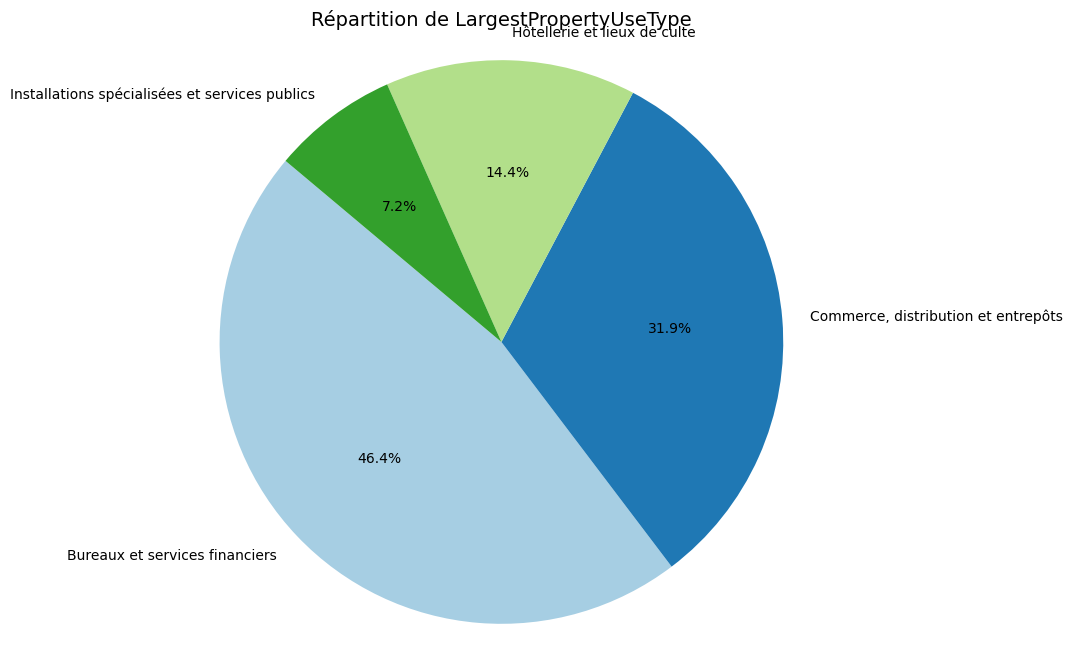

In [73]:
# Calculer les effectifs pour chaque type de propriété
largest_property_counts = df_cleaned['LargestPropertyUseType'].value_counts()

# Créer un pie chart
plt.figure(figsize=(8, 8))
plt.pie(largest_property_counts, labels=largest_property_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Répartition de LargestPropertyUseType', fontsize=14)
plt.axis('equal')  # Pour s'assurer que le pie chart est un cercle
plt.show()

Il faudra faire attention aux classes sous représentées et peut être envisager un regroupement pour rééquilibrer les classes.

## Variables de localisation

La localisation géographique d’un bâtiment peut avoir un impact significatif sur ses émissions de CO₂ et sa consommation énergétique. Cet effet peut s’expliquer par des facteurs environnementaux (climat local, humidité, température) ou socio-économiques (densité urbaine, type de bâtiments prédominants dans une zone).<br>

Dans ce contexte, deux variables de localisation sont disponibles dans le jeu de données : "CouncilDistrictCode" et "Neighborhood". Ces deux variables permettent de situer les bâtiments à des échelles géographiques différentes :<br>

"CouncilDistrictCode" représente des divisions administratives plus larges.<br>
"neighborhood" fournit une granularité plus fine et peut capturer des spécificités locales.<br>

Cependant, il est important de noter que l’effet observé pour ces variables pourrait ne pas être directement lié à leur localisation géographique en tant que telle, mais plutôt à la composition des bâtiments dans ces zones. Par exemple, si un district est composé majoritairement d’hôpitaux tandis qu’un autre est dominé par des bureaux, les variations dans les émissions pourraient être davantage dues à la typologie des bâtiments qu’à la localisation elle-même.
<br>
Pour déterminer laquelle de ces deux variables est la plus pertinente, il est essentiel d’examiner :<br>
Si la composition des types de bâtiments diffère significativement entre les quartiers ou districts.<br>
Si les variations dans les émissions de CO₂ ou la consommation énergétique peuvent être mieux expliquées par l’une ou l’autre de ces variables.<br>

Cette analyse servira de base pour sélectionner la variable de localisation la plus adaptée comme variable explicative pour les modèles ultérieurs.

### Vérification de la variable CouncilDistrictCode

In [74]:
# Convertir la colonne 'CouncilDistrictCode' en une variable de type catégoriel (category).
# Cela permet de traiter cette variable comme une catégorie plutôt que comme une valeur numérique.
# les districts seront considérés comme des catégories distinctes (et non comme des valeurs ordonnées).
df_cleaned['CouncilDistrictCode'] = df_cleaned['CouncilDistrictCode'].astype('category')

In [75]:
df_cleaned['CouncilDistrictCode'].isnull().sum()

0

In [76]:
df_cleaned['CouncilDistrictCode'].value_counts()

CouncilDistrictCode
7    331
2    218
3    101
4     96
5     71
6     62
1     60
Name: count, dtype: int64

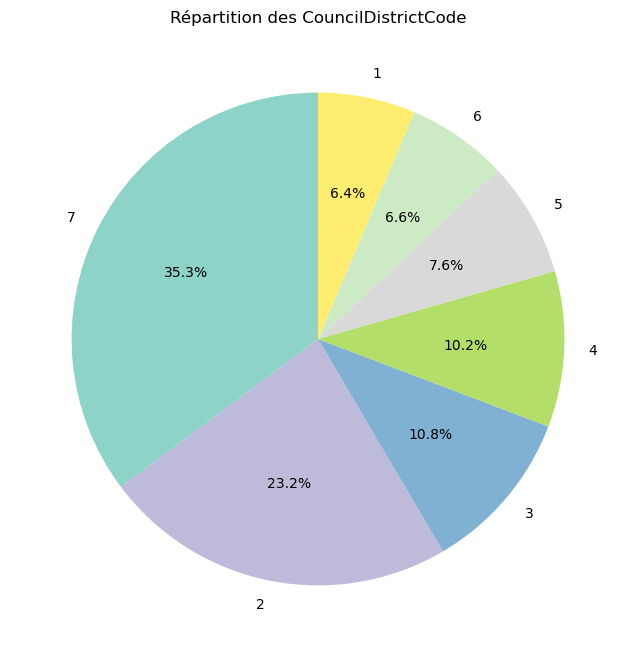

In [77]:
# Générer un diagramme circulaire (pie chart) des valeurs de CouncilDistrictCode
plt.figure(figsize=(8, 8))
df_cleaned['CouncilDistrictCode'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')

# Ajouter un titre
plt.title('Répartition des CouncilDistrictCode')

# Afficher le graphique
plt.ylabel('')  # Supprimer le label des y-axis
plt.show()

Seattle est divisé en sept districts du conseil municipal, chacun étant représenté par un conseiller municipal. Ces districts sont périodiquement mis à jour pour équilibrer la population et la représentation dans le gouvernement de la ville. Nos données sont cohérentes à ce niveau, nous avons bien 7 districts.
https://www.seattle.gov/images/Departments/Neighborhoods/Districts/Council%20District%20Map%20-%202024%20-%20FULL.png

### Vérification de la variable Neighborhood

In [78]:
df_cleaned['Neighborhood'].isnull().sum()

0

In [79]:
df_cleaned['Neighborhood'].value_counts()

Neighborhood
DOWNTOWN                 233
GREATER DUWAMISH         197
LAKE UNION                97
MAGNOLIA / QUEEN ANNE     84
NORTHEAST                 66
EAST                      60
NORTHWEST                 49
BALLARD                   32
NORTH                     29
DELRIDGE                  24
CENTRAL                   23
SOUTHEAST                 18
SOUTHWEST                 17
Ballard                    3
Northwest                  3
Delridge                   2
North                      2
Name: count, dtype: int64

In [80]:
# Calculer la répartition des Neighborhoods par CouncilDistrictCode
repartition_neighborhoods = df_cleaned.groupby('Neighborhood')['CouncilDistrictCode'].value_counts().unstack(fill_value=0)

# Afficher les résultats sous forme de tableau
print(repartition_neighborhoods)

CouncilDistrictCode     1    2   3   4   5   6    7
Neighborhood                                       
BALLARD                 0    0   0   0   0  32    0
Ballard                 0    0   0   0   0   3    0
CENTRAL                 0    0  23   0   0   0    0
DELRIDGE               24    0   0   0   0   0    0
DOWNTOWN                0   25   7   0   0   0  201
Delridge                2    0   0   0   0   0    0
EAST                    0    0  58   0   0   0    2
GREATER DUWAMISH       17  178   2   0   0   0    0
LAKE UNION              0    0   8  31   0  14   44
MAGNOLIA / QUEEN ANNE   0    0   0   0   0   0   84
NORTH                   0    0   0   1  28   0    0
NORTHEAST               0    0   0  64   2   0    0
NORTHWEST               0    0   0   0  39  10    0
North                   0    0   0   0   2   0    0
Northwest               0    0   0   0   0   3    0
SOUTHEAST               0   15   3   0   0   0    0
SOUTHWEST              17    0   0   0   0   0    0


Si je devais choisir une variable de localisation, je garderais le CouncilDistrictCode plutôt que les quartiers (Neighborhood). Voici pourquoi :

Uniformité des zones : Les districts sont définis de manière plus cohérente et uniforme, tandis que les quartiers peuvent varier beaucoup en taille et en significations. Les districts permettent donc des comparaisons plus claires.

Impact sur la consommation et les émissions : Ce qui influence surtout la consommation d'énergie et les émissions de CO2, ce sont les types de bâtiments présents dans une zone, et non le quartier lui-même. Par exemple, un district avec beaucoup d'hôpitaux ou d'industries aura des émissions différentes d'un autre district principalement résidentiel.

Pertinence pour la gestion locale : Les districts sont souvent associés à des politiques locales et des infrastructures publiques qui peuvent jouer un rôle important dans la consommation d'énergie et les émissions de CO2. Les quartiers sont plus locaux et moins représentatifs de ces dynamiques à grande échelle.

En résumé, le CouncilDistrictCode est plus adapté pour l'analyse des émissions et de la consommation d'énergie, car il prend en compte des facteurs plus larges et mieux structurés.

## Variables de construction

### Création d'une nouvelle variable "age_propriete"

L'âge de la propriété (ou de se rénovation complète) peut avoir un impact sur sa consommation d'énergie et ses émissions de CO2. Par exemple, les bâtiments plus anciens peuvent être moins efficaces sur le plan énergétique en raison de technologies moins avancées et de matériaux moins performants. En créant une nouvelle variable age_propriete, qui représente l'âge de chaque bâtiment, nous pourrons mieux comprendre comment cet aspect influence les performances environnementales des bâtiments. Cette variable nous permettra d'intégrer l'âge des bâtiments dans nos analyses et de voir s'il existe une corrélation entre l'âge d'une propriété (ou de leur rénovation complète) et sa consommation ou ses émissions.

In [81]:
# Calculer l'année actuelle
current_year = datetime.now().year

# Créer la nouvelle variable 'age_propriete' en soustrayant l'année de construction de l'année actuelle
df_cleaned['age_propriete'] = current_year - df_cleaned['YearBuilt']

# Vérifier les premières lignes pour voir le résultat
df_cleaned[['YearBuilt', 'age_propriete']].head()

YearBuilt  age_propriete
0       1927             98
1       1996             29
2       1969             56
3       1926             99
4       1980             45

In [82]:
df_cleaned['age_propriete'].isnull().sum()

0

In [83]:
df_cleaned['age_propriete'].describe()

count    939.000000
mean      62.240682
std       31.697255
min       10.000000
25%       37.000000
50%       58.000000
75%       88.000000
max      125.000000
Name: age_propriete, dtype: float64

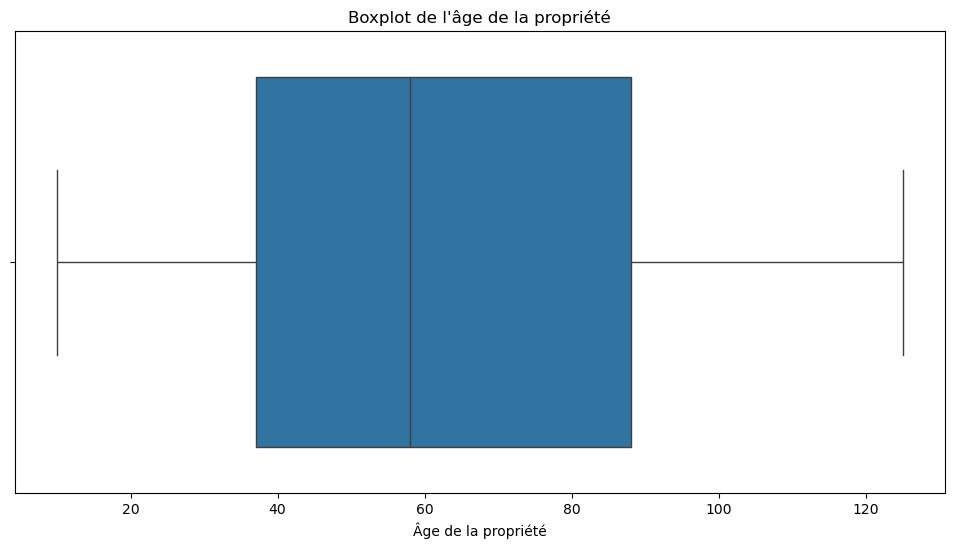

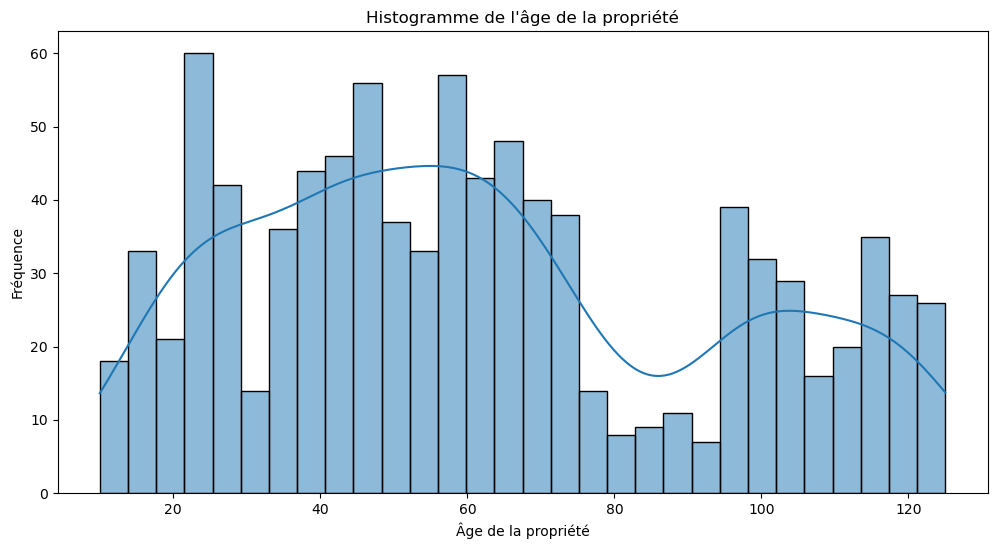

In [84]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_cleaned['age_propriete'])
plt.title('Boxplot de l\'âge de la propriété')
plt.xlabel('Âge de la propriété')
plt.show()

# Histogramme
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['age_propriete'], kde=True, bins=30)
plt.title('Histogramme de l\'âge de la propriété')
plt.xlabel('Âge de la propriété')
plt.ylabel('Fréquence')
plt.show()

L'âge des propriétés varie de 10 à 125 ans, avec une moyenne de 62 ans. La distribution semble cohérente. De plus, le boxplot ne montre aucune valeur extrême, ce qui confirme qu'il n'y a pas de valeurs aberrantes. En conclusion, cette variable semble prête à être utilisée telle quelle, et il n'est pas nécessaire de procéder à un traitement supplémentaire pour les valeurs aberrantes.

### Vérification de la variable NumberofBuildings

Lorsqu'une propriété comprend plusieurs bâtiments (comme un campus), le nombre de bâtiments peut influencer directement la consommation d'énergie et les émissions de CO2. En général, plus une propriété possède de bâtiments, plus la consommation et les émissions pourraient être élevées. Toutefois, cela dépend aussi de l'utilisation de ces bâtiments et de l'efficacité de leurs équipements. Par exemple, dans une propriété avec plusieurs bâtiments, des systèmes énergétiques partagés ou des infrastructures communes, comme un chauffage ou une climatisation centralisés, peuvent impacter la consommation globale d'énergie et les émissions.

In [85]:
df_cleaned['NumberofBuildings'] = df_cleaned['NumberofBuildings'].astype(int)

In [86]:
df_cleaned['NumberofBuildings'].isnull().sum()

0

In [87]:
df_cleaned['NumberofBuildings'].describe()

count    939.000000
mean       1.026624
std        0.526823
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        9.000000
Name: NumberofBuildings, dtype: float64

In [88]:
# Filtrer les bâtiments avec NumberofBuildings = 0
bats_zero_buildings = df_cleaned[df_cleaned['NumberofBuildings'] == 0][['OSEBuildingID', 'Address', 'ZipCode', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking','PropertyGFABuilding(s)' ]]

# Afficher le nombre de bâtiments avec NumberofBuildings = 0
nombre_bats_zero = bats_zero_buildings.shape[0]

# Afficher le résultat et le nombre
print(f"Nombre de bâtiments avec NumberofBuildings = 0 : {nombre_bats_zero}")
bats_zero_buildings.head(22)

Nombre de bâtiments avec NumberofBuildings = 0 : 21


OSEBuildingID                 Address  ZipCode  NumberofFloors  \
63               89        1200 Harvard Ave  98122.0               3   
160             257        3235 16TH AVE SW  98134.0               4   
201             322            2801 3rd Ave  98121.0               3   
241             366         1107 NE 45th St  98105.0               5   
264             391  8300 Military Rd South  98108.0               1   
278             408            1424 4th Ave  98101.0              10   
280             410            1414 4th Ave  98101.0              19   
365             517    13550 Aurora Ave. N.  98133.0               1   
477             640     2401 Utah Ave South  98134.0               6   
481             649     815 Seattle Blvd S.  98134.0               4   
494             673    7345 Delridge Way SW  98106.0               1   
1256          21365            700 Broadway  98114.0               3   
2054          24270    7500 Greenwood Ave N  98103.0               2   
2115          24514      10002 AURORA AVE N  98133.0               1   
2214          24822   1943 1st Avenue South  98134.0               3   
2482          25772  1703 California Ave SW  98116.0               3   
2631          26331        1501 N. 45th ST.  98103.0               3   
2715          26719       220 3rd Ave South  98104.0               2   
2963          27673           1000 1st Ave.  98104.0              10   
3108          33289            2827 2nd Ave  98121.0              24   
3121          36034           1401 Broadway  98122.0               3   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  
63              179014                   0                  179014  
160              79600                   0                   79600  
201             100734               26731                   74003  
241              99005                   0                   99005  
264              88400                   0                   88400  
278             132326                   0                  132326  
280             332067               59280                  272787  
365             144776                   0                  144776  
477            1380959                   0                 1380959  
481              76624                   0                   76624  
494              94713                   0                   94713  
1256             39115                   0                   39115  
2054             41600                   0                   41600  
2115             45155                   0                   45155  
2214             49052                   0                   49052  
2482             54863                   0                   54863  
2631             31686                7358                   24328  
2715             33640                   0                   33640  
2963            392552               22225                  370327  
3108            119701                   0                  119701  
3121             45743                   0                   45743

Pour chaque cas, j'ai mené une investigation approfondie en utilisant un site web (.https://experience.arcgis.com/experience/1e8368d19ec74415b54c2b86c36e0968#data_s=id%3Awidget_37_output_config_0%3A0
) permettant de visualiser les données cadastrales de la ville de Seattle et d'accéder à des images satellites. J'ai vérifié manuellement le nombre de bâtiments sur ce site pour chaque cas, assurant ainsi la validité des données

In [89]:
# Remplacer les valeurs de NumberofBuildings égales à 0 par 1
df_cleaned.loc[df_cleaned_filtered['NumberofBuildings'] == 0, 'NumberofBuildings'] = 1

In [90]:
df_cleaned['NumberofBuildings'].describe()

count    939.000000
mean       1.048988
std        0.503449
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        9.000000
Name: NumberofBuildings, dtype: float64

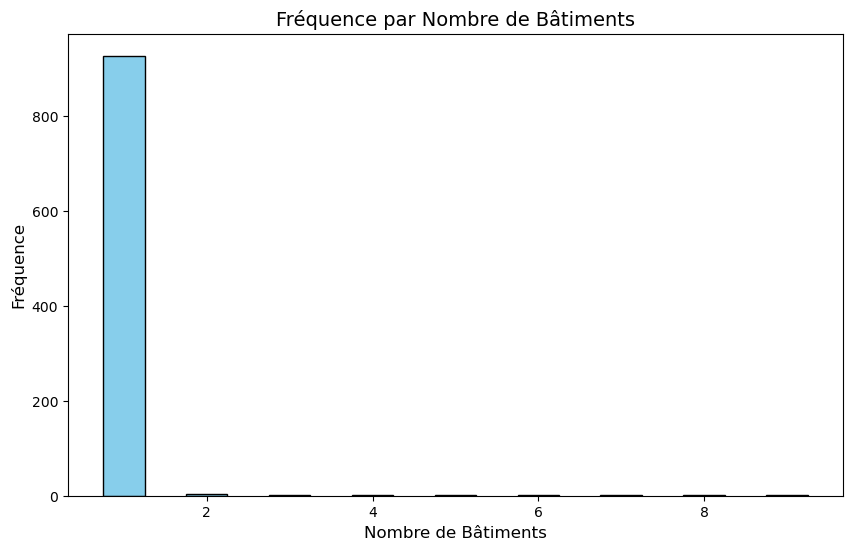

In [91]:
plt.figure(figsize=(10, 6))

# Calcul des fréquences
frequence = df_cleaned['NumberofBuildings'].value_counts().sort_index()

# Création du barplot
plt.bar(frequence.index, frequence.values, color='skyblue', edgecolor='black', width=0.5)

# Ajout des labels et d'un titre
plt.title('Fréquence par Nombre de Bâtiments', fontsize=14)
plt.xlabel('Nombre de Bâtiments', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)

# Affichage
plt.show()

C:\Users\joan6\AppData\Local\Temp\ipykernel_32500\459678997.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


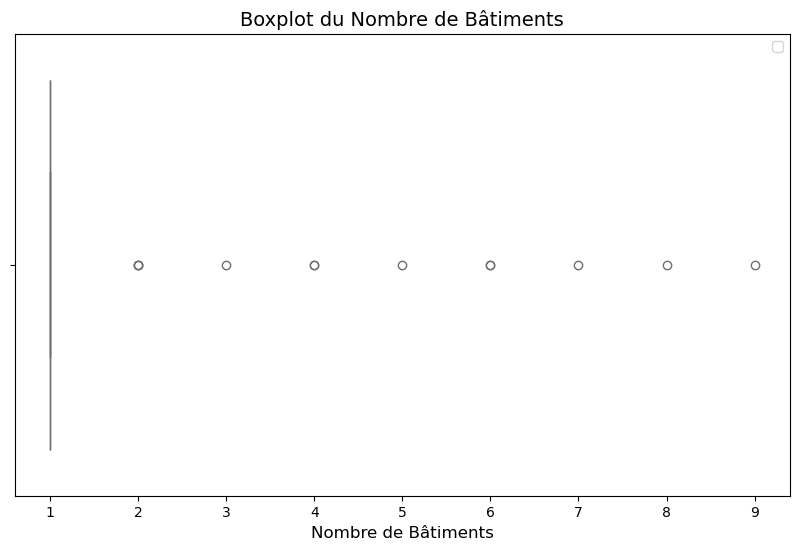

In [92]:
# Création du boxplot horizontal
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='NumberofBuildings', color='skyblue')

# Ajout des labels et d'un titre
plt.title('Boxplot du Nombre de Bâtiments', fontsize=14)
plt.xlabel('Nombre de Bâtiments', fontsize=12)
plt.legend()
# Affichage du graphique
plt.show()

In [93]:
# Calcul du pourcentage de valeurs égales à 1
percent_one = (df_cleaned['NumberofBuildings'] == 1).sum() / len(df_cleaned) * 100
print(f"Pourcentage des enregistrements avec 1 bâtiment : {percent_one:.2f}%")

Pourcentage des enregistrements avec 1 bâtiment : 98.72%


Avec 98.73% des enregistrements ayant une seule valeur pour NumberofBuildings, cette variable montre une faible variabilité, ce qui peut limiter son utilité pour des analyses ou modèles prédictifs.<br>
Problème : Une variable qui a une distribution fortement biaisée (ici, 98.73% à 1) peut avoir peu de valeur explicative dans des analyses statistiques ou des modèles, car elle ne différencie pas suffisamment les observations.<br>
Les modèles peuvent ignorer cette variable ou attribuer un faible poids à cause de son absence de variabilité.

### Vérification de la variable NumberofFloors

Le nombre d'étages d'un bâtiment joue un rôle crucial dans ses performances environnementales et énergétiques. Cette caractéristique architecturale influence directement les émissions de CO2 et la consommation d'énergie de l'édifice, et ce pour plusieurs raisons :<br>
Surface d'enveloppe : Les bâtiments plus hauts ont généralement une surface d'enveloppe plus importante par rapport à leur volume, ce qui peut augmenter les pertes thermiques et la demande en chauffage ou climatisation.<br>
Systèmes mécaniques : Les immeubles de grande hauteur nécessitent des systèmes de ventilation, d'ascenseurs et de pompage plus complexes et énergivores.<br>
Éclairage naturel : La hauteur du bâtiment peut affecter l'accès à la lumière naturelle, impactant ainsi la consommation d'éclairage artificiel.<br>
Matériaux de construction : Les gratte-ciels requièrent souvent des matériaux à forte intensité carbone comme l'acier et le béton en grandes quantités.

In [94]:
df_cleaned['NumberofFloors'].isnull().sum()

0

In [95]:
df_cleaned['NumberofFloors'].describe()

count    939.000000
mean       5.110756
std        8.186556
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       99.000000
Name: NumberofFloors, dtype: float64

In [96]:
# Filtrer les bâtiments avec 'NumberofFloors = 0
bats_zero_etage = df_cleaned[df_cleaned['NumberofFloors'] == 0][['OSEBuildingID', 'Address', 'ZipCode', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking','PropertyGFABuilding(s)' ]]

# Afficher le nombre de bâtiments avec NumberofBuildings = 0
nombre_bats_zero = bats_zero_etage.shape[0]

# Afficher le résultat et le nombre
print(f"Nombre de bâtiments avec NumberofBuildings = 0 : {nombre_bats_zero}")
bats_zero_etage.head(11)

Nombre de bâtiments avec NumberofBuildings = 0 : 5


OSEBuildingID               Address  ZipCode  NumberofFloors  \
487             656   1221 Madison Street  98104.0               0   
1754          23311  1124 Columbia Street  98104.0               0   
3130          40028      7561 63rd Ave NE  98115.0               0   
3131          40031       6222 NE 74th St  98115.0               0   
3132          40034       6200 NE 74th ST  98115.0               0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  
487             225982                   0                  225982  
1754            274568                   0                  274568  
3130            384772                   0                  384772  
3131             30287                   0                   30287  
3132             21931                   0                   21931

Bâtiment 656:<br>
À l'adresse 1221 Madison St, Seattle, WA, 98104, se trouve le Swedish First Hill Campus, qui abrite plusieurs services médicaux. Plus précisément, vous y trouverez le Surgical Specialists - Madison, qui fait partie de ce campus. Ce site est un bâtiment médical de 15 étages, connecté au campus principal de Swedish par un skybridge.<br>

Bâtiment 23311: <br>
L'adresse 1124 Columbia St, Seattle, WA, 98104 abrite le First Hill Medical Pavilion, qui est un bâtiment de 6 étages.

Bâtiment 40028: <br>
À l'adresse 7561 63rd Ave NE, Seattle, WA, 98115, se trouve le Advanced Composites Center (ACC) qui fait partie de l'Université de Washington. Ce bâtiment est un bâtiment de 1 étage. 

Bâtiment 40031: <br>
À l'adresse 6222 NE 74th St, Seattle, WA, 98115, se trouve le Northwest Center for Oral and Facial Surgery ainsi que le Center for Pediatric Dentistry. Le bâtiment qui abrite ces bureaux médicaux est un bâtiment de 2 étages.

Bâtiment 40034: <br>
À l'adresse 6200 NE 74th St, Seattle, WA, 98115, se trouve le Collaborative Health Studies Coordinating Center. Ce bâtiment est un bâtiment de 2 étages.

In [97]:
# Modifier NumberofFloors
df_cleaned.loc[df_cleaned_filtered['OSEBuildingID'] == 656, 'NumberofFloors'] = 15
df_cleaned.loc[df_cleaned_filtered['OSEBuildingID'] == 23311, 'NumberofFloors'] = 6
df_cleaned.loc[df_cleaned_filtered['OSEBuildingID'] == 40028, 'NumberofFloors'] = 1
df_cleaned.loc[df_cleaned_filtered['OSEBuildingID'] == 40031, 'NumberofFloors'] = 2
df_cleaned.loc[df_cleaned_filtered['OSEBuildingID'] == 40034, 'NumberofFloors'] = 2

In [98]:
# Calcul des quartiles
Q1 = df_cleaned['NumberofFloors'].quantile(0.25)
Q3 = df_cleaned['NumberofFloors'].quantile(0.75)

# Calcul de l'IQR
IQR = Q3 - Q1

# Calcul des limites inférieure et supérieure
IQR_inf = Q1 - 1.5 * IQR
IQR_sup = Q3 + 1.5 * IQR

# Affichage des résultats
print(f"Limite inférieure : {IQR_inf}")
print(f"Limite supérieure : {IQR_sup}")

Limite inférieure : -5.0
Limite supérieure : 11.0


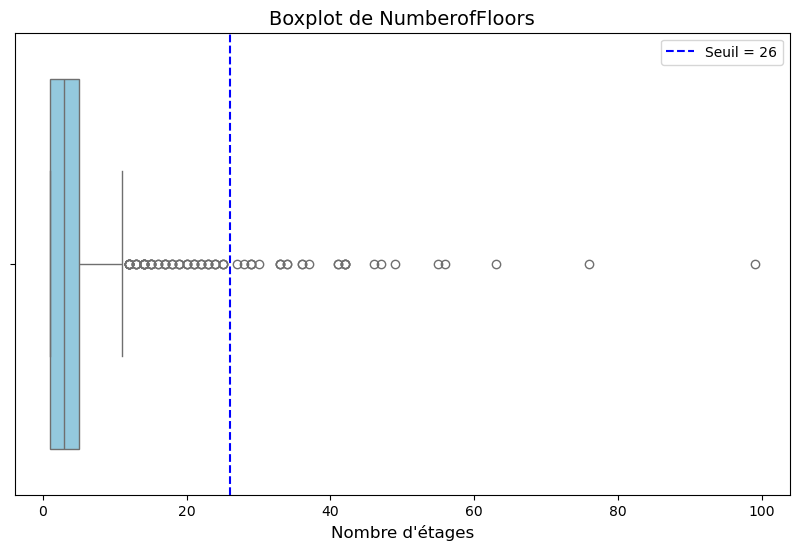

In [99]:
# Création du boxplot horizontal
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='NumberofFloors', color='skyblue')
plt.axvline(26, color='blue', linestyle='--', label='Seuil = 26')
# Ajout des labels et d'un titre
plt.title('Boxplot de NumberofFloors', fontsize=14)
plt.xlabel('Nombre d\'étages', fontsize=12)
plt.legend()

# Affichage du graphique
plt.show()

In [100]:
# Filtrer les bâtiments ayant plus de 8 étages
batiments_plus_11_etages = df_cleaned[df_cleaned['NumberofFloors'] > 11]

# Afficher le nombre de bâtiments concernés
nombre_batiments_plus_11_etages = batiments_plus_11_etages.shape[0]
print(f"Nombre de bâtiments ayant plus de 8 étages : {nombre_batiments_plus_11_etages}")

Nombre de bâtiments ayant plus de 8 étages : 82


In [101]:
# Filtrer les bâtiments ayant plus de 8 étages
batiments_plus_26_etages = df_cleaned[df_cleaned['NumberofFloors'] > 26]

# Afficher le nombre de bâtiments concernés
nombre_batiments_plus_26_etages = batiments_plus_26_etages.shape[0]
print(f"Nombre de bâtiments ayant plus de 26 étages : {nombre_batiments_plus_26_etages}")

# Sélectionner les colonnes spécifiées
colonnes_interessees = ['OSEBuildingID','PropertyName', 'Address', 'ZipCode', 'NumberofFloors']
batiments_plus_26_etages_selection = batiments_plus_26_etages[colonnes_interessees]

# Afficher les résultats
batiments_plus_26_etages_selection

Nombre de bâtiments ayant plus de 26 étages : 28


OSEBuildingID                       PropertyName  \
2                 3            5673-The Westin Seattle   
13               18         Crowne Plaza Hotel Seattle   
17               23          Renaissance Seattle Hotel   
49               63             Sheraton Seattle Hotel   
206             328                       1600 Seventh   
214             336                 1918 Eighth Avenue   
221             345                   999 Third Avenue   
222             346                 1000 Second Avenue   
225             349                     2nd and Seneca   
227             351                  1111 Third Avenue   
229             353                       Safeco Plaza   
230             354                   Fourth & Madison   
231             355                   901 Fifth Avenue   
233             357     Seattle Municipal Tower (2030)   
261             388                      Rainier Tower   
271             399                  1201 Third Avenue   
273             402                     US Bank Centre   
277             406                     520 Pike Tower   
285             415    Century Square - COS Compliance   
292             422                   Two Union Square   
293             423                   One Union Square   
490             659         Russell Investments Center   
558             753                     WestinBuilding   
559             775             Columbia Center - 2015   
570             764  Financial Center - COS Compliance   
571             765                      Seattle Tower   
577             772                   800 Fifth Avenue   
1359          21611     Seattle Chinese Baptist Church   

                         Address  ZipCode  NumberofFloors  
2                1900 5th Avenue  98101.0              41  
13                  1113 6th Ave  98101.0              33  
17            515 Madison Street  98104.0              28  
49               1400 6th Avenue  98101.0              34  
206                 1600 7th Ave  98191.0              33  
214           1918 Eighth Avenue  98101.0              36  
221   999 3rd Avenue, Suite 1550  98104.0              47  
222           1000 Second Avenue  98104.0              41  
225              1191 2nd Avenue  98101.0              29  
227       1111 3rd Ave Suite 310  98101.0              34  
229           1001 Fourth Avenue  98154.0              49  
230            925 Fourth Avenue  98104.0              37  
231             901 Fifth Avenue  98164.0              42  
233             700 Fifth Avenue  98104.0              63  
261                 1301 5th Ave  98101.0              42  
271                 1201 3rd ave  98101.0              55  
273              1420 5th Avenue  98101.0              46  
277              520 Pike Street  98101.0              29  
285                 1501 4th Ave  98101.0              30  
292                601 Union St.  98101.0              56  
293        600 University Street  98101.0              36  
490                 1301 2nd Ave  98101.0              42  
558                 2001 6th Ave  98121.0              33  
559               701 5th Avenue  98104.0              76  
570              1215 4th Avenue  98101.0              29  
571              1218 3rd Avenue  98101.0              27  
577                  800 5th Ave  98104.0              42  
1359    5801 Beacon Avenue South  98108.0              99

| Property Name                             | Address                        | Zip Code | Number of Floors | Vérification des Étages |
|:-----------------------------------------|:-------------------------------|:---------|:-----------------|:------------------------|
| The Westin Seattle                       | 1900 5th Avenue               | 98101    | 41               | Correct     |
| Crowne Plaza Hotel Seattle               | 1113 6th Ave                  | 98101    | 33               | Correct     |
| Renaissance Seattle Hotel                | 515 Madison Street             | 98104    | 28               | Correct     |
| Sheraton Seattle Hotel                   | 1400 6th Avenue               | 98101    | 34               | Correct      |
| Grand Hyatt Seattle                       | 721 Pine St                   | 98101    | 30               | Correct      |
| 1600 Seventh                             | 1600 7th Ave                  | 98191    | 33               | Correct      |
| 1918 Eighth Avenue                       | 1918 Eighth Avenue            | 98101    | 36               | Correct      |
| 999 Third Avenue                         | 999 3rd Avenue, Suite 1550   | 98104    | 47               | Correct     |
| 1000 Second Avenue                       | 1000 Second Avenue            | 98104    | 41               | Correct      |
| 2nd and Seneca                          | 1191 2nd Avenue               | 98101    | 29               | Correct      |
| 1111 Third Avenue                        | 1111 3rd Ave Suite 310       | 98101    | 34               | Correct      |
| Safeco Plaza                             | 1001 Fourth Avenue            | 98154    | 49               | Correct     |
| Fourth & Madison                         | 925 Fourth Avenue             | 98104    | 37               | Correct     |
| 901 Fifth Avenue                         | 901 Fifth Avenue              | 98164    | 42               | Correct      |
| Seattle Municipal Tower (2030)          | 700 Fifth Avenue              | 98104    | 63               | Correct      |
| Rainier Tower                            | 1301 5th Ave                  | 98101    | 42               | Faux (31 étages)     |
| 1201 Third Avenue                  | 1201 Third Ave           | 98101| 55          | Correct             |
| US Bank Centre                           | 1420 Fifth Avenue         | 98101| 46          | Correct             |
| 520 Pike Tower                     | 520 Pike Street          | 98101| 29           | Correct             |
| Century Square - COS Compliance          | 1501 Fourth Ave          | 98101| 30           | Correct            |
| Two Union Square                         | 601 Union St.            | 98101| 56           | Correct             |
| One Union Square                         | 600 University Street     | 98101| 36           | Correct             |
| Russell Investments Center                | 1301 Second Ave          | 98101| 42           | Correct             |
| Westin Building                          | 2001 Sixth Ave            | 98121| 33          | Correct             |
| Columbia Center - 2015                  | 701 Fifth Avenue         	| 98104	| 76          	|	Correct                 |
| Financial Center - COS Compliance        | 1215 4th Avenue               | 98101    | 29               | Correct    |
| Seattle Tower                            | 1218 3rd Avenue               | 98101    | 27               | Correct     |
| 800 Fifth Avenue                         | 800 5th Ave                   | 98104    | 42               | Correct     |
| Seattle Chinese Baptist Church           | 5801 Beacon Avenue South      | 98108    | 99               | Faux (1 étages)     |


In [102]:
# Modifier NumberofFloors
df_cleaned.loc[df_cleaned_filtered['OSEBuildingID'] == 388, 'NumberofFloors'] = 31
df_cleaned.loc[df_cleaned_filtered['OSEBuildingID'] == 21611, 'NumberofFloors'] = 1

### Vérification de la variable PropertyGFABuilding(s)

In [103]:
df_cleaned['PropertyGFABuilding(s)'].isnull().sum()

0

In [104]:
df_cleaned['PropertyGFABuilding(s)'].describe()

count    9.390000e+02
mean     1.116337e+05
std      1.833187e+05
min      1.620000e+04
25%      3.005450e+04
50%      5.001700e+04
75%      1.064050e+05
max      1.765970e+06
Name: PropertyGFABuilding(s), dtype: float64

In [105]:
# Calcul des quartiles
Q1 = df_cleaned['PropertyGFABuilding(s)'].quantile(0.25)
Q3 = df_cleaned['PropertyGFABuilding(s)'].quantile(0.75)

# Calcul de l'IQR
IQR = Q3 - Q1

# Calcul des limites inférieure et supérieure
IQR_inf = Q1 - 1.5 * IQR
IQR_sup = Q3 + 1.5 * IQR

# Affichage des résultats
print(f"Limite inférieure : {IQR_inf}")
print(f"Limite supérieure : {IQR_sup}")

Limite inférieure : -84471.25
Limite supérieure : 220930.75


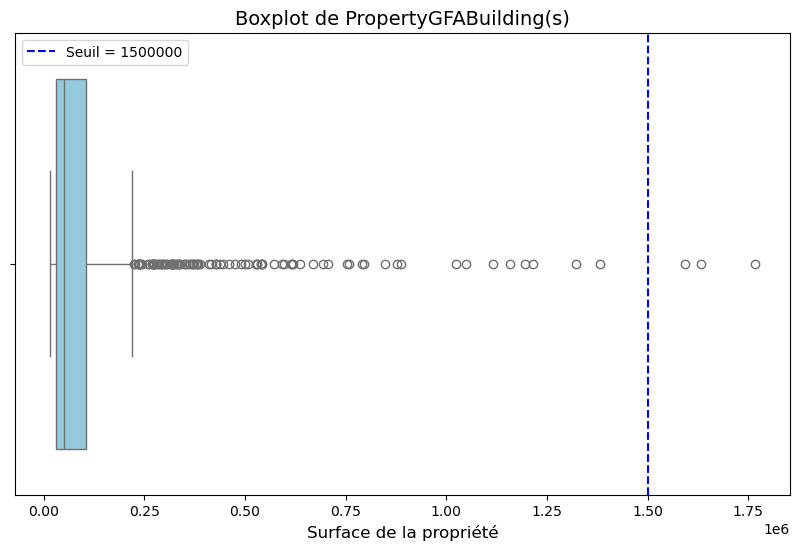

In [106]:
# Création du boxplot horizontal
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='PropertyGFABuilding(s)', color='skyblue')
plt.axvline(1500000, color='blue', linestyle='--', label='Seuil = 1500000')
# Ajout des labels et d'un titre
plt.title('Boxplot de PropertyGFABuilding(s)', fontsize=14)
plt.xlabel('Surface de la propriété', fontsize=12)
plt.legend()

# Affichage du graphique
plt.show()

In [107]:
# Filtrer les bâtiments 
bats_max_surface = df_cleaned[df_cleaned['PropertyGFABuilding(s)'] > 1500000][['OSEBuildingID', 'PropertyName', 'Address', 'ZipCode','NumberofBuildings', 'PropertyGFATotal', 'PropertyGFAParking','PropertyGFABuilding(s)' ]]

# Afficher le nombre de bâtiments 
nombre_max = bats_max_surface.shape[0]

# Afficher le résultat et le nombre
print(f"Nombre de bâtiments avec PropertyGFABuilding(s) max : {nombre_max}")
bats_max_surface.head()

Nombre de bâtiments avec PropertyGFABuilding(s) max : 3


OSEBuildingID                PropertyName         Address  ZipCode  \
490            659  Russell Investments Center    1301 2nd Ave  98101.0   
559            775      Columbia Center - 2015  701 5th Avenue  98104.0   
618            828          Swedish First Hill    747 Broadway  98122.0   

     NumberofBuildings  PropertyGFATotal  PropertyGFAParking  \
490                  1           1592914                   0   
559                  1           1952220              319400   
618                  7           1765970                   0   

     PropertyGFABuilding(s)  
490                 1592914  
559                 1632820  
618                 1765970

Russell Investments Center : 1,592,914 sqft<br>
Ce bâtiment est un grand centre d'investissement situé dans une zone urbaine de Seattle, donc sa superficie de 1,59 million de pieds carrés est tout à fait plausible. Ce type de bâtiment pourrait comporter des bureaux, des espaces commerciaux et des installations communes.<br>

Columbia Center - 2015 : 1,632,820 sqft<br>
Le Columbia Center est un gratte-ciel bien connu à Seattle, donc sa superficie de 1,63 million de pieds carrés semble également cohérente, étant donné la taille du bâtiment (près de 1 000 pieds de hauteur).<br>

Swedish First Hill : 1,765,970 sqft<br>
Ce bâtiment fait partie d'un complexe hospitalier. Une superficie de 1,76 million de pieds carrés est plausible pour un grand hôpital avec plusieurs bâtiments, des salles d'opération, des bureaux, etc.<br>

In [108]:
# Vérifier si PropertyGFATotal = PropertyGFAParking + PropertyGFABuilding(s)
df_cleaned['CalculatedGFATotal'] = df_cleaned['PropertyGFAParking'] + df_cleaned['PropertyGFABuilding(s)']

# Créer une colonne de vérification pour voir si les valeurs sont égales
df_cleaned['Check_GFA'] = df_cleaned['PropertyGFATotal'] == df_cleaned['CalculatedGFATotal']

# Afficher le nombre de lignes où la condition est vraie
nombre_lignes_valides = df_cleaned['Check_GFA'].sum()
print(f"Nombre de lignes où la condition est respectée : {nombre_lignes_valides}")

# Afficher les lignes qui ne respectent pas la condition
lignes_non_valides = df_cleaned[~df_cleaned['Check_GFA']]
print(f"Lignes non valides : \n{lignes_non_valides[['PropertyName', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'CalculatedGFATotal']]}")

Nombre de lignes où la condition est respectée : 939
Lignes non valides : 
Empty DataFrame
Columns: [PropertyName, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), CalculatedGFATotal]
Index: []


### Vérification de la variable LargestPropertyUseTypeGFA

In [109]:
df_cleaned['LargestPropertyUseTypeGFA'].isnull().sum()

2

In [110]:
df_cleaned['LargestPropertyUseTypeGFA'].describe()

count    9.370000e+02
mean     1.059553e+05
std      1.737200e+05
min      8.061000e+03
25%      2.755300e+04
50%      4.799400e+04
75%      1.039700e+05
max      1.680937e+06
Name: LargestPropertyUseTypeGFA, dtype: float64

In [111]:
# Calcul des quartiles
Q1 = df_cleaned['LargestPropertyUseTypeGFA'].quantile(0.25)
Q3 = df_cleaned['LargestPropertyUseTypeGFA'].quantile(0.75)

# Calcul de l'IQR
IQR = Q3 - Q1

# Calcul des limites inférieure et supérieure
IQR_inf = Q1 - 1.5 * IQR
IQR_sup = Q3 + 1.5 * IQR

# Affichage des résultats
print(f"Limite inférieure : {IQR_inf}")
print(f"Limite supérieure : {IQR_sup}")

Limite inférieure : -87072.5
Limite supérieure : 218595.5


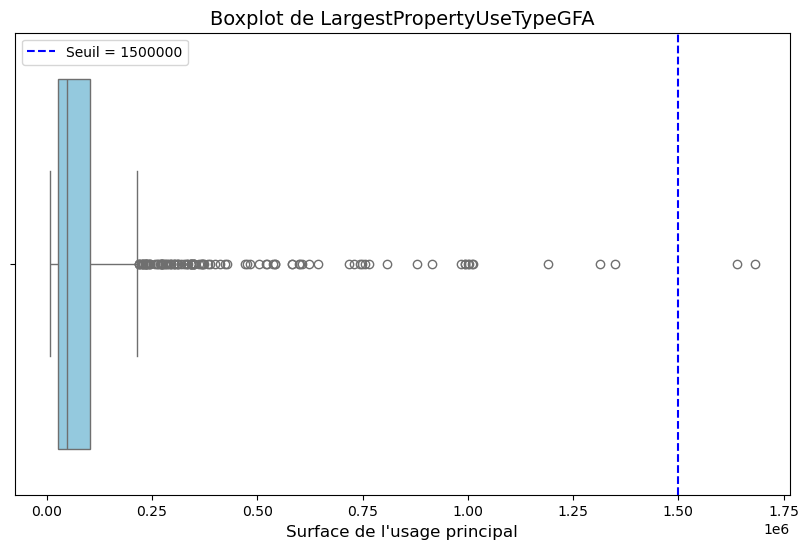

In [112]:
# Création du boxplot horizontal
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='LargestPropertyUseTypeGFA', color='skyblue')
plt.axvline(1500000, color='blue', linestyle='--', label='Seuil = 1500000')
# Ajout des labels et d'un titre
plt.title('Boxplot de LargestPropertyUseTypeGFA', fontsize=14)
plt.xlabel('Surface de l\'usage principal', fontsize=12)
plt.legend()

# Affichage du graphique
plt.show()

In [113]:
# Filtrer les bâtiments 
bats_max_surface = df_cleaned[df_cleaned['LargestPropertyUseTypeGFA'] > 1500000][['OSEBuildingID', 'PropertyName', 'Address', 'ZipCode', 'PropertyGFATotal', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA','PropertyGFABuilding(s)']]

# Afficher le nombre de bâtiments 
nombre_max = bats_max_surface.shape[0]

# Afficher le résultat et le nombre
print(f"Nombre de bâtiments avec LargestPropertyUseTypeGFA max : {nombre_max}")
bats_max_surface.head()

Nombre de bâtiments avec LargestPropertyUseTypeGFA max : 2


OSEBuildingID            PropertyName         Address  ZipCode  \
559            775  Columbia Center - 2015  701 5th Avenue  98104.0   
618            828      Swedish First Hill    747 Broadway  98122.0   

     PropertyGFATotal                          LargestPropertyUseType  \
559           1952220                  Bureaux et services financiers   
618           1765970  Installations spécialisées et services publics   

     LargestPropertyUseTypeGFA  PropertyGFABuilding(s)  
559                  1680937.0                 1632820  
618                  1639334.0                 1765970

Columbia Center - 2015 :<br>
LargestPropertyUseTypeGFA : 1,680,937 sq ft<br>
PropertyGFATotal : 1,952,220 sq ft<br>
PropertyGFABuilding(s) : 1,632,820 sq ft<br>
La valeur de LargestPropertyUseTypeGFA est cohérente car elle est inférieure à PropertyGFATotal.<br>

Swedish First Hill :<br>
LargestPropertyUseTypeGFA : 1,639,334 sq ft<br>
PropertyGFATotal : 1,765,970 sq ft<br>
PropertyGFABuilding(s) : 1,765,970 sq ft<br>
La valeur de LargestPropertyUseTypeGFA est cohérente car elle est inférieure à PropertyGFATotal.<br>

#### Imputation des valeurs manquantes

In [114]:
# Filtrer les lignes où LargestPropertyUseType est NaN
lignes_nan_largest_property = df_cleaned[df_cleaned['LargestPropertyUseTypeGFA'].isna()]

# Sélectionner les colonnes PrimaryPropertyType et ListOfAllPropertyUseTypes
resultat = lignes_nan_largest_property[['OSEBuildingID', 'PropertyName', 'PropertyGFATotal', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA','PropertyGFABuilding(s)']]

# Afficher le résultat
resultat.head()

OSEBuildingID         PropertyName  PropertyGFATotal  \
1147          21103      Palladian Hotel             61721   
2414          25568  Talon Northlake LLC             48350   

              LargestPropertyUseType  LargestPropertyUseTypeGFA  \
1147    Hôtellerie et lieux de culte                        NaN   
2414  Bureaux et services financiers                        NaN   

      PropertyGFABuilding(s)  
1147                   61721  
2414                   48350

In [115]:
df_cleaned.loc[df_cleaned['OSEBuildingID'] == 21103, 'LargestPropertyUseTypeGFA'] = 61721
df_cleaned.loc[df_cleaned['OSEBuildingID'] == 25568, 'LargestPropertyUseTypeGFA'] = 48350

In [116]:
df_cleaned['LargestPropertyUseTypeGFA'].isnull().sum()

0

## Création d'une nouvelle variable : Proportion d'utilisation d'électricité

In [117]:
df_cleaned['Proportion_Electricité'] = (df_cleaned['Electricity(kBtu)'] / 
                                        (df_cleaned['Electricity(kBtu)'] + df_cleaned['NaturalGas(kBtu)'] + df_cleaned['SteamUse(kBtu)'])).round(2)

In [118]:
df_cleaned['Proportion_Electricité'].isnull().sum()

0

In [119]:
df_cleaned['Proportion_Electricité'].describe()

count    939.000000
mean       0.728860
std        0.263847
min        0.000000
25%        0.520000
50%        0.770000
75%        1.000000
max        1.000000
Name: Proportion_Electricité, dtype: float64

In [120]:
# Sélectionner les lignes où la proportion d'électricité est égale à 0
lignes_proportion_egal_zero = df_cleaned[df_cleaned['Proportion_Electricité'] == 0]

# Afficher les colonnes demandées
colonnes_selectionnees = ['Proportion_Electricité', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'SiteEnergyUse(kBtu)']
lignes_proportion_egal_zero[colonnes_selectionnees]

Proportion_Electricité  Electricity(kBtu)  NaturalGas(kBtu)  \
174                     0.0             6138.0         1371489.0   

     SteamUse(kBtu)  SiteEnergyUse(kBtu)  
174             0.0            1377627.0

Les lignes où la proportion d'électricité est égale à zéro indiquent des bâtiments pour lesquels l'électricité ne joue aucun rôle dans leur consommation d'énergie. Cependant, après inspection, nous observons qu'il y a bien de la consommation de gaz naturel (NaturalGas(kBtu)) dans ces bâtiments, mais aucune consommation de vapeur (SteamUse(kBtu)), et la consommation totale d'énergie (SiteEnergyUse(kBtu)) est correctement enregistrée.

Dans ce cas précis, la proportion d'électricité égale à zéro est correcte car ces bâtiments semblent entièrement alimentés par du gaz naturel. Aucune incohérence apparente n'a été trouvée, ce qui signifie que les données sont en accord avec l'attente d'une absence d'électricité, mais l'utilisation de gaz naturel pour l'énergie reste bien documentée.

## Création d'une nouvelle variable : Proportion d'utilisation de gaz

In [121]:
# Calcul de la proportion de gaz naturel en kBtu
df_cleaned['Proportion_Gaz'] = (df_cleaned['NaturalGas(kBtu)'] / (df_cleaned['Electricity(kBtu)'] + df_cleaned['NaturalGas(kBtu)'] + df_cleaned['SteamUse(kBtu)'])).round(2)

In [122]:
df_cleaned['Proportion_Gaz'].isnull().sum()

0

In [123]:
df_cleaned['Proportion_Gaz'].describe()

count    939.000000
mean       0.247923
std        0.262963
min        0.000000
25%        0.000000
50%        0.160000
75%        0.450000
max        1.000000
Name: Proportion_Gaz, dtype: float64

In [124]:
# Sélectionner les lignes où la proportion d'électricité est égale à 0
lignes_proportion_egal_zero = df_cleaned[df_cleaned['Proportion_Gaz'] == 0]

# Afficher les colonnes demandées
colonnes_selectionnees = ['OSEBuildingID', 'Proportion_Electricité', 'Proportion_Gaz', 'SteamUse(kBtu)', 'SiteEnergyUse(kBtu)']
lignes_proportion_egal_zero[colonnes_selectionnees]

OSEBuildingID  Proportion_Electricité  Proportion_Gaz  SteamUse(kBtu)  \
44               57                    1.00             0.0    0.000000e+00   
46               59                    1.00             0.0    0.000000e+00   
84              121                    1.00             0.0    0.000000e+00   
160             257                    1.00             0.0    0.000000e+00   
199             319                    0.64             0.0    4.927618e+05   
...             ...                     ...             ...             ...   
3203          49780                    1.00             0.0    0.000000e+00   
3216          49793                    1.00             0.0    0.000000e+00   
3221          49802                    1.00             0.0    0.000000e+00   
3264          49940                    0.55             0.0    7.388547e+07   
3347          50081                    1.00             0.0    0.000000e+00   

      SiteEnergyUse(kBtu)  
44           9.536161e+06  
46           5.071974e+06  
84           4.897760e+06  
160          2.411402e+06  
199          1.380294e+06  
...                   ...  
3203         4.168064e+07  
3216         1.363192e+06  
3221         3.497216e+06  
3264         1.639460e+08  
3347         1.325973e+06  

[322 rows x 5 columns]

Les lignes où la proportion de gaz est égale à zéro montrent des bâtiments pour lesquels la consommation de gaz naturel est absente. Cependant, ces bâtiments utilisent de l'électricité, et la consommation totale d'énergie est enregistrée dans SiteEnergyUse(kBtu).

Les bâtiments où la proportion de gaz naturel est égale à zéro indiquent qu'ils ne consomment pas de gaz naturel, mais utilisent de l'électricité, ce qui est cohérent avec une consommation totale d'énergie.
Lorsque la consommation d'électricité est égale à zéro, cela correspond à des bâtiments où la consommation d'énergie provient entièrement de la vapeur (SteamUse(kBtu)).
En résumé, les données sont cohérentes et aucune incohérence n'a été identifiée. Cela confirme que, lorsqu'il n'y a pas d'électricité, c'est bien de la vapeur qui est utilisée, et pour le reste, la consommation d'énergie est correctement comptabilisée dans SiteEnergyUse(kBtu).

# Analyses univariée 

In [125]:
# Sélectionner les colonnes souhaitées
X = df_cleaned[['LargestPropertyUseType', 'CouncilDistrictCode', 'age_propriete', 
                'Proportion_Electricité', 'Proportion_Gaz',
                'NumberofBuildings', 'NumberofFloors', 'PropertyGFABuilding(s)', 
                'LargestPropertyUseTypeGFA', 'ENERGYSTARScore']]
X.shape

(939, 10)

## Analyse de LargestPropertyUseType

In [126]:
distribution_categories = X['LargestPropertyUseType'].value_counts()
print("Distribution des catégories :\n", distribution_categories)

Distribution des catégories :
 LargestPropertyUseType
Bureaux et services financiers                    436
Commerce, distribution et entrepôts               300
Hôtellerie et lieux de culte                      135
Installations spécialisées et services publics     68
Name: count, dtype: int64


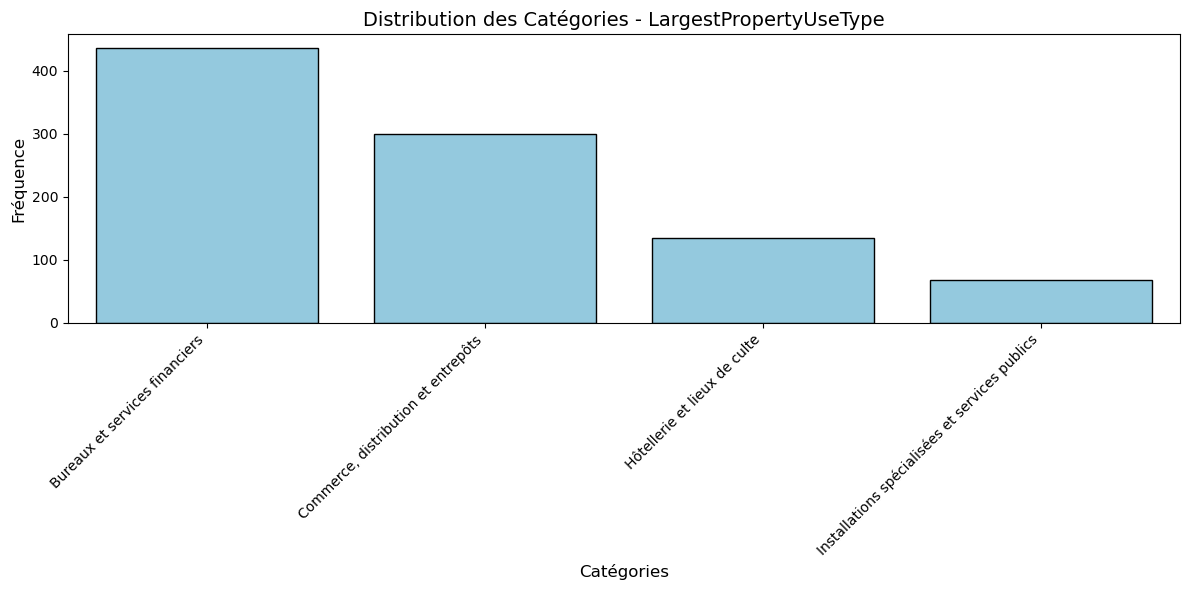

In [127]:
plt.figure(figsize=(12, 6))

# Calcul de la distribution des catégories
distribution_categories = X['LargestPropertyUseType'].value_counts()

# Création du barplot
sns.barplot(
    x=distribution_categories.index,
    y=distribution_categories.values,
    color='skyblue',
    edgecolor='black'
)

# Ajout des labels et du titre
plt.title('Distribution des Catégories - LargestPropertyUseType', fontsize=14)
plt.xlabel('Catégories', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)

# Rotation des labels pour améliorer la lisibilité
plt.xticks(rotation=45, ha='right')

# Affichage
plt.tight_layout()
plt.show()

## Analyse de CouncilDistrictCode

In [128]:
X['CouncilDistrictCode'].value_counts()

CouncilDistrictCode
7    331
2    218
3    101
4     96
5     71
6     62
1     60
Name: count, dtype: int64

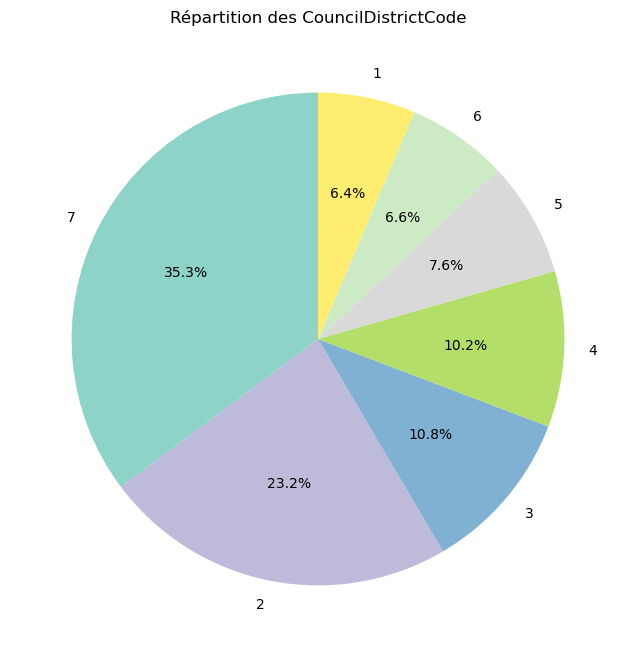

In [129]:
# Générer un diagramme circulaire (pie chart) des valeurs de CouncilDistrictCode
plt.figure(figsize=(8, 8))
X['CouncilDistrictCode'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')

# Ajouter un titre
plt.title('Répartition des CouncilDistrictCode')

# Afficher le graphique
plt.ylabel('')  # Supprimer le label des y-axis
plt.show()

## Analyse de age_propriete

In [130]:
X['age_propriete'].describe()

count    939.000000
mean      62.240682
std       31.697255
min       10.000000
25%       37.000000
50%       58.000000
75%       88.000000
max      125.000000
Name: age_propriete, dtype: float64

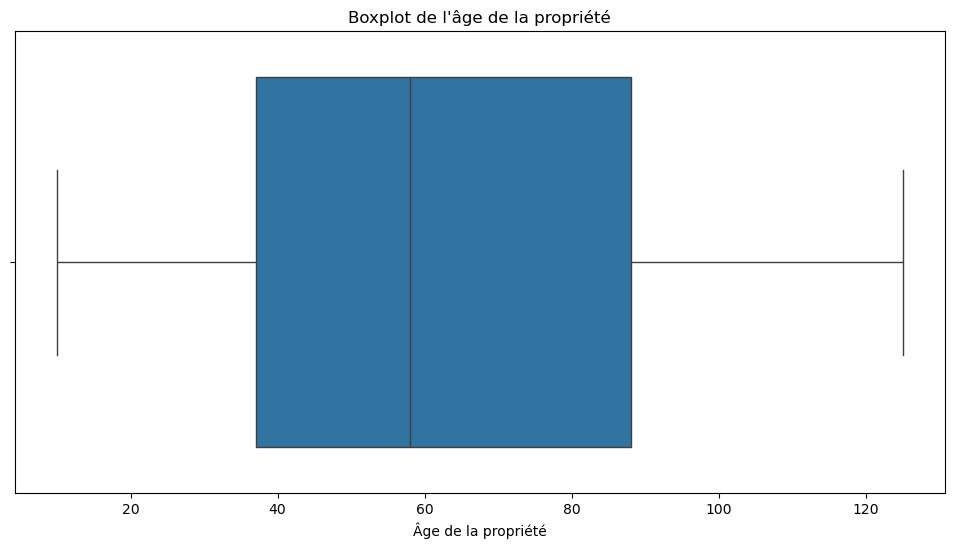

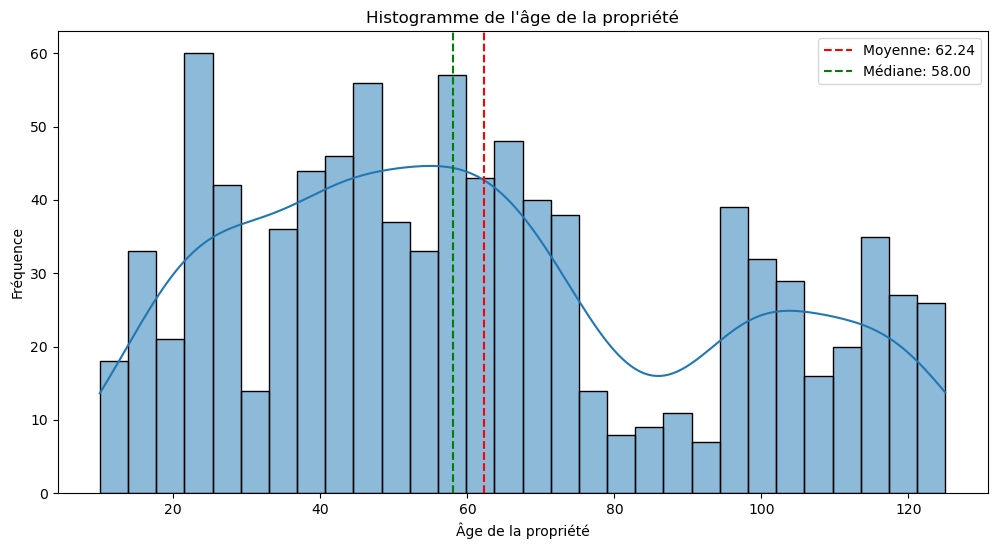

La variable age_propriete ne suit pas une loi normale (p-value=2.9924887685932935e-35)


In [131]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=X['age_propriete'])
plt.title('Boxplot de l\'âge de la propriété')
plt.xlabel('Âge de la propriété')
plt.show()

# Histogramme
plt.figure(figsize=(12, 6))
sns.histplot(X['age_propriete'], kde=True, bins=30)

# Calcul de la moyenne et de la médiane
mean_age = X['age_propriete'].mean()
median_age = X['age_propriete'].median()

# Ajout des lignes pour la moyenne (rouge) et la médiane (verte)
plt.axvline(mean_age, color='red', linestyle='--', label=f'Moyenne: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='--', label=f'Médiane: {median_age:.2f}')

# Titres et étiquettes
plt.title('Histogramme de l\'âge de la propriété')
plt.xlabel('Âge de la propriété')
plt.ylabel('Fréquence')

# Ajouter la légende
plt.legend()

# Affichage
plt.show()

statistic, p_value = stats.normaltest(X['age_propriete'])
if p_value < 0.05:
    print(f"La variable age_propriete ne suit pas une loi normale (p-value={p_value})")
else:
    print(f"La variable age_propriete suit une loi normale (p-value={p_value})")

Le test de normalité de D'Agostino et Pearson a été effectué sur la variable age_propriete. La p-value obtenue est très inférieure à 0.05, ce qui indique que la variable ne suit pas une loi normale.

Le test de normalité de D'Agostino et Pearson a été choisi ici car il est particulièrement adapté pour vérifier si une variable suit une distribution normale, en évaluant la symétrie (asymétrie) et l'aplatissement (kurtose) de la distribution. Ce test est utile lorsque la distribution des données peut être non normale, avec des valeurs extrêmes ou des courbes non symétriques.

D'autres tests comme le test de Shapiro-Wilk ou le test de Kolmogorov-Smirnov sont également utilisés pour tester la normalité, mais le test de D'Agostino et Pearson est souvent préféré pour des échantillons de taille modérée à grande et pour des données présentant des caractéristiques de non-normalité. Dans ce cas, il est donc approprié pour évaluer si age_propriete suit une loi normale.

## Analyse de NumberofBuilding(s)

In [132]:
X['NumberofBuildings'].describe()

count    939.000000
mean       1.048988
std        0.503449
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        9.000000
Name: NumberofBuildings, dtype: float64

In [133]:
# Création du tableau de fréquence pour 'NumberofBuildings'
frequencies = X['NumberofBuildings'].value_counts().sort_index()

# Affichage du tableau de fréquence
print(frequencies)

NumberofBuildings
1    927
2      3
3      1
4      2
5      1
6      2
7      1
8      1
9      1
Name: count, dtype: int64


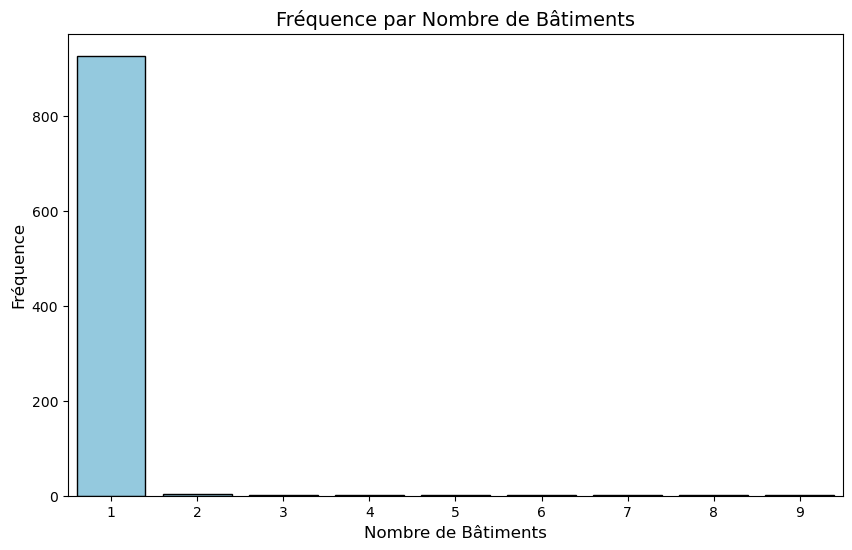

La variable 'NumberofBuildings' ne suit pas une loi normale (p-value=0.0)


In [134]:
# Création du barplot pour la fréquence de 'NumberofBuildings'
plt.figure(figsize=(10, 6))
sns.barplot(x=frequencies.index, y=frequencies.values, color='skyblue', edgecolor='black')

# Ajout des labels et titre
plt.title('Fréquence par Nombre de Bâtiments', fontsize=14)
plt.xlabel('Nombre de Bâtiments', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)

# Affichage du graphique
plt.show()

statistic, p_value = stats.normaltest(X['NumberofBuildings'])
if p_value < 0.05:
    print(f"La variable 'NumberofBuildings' ne suit pas une loi normale (p-value={p_value})")
else:
    print(f"La variable 'NumberofBuildings' suit une loi normale (p-value={p_value})")

L'analyse univariée de la variable NumberofBuildings, représentant le nombre de bâtiments associés à chaque propriété, a révélé une distribution extrêmement déséquilibrée. Environ 99 % des enregistrements concernent des propriétés composées d'un seul bâtiment, tandis que les autres valeurs sont très rares. Cette concentration massive autour de la valeur 1 limite la capacité de cette variable à fournir des informations pertinentes pour la modélisation.

De plus, la faible variabilité de cette variable et la rareté des cas avec plusieurs bâtiments réduisent son impact potentiel sur la performance du modèle. Par conséquent, la variable NumberofBuildings ne sera pas conservée dans l'analyse, car elle n'apporte pas de valeur ajoutée significative à la compréhension ou à la prédiction des émissions de CO₂.

## Analyse de NumberofFloors

In [135]:
X.loc[:, 'NumberofFloors'] = X['NumberofFloors'].astype(int)

In [136]:
X['NumberofFloors'].describe()

count    939.000000
mean       5.022364
std        7.543232
min        1.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       76.000000
Name: NumberofFloors, dtype: float64

In [137]:
# Création du tableau de fréquence pour 'NumberofFloors'
frequencies = X['NumberofFloors'].value_counts().sort_index()

# Affichage du tableau de fréquence
print(frequencies)

NumberofFloors
1     248
2     188
3     136
4      91
5      72
6      47
7      26
8      14
9       6
10     16
11     14
12      8
13      4
14      7
15      5
16      2
17      4
18      3
19      3
20      3
21      3
22      3
23      3
24      3
25      3
27      1
28      1
29      3
30      1
31      1
33      3
34      2
36      2
37      1
41      2
42      3
46      1
47      1
49      1
55      1
56      1
63      1
76      1
Name: count, dtype: int64


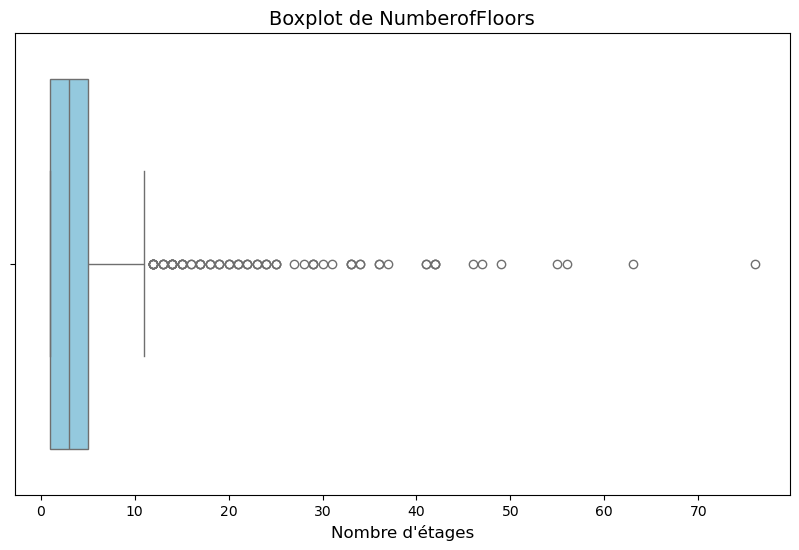

In [138]:
# Création du boxplot horizontal
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='NumberofFloors', color='skyblue')
plt.title('Boxplot de NumberofFloors', fontsize=14)
plt.xlabel('Nombre d\'étages', fontsize=12)

# Affichage du graphique
plt.show()

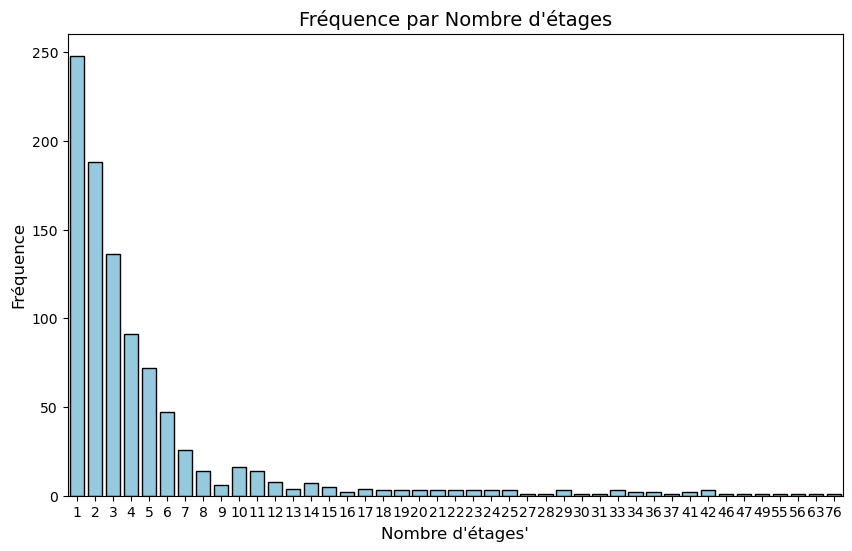

La variable 'NumberofFloors' ne suit pas une loi normale (p-value=3.4452688282584356e-186)


In [139]:
# Création du barplot pour la fréquence de 'NumberofBuildings'
plt.figure(figsize=(10, 6))
sns.barplot(x=frequencies.index, y=frequencies.values, color='skyblue', edgecolor='black')

# Ajout des labels et titre
plt.title("Fréquence par Nombre d'étages", fontsize=14)
plt.xlabel("Nombre d'étages'", fontsize=12)
plt.ylabel('Fréquence', fontsize=12)

# Affichage du graphique
plt.show()

statistic, p_value = stats.normaltest(X['NumberofFloors'])
if p_value < 0.05:
    print(f"La variable 'NumberofFloors' ne suit pas une loi normale (p-value={p_value})")
else:
    print(f"La variable 'NumberofFloors' suit une loi normale (p-value={p_value})")

La distribution de la variable NumberofFloors montre une prépondérance de bâtiments de petite taille en termes d'étages. Cette variable présente une forte concentration de valeurs faibles, mais il y a quelques valeurs extrêmes qui pourraient influencer la modélisation. Il serait pertinent d'envisager une transformation, par exemple en regroupant les valeurs élevées dans une seule catégorie ("plus de 10 étages"), afin de réduire l'impact des valeurs extrêmes sur le modèle et de rendre la variable plus facile à interpréter.

In [140]:
# Appliquer qcut et examiner la distribution des classes
quartiles = pd.qcut(X['NumberofFloors'], 3, duplicates='drop')
print(quartiles.value_counts())

NumberofFloors
(0.999, 2.0]    436
(4.0, 76.0]     276
(2.0, 4.0]      227
Name: count, dtype: int64


In [141]:
# Appliquer qcut et examiner la distribution des classes
quantiles = pd.qcut(X['NumberofFloors'], 5, duplicates='drop')
print(quantiles.value_counts())

NumberofFloors
(0.999, 2.0]    436
(3.0, 6.0]      210
(6.0, 76.0]     157
(2.0, 3.0]      136
Name: count, dtype: int64


In [142]:
# Exemple avec ta colonne NumberofFloors
X_Floor = X[['NumberofFloors']].copy()

# Initialiser le discretizer avec 3 bins et la stratégie 'quantile'
kbins_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Ajuster (fit) et transformer les données
X_Floor['NumberofFloors_binned'] = kbins_discretizer.fit_transform(X_Floor[['NumberofFloors']])

# Vérifier la répartition des classes
print(X_Floor['NumberofFloors_binned'].value_counts().sort_index())

NumberofFloors_binned
0.0    248
1.0    324
2.0    367
Name: count, dtype: int64


In [143]:
# Afficher les bornes des intervalles créés par le discretizer
print(kbins_discretizer.bin_edges_)

[array([ 1.,  2.,  4., 76.])]


## Analyse de PropertyGFABuilding(s)

In [144]:
X['PropertyGFABuilding(s)'].describe()

count    9.390000e+02
mean     1.116337e+05
std      1.833187e+05
min      1.620000e+04
25%      3.005450e+04
50%      5.001700e+04
75%      1.064050e+05
max      1.765970e+06
Name: PropertyGFABuilding(s), dtype: float64

In [145]:
bins_gfa_quantiles = np.quantile(X['PropertyGFABuilding(s)'], [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0])
bins_gfa_quantiles

array([  16200. ,   23180.6,   33559.2,   50017. ,   90715. ,  263003.6,
       1765970. ])

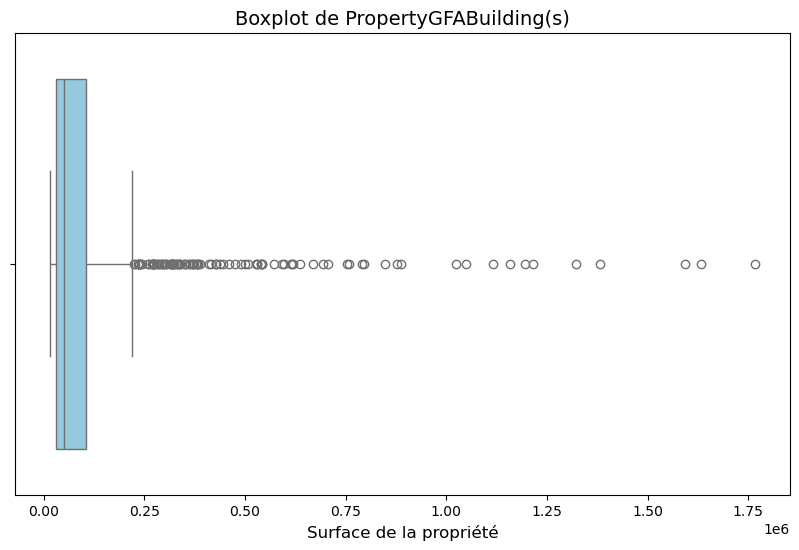

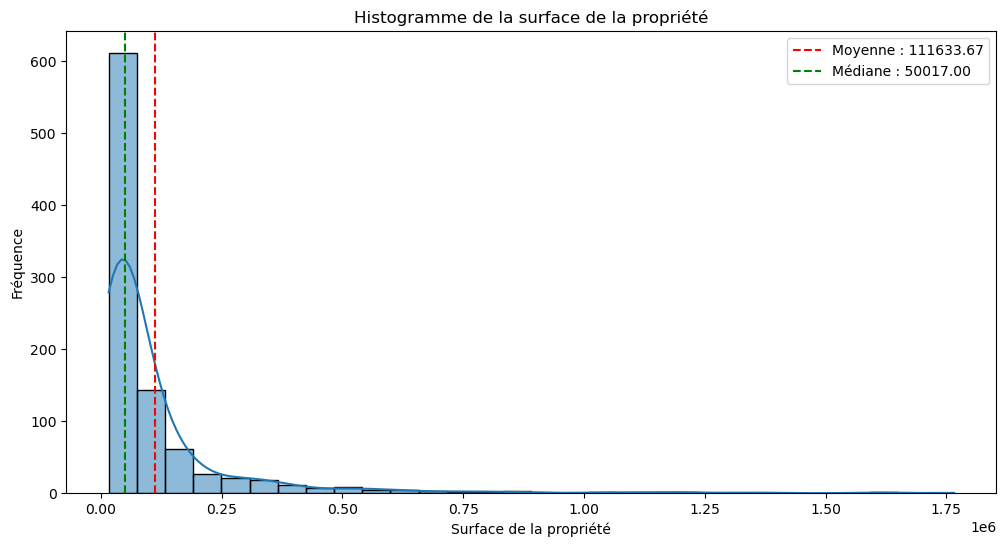

La variable 'PropertyGFABuilding(s)' ne suit pas une loi normale (p-value=3.368443288908355e-199)


In [146]:
# Création du boxplot horizontal
plt.figure(figsize=(10, 6))
sns.boxplot(data=X, x='PropertyGFABuilding(s)', color='skyblue')

# Ajout des labels et d'un titre
plt.title('Boxplot de PropertyGFABuilding(s)', fontsize=14)
plt.xlabel('Surface de la propriété', fontsize=12)
plt.show()

# Histogramme
plt.figure(figsize=(12, 6))
sns.histplot(X['PropertyGFABuilding(s)'], kde=True, bins=30)

# Ajouter la moyenne (en rouge)
mean_value = X['PropertyGFABuilding(s)'].mean()
plt.axvline(mean_value, color='red', linestyle='--', label=f'Moyenne : {mean_value:.2f}')

# Ajouter la médiane (en vert)
median_value = X['PropertyGFABuilding(s)'].median()
plt.axvline(median_value, color='green', linestyle='--', label=f'Médiane : {median_value:.2f}')

# Ajouter des titres et des légendes
plt.title('Histogramme de la surface de la propriété')
plt.xlabel('Surface de la propriété')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

statistic, p_value = stats.normaltest(X['PropertyGFABuilding(s)'])
if p_value < 0.05:
    print(f"La variable 'PropertyGFABuilding(s)' ne suit pas une loi normale (p-value={p_value})")
else:
    print(f"La variable 'PropertyGFABuilding(s)' suit une loi normale (p-value={p_value})")

En résumé, cette variable montre une grande variabilité dans la superficie des bâtiments, avec une moyenne relativement élevée, mais un écart-type très important, ce qui suggère la présence de bâtiments très petits, mais aussi de très grands bâtiments. Ces grandes différences pourraient indiquer qu'une transformation pourrait être utile, mais puisque la valeur maximale a été vérifiée et semble cohérente, il peut être préférable de garder cette variable telle quelle.

## Analyse de LargestPropertyUseTypeGFA

In [147]:
X['LargestPropertyUseTypeGFA'].describe()

count    9.390000e+02
mean     1.058468e+05
std      1.735509e+05
min      8.061000e+03
25%      2.756350e+04
50%      4.800100e+04
75%      1.037320e+05
max      1.680937e+06
Name: LargestPropertyUseTypeGFA, dtype: float64

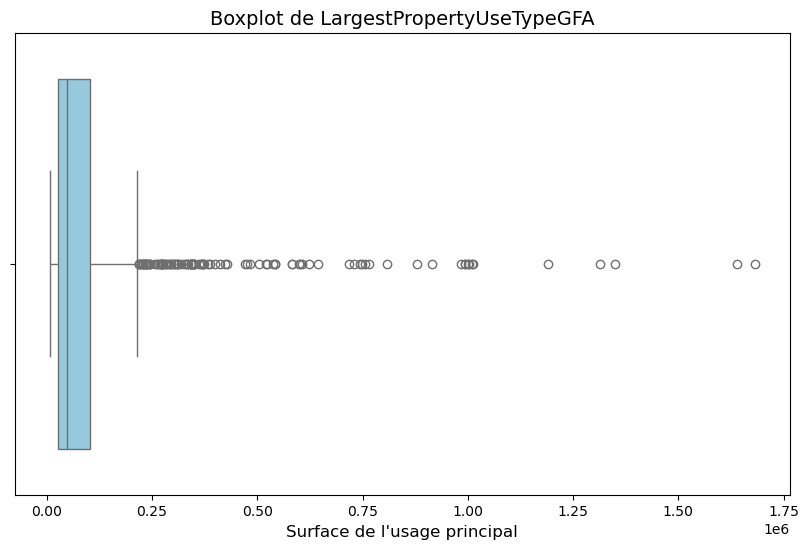

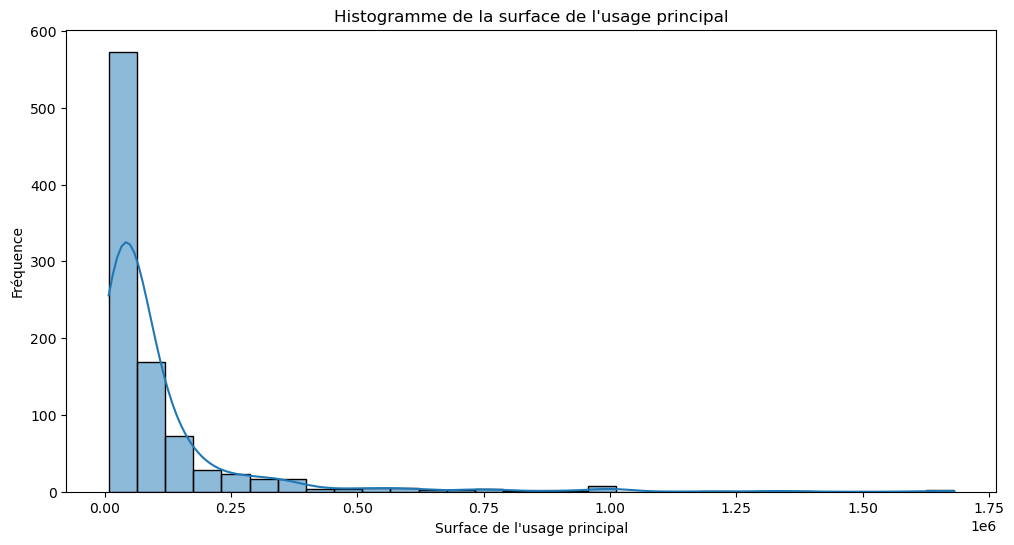

La variable 'LargestPropertyUseTypeGFA' ne suit pas une loi normale (p-value=1.0822147723440584e-196)


In [148]:
# Création du boxplot horizontal
plt.figure(figsize=(10, 6))
sns.boxplot(data=X, x='LargestPropertyUseTypeGFA', color='skyblue')

# Ajout des labels et d'un titre
plt.title('Boxplot de LargestPropertyUseTypeGFA', fontsize=14)
plt.xlabel("Surface de l'usage principal", fontsize=12)

# Affichage du graphique
plt.show()

# Histogramme
plt.figure(figsize=(12, 6))
sns.histplot(X['LargestPropertyUseTypeGFA'], kde=True, bins=30)
plt.title("Histogramme de la surface de l'usage principal")
plt.xlabel("Surface de l'usage principal")
plt.ylabel('Fréquence')
plt.show()

statistic, p_value = stats.normaltest(X['LargestPropertyUseTypeGFA'])
if p_value < 0.05:
    print(f"La variable 'LargestPropertyUseTypeGFA' ne suit pas une loi normale (p-value={p_value})")
else:
    print(f"La variable 'LargestPropertyUseTypeGFA' suit une loi normale (p-value={p_value})")

Cette variable montre une grande variabilité dans la superficie de l'usage principal des bâtiments, avec des valeurs allant de petites superficies à des valeurs extrêmement grandes. Les valeurs extrêmes ont été vérifiées et sont cohérentes, ce qui laisse entendre que les grands bâtiments sont pertinents pour l'analyse. Si nécessaire, des transformations ou regroupements pourraient être envisagés pour mieux gérer cette grande dispersion.

## Analyse d'ENERGYSTARScore

In [149]:
X['ENERGYSTARScore'].describe()

count    939.000000
mean      63.785942
std       28.568885
min        1.000000
25%       44.000000
50%       71.000000
75%       88.000000
max      100.000000
Name: ENERGYSTARScore, dtype: float64

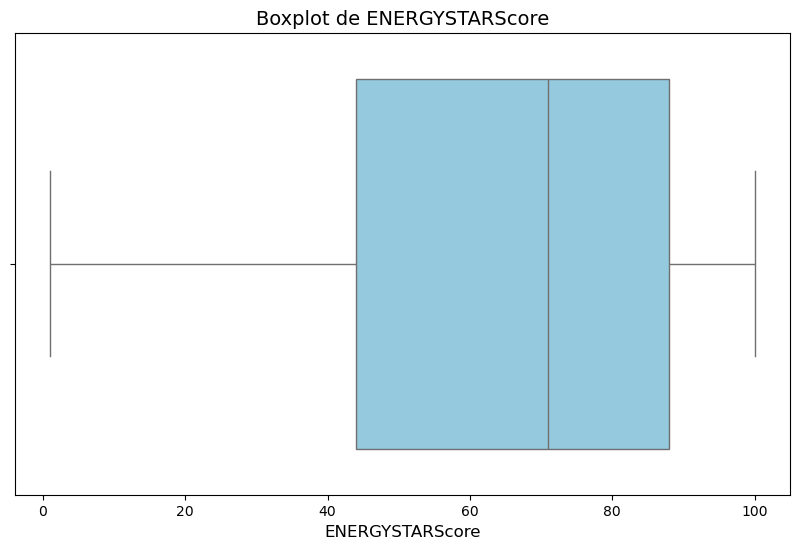

In [150]:
# Boxplot pour 'ENERGYSTARScore'
plt.figure(figsize=(10, 6))
sns.boxplot(data=X, x='ENERGYSTARScore', color='skyblue')
plt.title('Boxplot de ENERGYSTARScore', fontsize=14)
plt.xlabel('ENERGYSTARScore', fontsize=12)
plt.show()

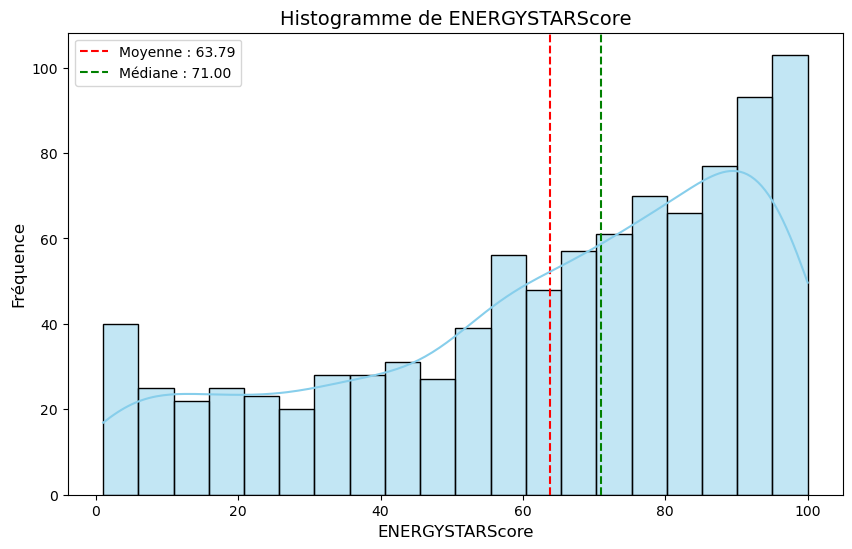

La variable 'ENERGYSTARScore' ne suit pas une loi normale (p-value=4.823126978828641e-22)


In [151]:
# Histogramme pour 'ENERGYSTARScore'
plt.figure(figsize=(10, 6))

# Ajouter la moyenne (en rouge)
mean_value = X['ENERGYSTARScore'].mean()
plt.axvline(mean_value, color='red', linestyle='--', label=f'Moyenne : {mean_value:.2f}')

# Ajouter la médiane (en vert)
median_value = X['ENERGYSTARScore'].median()
plt.axvline(median_value, color='green', linestyle='--', label=f'Médiane : {median_value:.2f}')


sns.histplot(X['ENERGYSTARScore'], kde=True, bins=20, color='skyblue')
plt.title('Histogramme de ENERGYSTARScore', fontsize=14)
plt.xlabel('ENERGYSTARScore', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.legend()
plt.show()

statistic, p_value = stats.normaltest(X['ENERGYSTARScore'])
if p_value < 0.05:
    print(f"La variable 'ENERGYSTARScore' ne suit pas une loi normale (p-value={p_value})")
else:
    print(f"La variable 'ENERGYSTARScore' suit une loi normale (p-value={p_value})")

La distribution est étalée avec des scores variant de très bas à excellent, indiquant des disparités importantes en matière de performance énergétique entre les bâtiments.
La médiane de 71 indique que 50 % des bâtiments ont un score énergétique supérieur ou égal à 71. Cela suggère qu'une majorité des bâtiments du jeu de données possède une performance énergétique plutôt satisfaisante, dépassant la moyenne de 63.86.

## Analyse de Proportion_Electricité

In [152]:
X.columns

Index(['LargestPropertyUseType', 'CouncilDistrictCode', 'age_propriete',
       'Proportion_Electricité', 'Proportion_Gaz', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore'],
      dtype='object')

In [153]:
X['Proportion_Electricité'].describe()

count    939.000000
mean       0.728860
std        0.263847
min        0.000000
25%        0.520000
50%        0.770000
75%        1.000000
max        1.000000
Name: Proportion_Electricité, dtype: float64

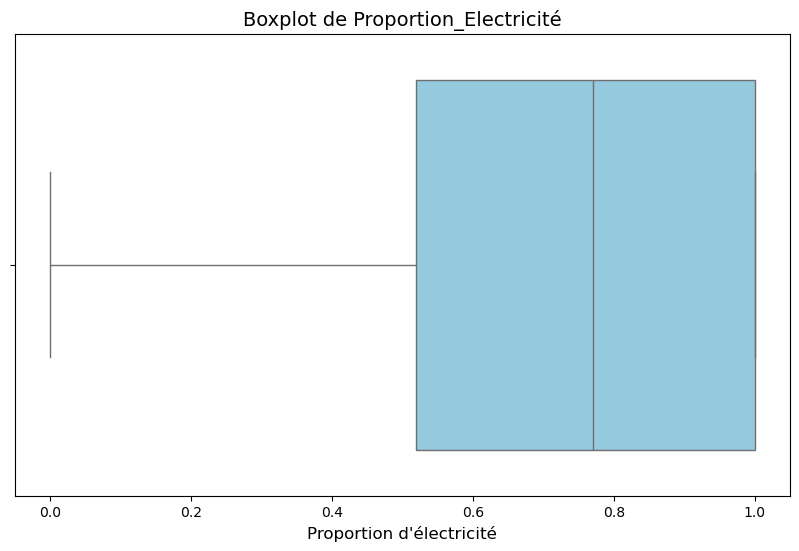

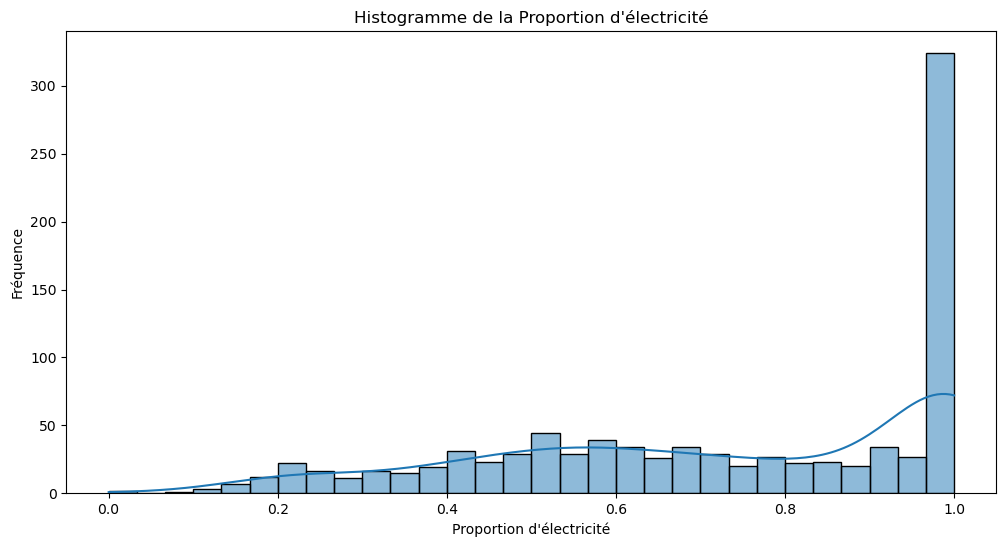

La variable 'Proportion_Electricité' ne suit pas une loi normale (p-value=4.772793689493687e-41)


In [154]:
# Création du boxplot horizontal pour Proportion_Electricité
plt.figure(figsize=(10, 6))
sns.boxplot(data=X, x='Proportion_Electricité', color='skyblue')

# Ajout des labels et d'un titre
plt.title('Boxplot de Proportion_Electricité', fontsize=14)
plt.xlabel('Proportion d\'électricité', fontsize=12)

# Affichage du graphique
plt.show()

# Histogramme pour Proportion_Electricité
plt.figure(figsize=(12, 6))
sns.histplot(X['Proportion_Electricité'], kde=True, bins=30)
plt.title('Histogramme de la Proportion d\'électricité')
plt.xlabel('Proportion d\'électricité')
plt.ylabel('Fréquence')
plt.show()

# Test de normalité pour Proportion_Electricité
statistic, p_value = stats.normaltest(X['Proportion_Electricité'])
if p_value < 0.05:
    print(f"La variable 'Proportion_Electricité' ne suit pas une loi normale (p-value={p_value})")
else:
    print(f"La variable 'Proportion_Electricité' suit une loi normale (p-value={p_value})")

La majorité des bâtiments semble utiliser principalement ou exclusivement de l'électricité, avec de nombreux cas où la proportion atteint 1.0 (100 %). Cependant, on observe aussi une proportion significative de bâtiments (25 %) avec moins de 52 % d'électricité, et quelques-uns n'ont aucune consommation d'électricité (proportion égale à 0).

## Analyse de Proportion_Gaz

In [155]:
X['Proportion_Gaz'].describe()

count    939.000000
mean       0.247923
std        0.262963
min        0.000000
25%        0.000000
50%        0.160000
75%        0.450000
max        1.000000
Name: Proportion_Gaz, dtype: float64

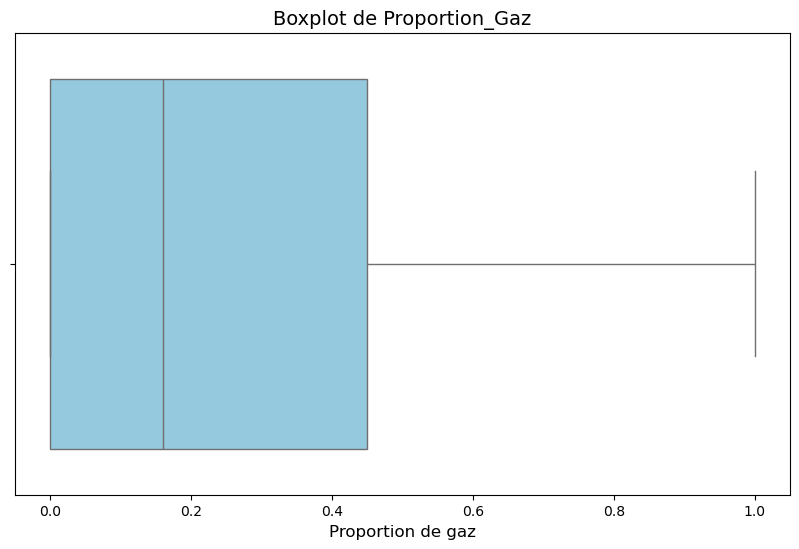

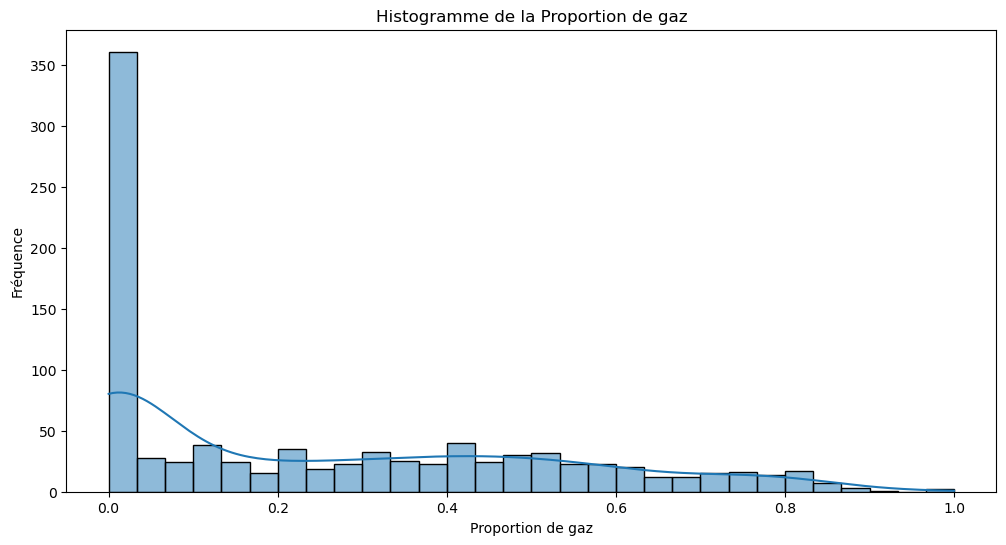

La variable 'Proportion_Gaz' ne suit pas une loi normale (p-value=7.618296661637332e-28)


In [156]:
# Création du boxplot horizontal pour Proportion_Electricité
plt.figure(figsize=(10, 6))
sns.boxplot(data=X, x='Proportion_Gaz', color='skyblue')

# Ajout des labels et d'un titre
plt.title('Boxplot de Proportion_Gaz', fontsize=14)
plt.xlabel('Proportion de gaz', fontsize=12)

# Affichage du graphique
plt.show()

# Histogramme pour Proportion_Electricité
plt.figure(figsize=(12, 6))
sns.histplot(X['Proportion_Gaz'], kde=True, bins=30)
plt.title('Histogramme de la Proportion de gaz')
plt.xlabel('Proportion de gaz')
plt.ylabel('Fréquence')
plt.show()

# Test de normalité pour Proportion_Electricité
statistic, p_value = stats.normaltest(X['Proportion_Gaz'])
if p_value < 0.05:
    print(f"La variable 'Proportion_Gaz' ne suit pas une loi normale (p-value={p_value})")
else:
    print(f"La variable 'Proportion_Gaz' suit une loi normale (p-value={p_value})")


La distribution de Proportion_Gaz montre que la majorité des bâtiments consomment soit très peu, soit pas du tout de gaz. Il y a quelques bâtiments consommant exclusivement du gaz (valeur de 1), mais cela reste minoritaire. La distribution est asymétrique et biaisée à gauche (vers 0), ce qui explique pourquoi la variable ne suit pas une loi normale.

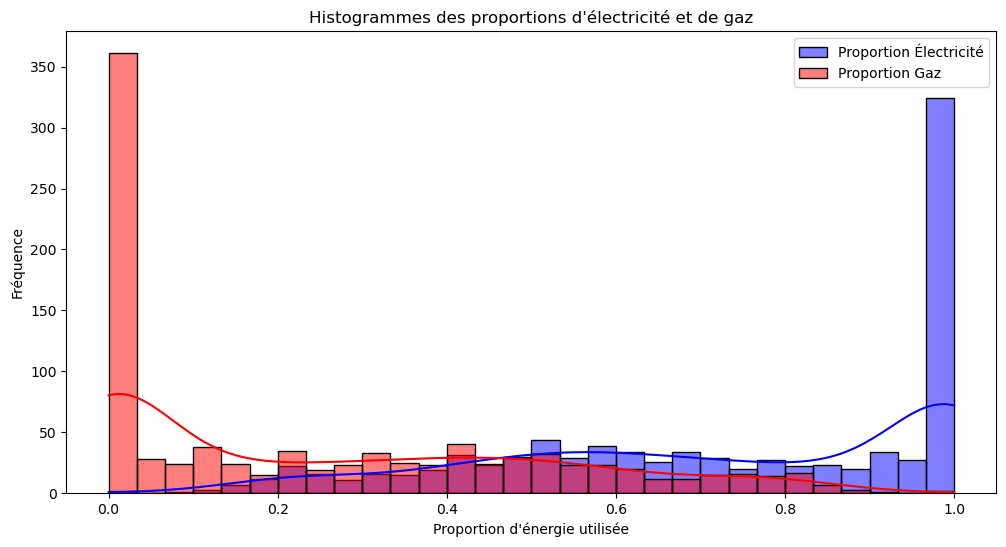

In [157]:
plt.figure(figsize=(12, 6))

# Histogramme pour Proportion Électricité
sns.histplot(X['Proportion_Electricité'], kde=True, bins=30, color='blue', label='Proportion Électricité', alpha=0.5)

# Histogramme pour Proportion Gaz
sns.histplot(X['Proportion_Gaz'], kde=True, bins=30, color='red', label='Proportion Gaz', alpha=0.5)

plt.title('Histogrammes des proportions d\'électricité et de gaz')
plt.xlabel('Proportion d\'énergie utilisée')
plt.ylabel('Fréquence')
plt.legend()
plt.show()


## Analyse de TotalGHGEmissions (cible 1)

In [158]:
y = df_cleaned['TotalGHGEmissions']  # Variable cible

In [159]:
y.isnull().sum()

0

In [160]:
y.describe()

count      939.000000
mean       175.839606
std        697.198251
min          0.810000
25%         19.985000
50%         48.130000
75%        133.650000
max      12307.160000
Name: TotalGHGEmissions, dtype: float64

In [161]:
# Création des bins pour stratification
y_bins = pd.qcut(y, q=150, labels=False) 
print(pd.Series(y_bins).value_counts())

TotalGHGEmissions
149    7
3      7
71     7
118    7
7      7
      ..
32     6
50     6
124    6
22     6
26     5
Name: count, Length: 150, dtype: int64


In [162]:
q90 = y.quantile(0.90)
q90

314.2560000000002

In [163]:
# Nombre d'observations supérieures au Q90
count_above_q90 = (y > q90).sum()
print(f"Nombre d'observations supérieures au Q90 : {count_above_q90}")

Nombre d'observations supérieures au Q90 : 94


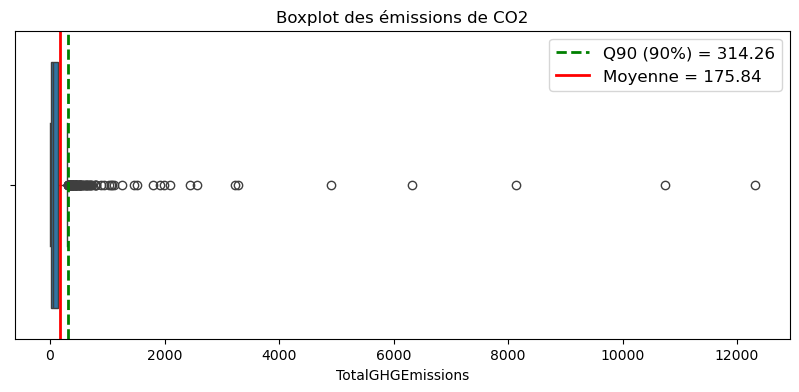

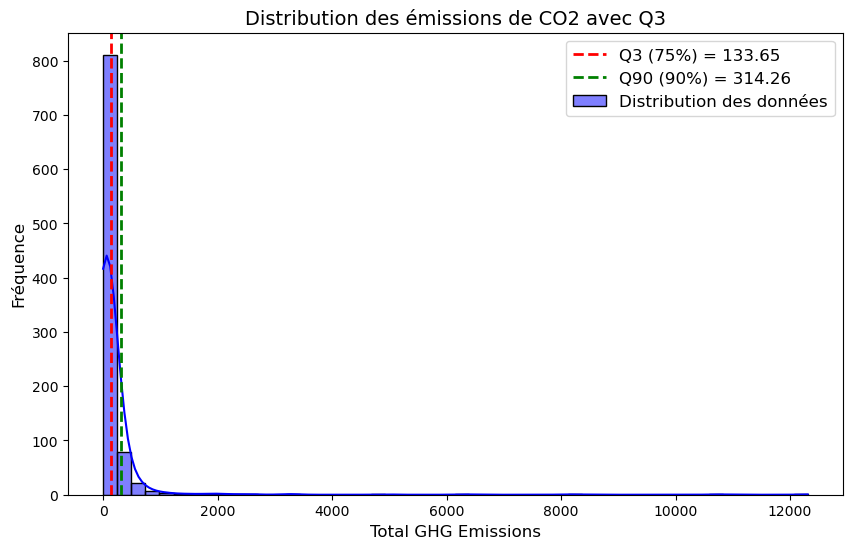

La variable TotalGHGEmissions ne suit pas une loi normale (p-value=0.0)


In [164]:
# Calcul de Q95
Q3 = y.quantile(0.75)
Q90 = y.quantile(0.90)
# Calcul de la moyenne
mean_value = y.mean()

plt.figure(figsize=(10, 4))
sns.boxplot(x=y)
plt.axvline(Q90, color='green', linestyle='--', linewidth=2, label=f'Q90 (90%) = {Q90:.2f}')
plt.axvline(mean_value, color='red', linestyle='-', linewidth=2, label=f'Moyenne = {mean_value:.2f}')
plt.title('Boxplot des émissions de CO2')
plt.legend(fontsize=12)
plt.show()

# Histogramme avec la ligne pour Q3 et Q90
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=50, kde=True, color='blue', label='Distribution des données')

# Ajouter une ligne verticale pour Q3
plt.axvline(Q3, color='red', linestyle='--', linewidth=2, label=f'Q3 (75%) = {Q3:.2f}')
plt.axvline(Q90, color='green', linestyle='--', linewidth=2, label=f'Q90 (90%) = {Q90:.2f}')

# Ajouter le titre et les légendes
plt.title('Distribution des émissions de CO2 avec Q3', fontsize=14)
plt.xlabel('Total GHG Emissions', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.legend(fontsize=12)
plt.show()

statistic, p_value = stats.normaltest(y)
if p_value < 0.05:
    print(f"La variable TotalGHGEmissions ne suit pas une loi normale (p-value={p_value})")
else:
    print(f"La variable TotalGHGEmissions suit une loi normale (p-value={p_value})")

Distribution non normale<br>
Le test de normalité (p-value = 0,0) confirme que cette variable ne suit pas une loi normale. L'asymétrie et les valeurs extrêmes (outliers) contribuent à cette déviation.<br>

Implications pour l'analyse
Modélisation : Envisager des transformations (par exemple, logarithmique) pour réduire l'impact des outliers et l'asymétrie. 

En conclusion, la variable TotalGHGEmissions présente une distribution très dispersée et asymétrique. Sa non-normalité devra être prise en compte dans les étapes suivantes, notamment pour les tests statistiques et la modélisation prédictive.

## Analyse de SiteEnergyUse(kBtu) (cible 2)

In [165]:
y2 = df_cleaned['SiteEnergyUse(kBtu)']  # Variable cible

In [166]:
y2.isnull().sum()

0

In [167]:
# Création des bins pour stratification
y_bins = pd.qcut(y2, q=150, labels=False) 
print(pd.Series(y_bins).value_counts())

SiteEnergyUse(kBtu)
86     7
82     7
138    7
7      7
114    7
      ..
81     6
42     6
9      6
68     6
5      6
Name: count, Length: 150, dtype: int64


In [168]:
y2.describe()

count    9.390000e+02
mean     8.397321e+06
std      2.225046e+07
min      7.971180e+04
25%      1.249124e+06
50%      2.755829e+06
75%      7.553764e+06
max      2.930908e+08
Name: SiteEnergyUse(kBtu), dtype: float64

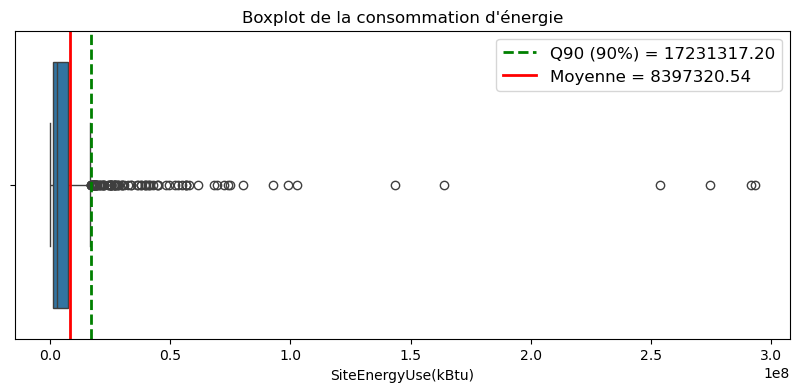

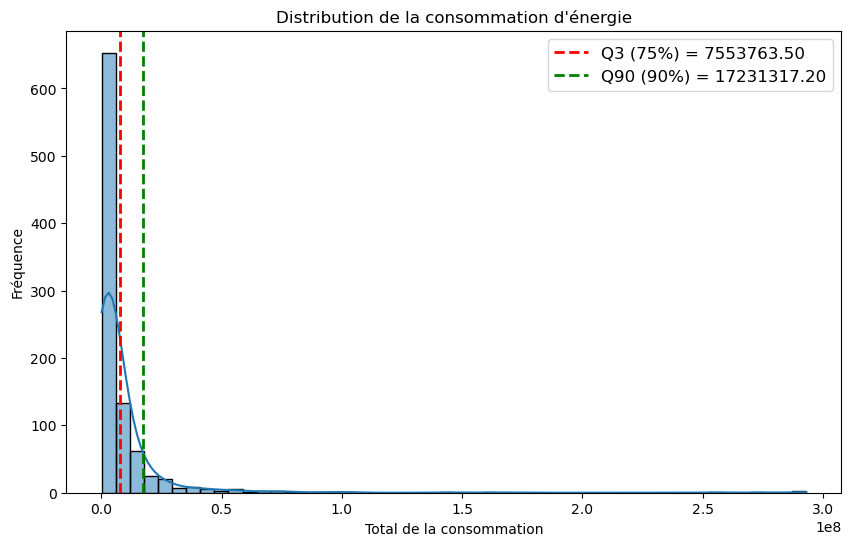

La variable SiteEnergyUse(kBtu) ne suit pas une loi normale (p-value=3.3224413254339627e-307)


In [169]:
# Calcul de Q3
Q3 = y2.quantile(0.75)
Q90 = y2.quantile(0.90)
# Calcul de la moyenne
mean_value = y2.mean()

plt.figure(figsize=(10, 4))
sns.boxplot(x=y2)
plt.axvline(Q90, color='green', linestyle='--', linewidth=2, label=f'Q90 (90%) = {Q90:.2f}')
plt.axvline(mean_value, color='red', linestyle='-', linewidth=2, label=f'Moyenne = {mean_value:.2f}')
plt.title('Boxplot de la consommation d\'énergie')
plt.legend(fontsize=12)
plt.show()

# Histogramme 
plt.figure(figsize=(10, 6))
sns.histplot(y2, bins=50, kde=True)
# Ajouter une ligne verticale pour Q3
plt.axvline(Q3, color='red', linestyle='--', linewidth=2, label=f'Q3 (75%) = {Q3:.2f}')
plt.axvline(Q90, color='green', linestyle='--', linewidth=2, label=f'Q90 (90%) = {Q90:.2f}')
plt.title('Distribution de la consommation d\'énergie')
plt.xlabel('Total de la consommation')
plt.ylabel('Fréquence')
plt.legend(fontsize=12)
plt.show()

statistic, p_value = stats.normaltest(y2)
if p_value < 0.05:
    print(f"La variable SiteEnergyUse(kBtu) ne suit pas une loi normale (p-value={p_value})")
else:
    print(f"La variable SiteEnergyUse(kBtu) suit une loi normale (p-value={p_value})")

Non-normalité : Le test de normalité (p-value = 0.0) confirme que cette variable ne suit pas une loi normale.<br>

Interprétation :<br>
La consommation énergétique varie énormément d'un bâtiment à l'autre. Les valeurs extrêmes, comme le maximum, suggèrent que certains bâtiments consomment bien plus d'énergie que la majorité.<br>
Étant donné la non-normalité, il pourrait être pertinent de d'appliquer une transformation (comme une transformation logarithmique) pour réduire l'effet des valeurs extrêmes et rendre la distribution plus symétrique.

# Analyse bivariée

## Analyse bivariée des variables qualitatives entre elles

### Tableau de contingence

In [170]:
# Création du tableau de contingence
tableau_contingence = pd.crosstab(X['LargestPropertyUseType'], X['CouncilDistrictCode'])

# Affichage du tableau
print(tableau_contingence)

CouncilDistrictCode                              1    2   3   4   5   6    7
LargestPropertyUseType                                                      
Bureaux et services financiers                   9   66  50  42  26  20  223
Commerce, distribution et entrepôts             37  135  18  23  26  24   37
Hôtellerie et lieux de culte                     8   10  13  22   8  13   61
Installations spécialisées et services publics   6    7  20   9  11   5   10


### Visualisation

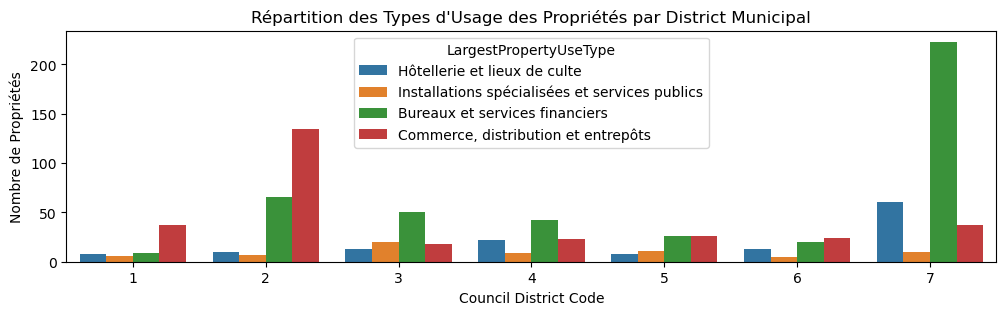

In [171]:
# Création du barplot empilé
plt.figure(figsize=(12,3))
sns.countplot(data=X, x='CouncilDistrictCode', hue='LargestPropertyUseType')
plt.title('Répartition des Types d\'Usage des Propriétés par District Municipal')
plt.xlabel('Council District Code')
plt.ylabel('Nombre de Propriétés')
plt.show()

**Bureaux et services financiers**<br>
Dominant dans le District 7 avec 223 propriétés, ce qui représente une concentration notable.<br>
Les autres districts sont bien moins représentés, le District 2 suit avec 66 propriétés.<br>
Cela suggère que le District 7 est probablement un centre financier majeur.<br>

**Commerce, distribution et entrepôts**<br>
Répartition plus équilibrée mais avec un pic dans le District 2 (135 propriétés).<br>
Le District 1 (37) et le District 7 (37) sont également bien représentés.<br>
Le District 2 pourrait être un hub logistique et commercial.<br>

**Hôtellerie et lieux de culte**<br>
Concentration modérée dans le District 7 (61) et le District 4 (22).<br>
Cela suggère que le District 7 attire touristes et activités culturelles.<br>

**Installations spécialisées et services publics**<br>
Distribution plus homogène, mais légèrement plus élevée dans le District 3 (20).<br>
Cela indique que les infrastructures publiques sont plus équilibrées entre les districts.<br>

Résumé global :<br>
Le District 7 domine largement dans les secteurs financiers et hôteliers, ce qui en fait probablement un centre économique et touristique.<br>
Le District 2 semble être un pôle commercial et logistique.<br>
Les infrastructures publiques sont relativement bien réparties, mais avec un léger avantage pour le District 3.<br>

Pour approfondir l'analyse, il serait intéressant d'examiner la relation entre les catégories d'usage des propriétés ("LargestPropertyUseType") et les districts du conseil ("CouncilDistrictCode"). Cela permettrait de vérifier si la répartition observée est significative ou simplement due au hasard.

### Test du Chi-deux

L'une des étapes importantes dans la construction d'un modèle de machine learning est de comprendre les relations entre les différentes variables utilisées. En particulier, lorsqu'il s'agit de variables catégorielles, il est essentiel de déterminer si certaines d'entre elles sont liées entre elles, ou si elles peuvent être considérées comme indépendantes. Une manière courante de tester cette dépendance est d'utiliser le test du Chi-deux.

Le test du Chi-deux permet d'analyser si deux variables catégorielles sont indépendantes ou s'il existe une association significative entre elles. Il compare les effectifs observés dans chaque catégorie du tableau de contingence avec les effectifs attendus sous l'hypothèse d'indépendance entre les variables. Une différence importante entre ces valeurs suggère une association entre les variables, tandis que des différences faibles indiquent que les variables sont indépendantes.

Dans le contexte de notre modèle de machine learning, cette analyse peut nous fournir des informations essentielles sur l'interaction entre les variables, nous permettant d'ajuster notre approche de sélection et de prétraitement des données. Par exemple, si nous découvrons qu'une variable, comme le type d'usage des propriétés (LargestPropertyUseType), est fortement liée à un autre facteur, comme le district (CouncilDistrictCode), cela pourrait influencer la manière dont nous traitons ces variables dans le modèle, en tenant compte de leur dépendance plutôt que de les traiter de manière isolée.


Ce test statistique permet de déterminer si une association existe entre deux variables catégoriques :<br>
H0 (hypothèse nulle) : Les deux variables sont indépendantes (pas de relation significative).<br>
H1 (hypothèse alternative) : Les deux variables sont associées (relation significative).

In [172]:
# Calcul du test du Chi-deux et récupération des valeurs attendues
chi2_stat, p_value, dof, valeurs_attendues = chi2_contingency(tableau_contingence)

# Affichage des résultats
print("Statistique du Chi-deux :", chi2_stat)
print("p-value :", p_value)
print("Degrés de liberté :", dof)
print("Tableau des fréquences attendues :\n", valeurs_attendues)

# Interprétation des résultats
alpha = 0.05  # Niveau de signification
if p_value < alpha:
    print("Rejet de H0 : Il existe une association significative entre les deux variables.")
else:
    print("Non-rejet de H0 : Aucune association significative entre les deux variables.")

Statistique du Chi-deux : 261.72842421510217
p-value : 3.3312768060100316e-45
Degrés de liberté : 18
Tableau des fréquences attendues :
 [[ 27.85942492 101.22257721  46.89669862  44.57507987  32.96698616
   28.78807242 153.69116081]
 [ 19.16932907  69.6485623   32.26837061  30.67092652  22.68370607
   19.80830671 105.75079872]
 [  8.62619808  31.34185304  14.52076677  13.80191693  10.20766773
    8.91373802  47.58785942]
 [  4.34504792  15.78700745   7.314164     6.95207668   5.14164004
    4.48988285  23.97018104]]
Rejet de H0 : Il existe une association significative entre les deux variables.


Statistique du Chi-deux : 261.73<br>
p-value : très proche de 0<br>
Degrés de liberté : 18<br>

Interprétation<br>
La p-value extrêmement faible (< 0.05) indique que l'on rejette l'hypothèse nulle (H₀) d'indépendance.<br>
Cela signifie qu'il existe une association significative entre les types d'utilisation des propriétés et les districts du conseil.<br>

Comparaison des Effectifs Observés et Attendus<br>
Les écarts marqués entre les valeurs observées et les valeurs attendues expliquent cette dépendance.<br>
Par exemple :<br>
Bureaux et services financiers dans le District 7 : 226 observés vs 155.87 attendus → surreprésentation.<br>
Commerce, distribution et entrepôts dans le District 2 : 136 observés vs 70.07 attendus → forte concentration.<br>
Installations spécialisées et services publics sont plus réparties mais restent légèrement concentrées dans certains districts.<br>

Conclusion générale<br>
Il existe une relation significative entre les districts et les types d'utilisation des propriétés. Certains secteurs sont donc spécialisés dans des activités spécifiques (ex. : finances dans le District 7, commerce dans le District 2), traduisant une organisation spatiale structurée de l’activité économique.

### Comparaison des Effectifs Observés et Attendus

Après avoir effectué le test du Chi-deux pour évaluer l'indépendance entre les variables, une étape supplémentaire intéressante consiste à analyser visuellement les différences entre les effectifs observés et les effectifs attendus pour chaque catégorie du tableau de contingence. Cette analyse permet de mieux comprendre où les écarts sont les plus significatifs, et peut fournir des insights sur les associations entre les variables qui n'étaient pas évidentes au premier abord.

Une façon efficace de visualiser ces différences est d'utiliser une heatmap (carte thermique). Cette représentation graphique utilise des couleurs pour indiquer l'ampleur des différences entre les valeurs observées et attendues, facilitant ainsi l'identification des cellules où les écarts sont les plus importants. Les zones colorées en rouge, par exemple, peuvent indiquer des associations fortes, tandis que les zones en bleu ou en vert montrent des différences faibles, suggérant une indépendance plus marquée.

Dans le cadre de notre analyse, une telle heatmap nous permet non seulement de valider les résultats du test du Chi-deux, mais aussi de guider nos décisions sur les interactions entre les variables. Si des différences importantes sont observées dans certaines combinaisons de catégories, cela pourrait justifier des ajustements dans le traitement de ces variables avant de les intégrer dans notre modèle de machine learning.

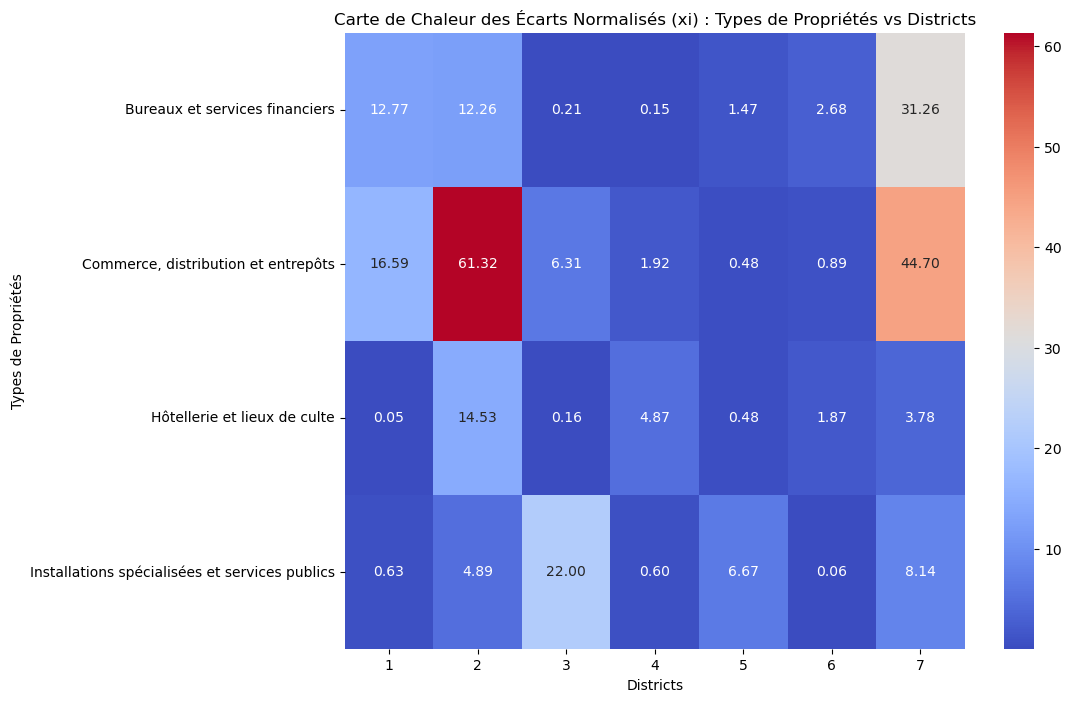

In [173]:
# Calcul des écarts normalisés (xi) : (O - E)² / E
ecarts_normalises = (tableau_contingence - valeurs_attendues) ** 2 / valeurs_attendues

# Visualisation des écarts normalisés avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(ecarts_normalises, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Carte de Chaleur des Écarts Normalisés (xi) : Types de Propriétés vs Districts")
plt.xlabel("Districts")
plt.ylabel("Types de Propriétés")
plt.show()

Plus la valeur absolue est élevée, plus l'écart est significatif.<br>
Seuils de significativité :<br>
Généralement, des valeurs supérieures à |1.96| sont considérées comme statistiquement significatives à un niveau de 0.05.<br>
Des valeurs supérieures à |2.58| sont significatives à un niveau de 0.01.<br>

Bureaux et services financiers<br>
District 7 : Écart très élevé  → Surreprésentation significative.<br>
Districts 1 et 2 : Écarts élevés → Surreprésentation.<br>
Districts 3 et 4 : Écarts faibles → Répartition conforme aux attentes.<br>

Commerce, distribution et entrepôts<br>
District 2 : Écart extrêmement élevé → Forte surreprésentation.<br>
District 7 : Écart élevé  → Surreprésentation notable.<br>
Districts 4 et 5 : Écarts faibles → Répartition conforme.<br>

Hôtellerie et lieux de culte<br>
District 2 : Écart important → Surreprésentation.<br>
District 4 : Écart notable → Légère surreprésentation.<br>
Autres districts : Écarts faibles → Répartition homogène.<br>

Installations spécialisées et services publics<br>
District 3 : Écart très élevé → Forte surreprésentation.<br>
District 7 : Écart élevé → Surreprésentation.<br>
District 6 : Écart très faible → Répartition équilibrée.<br>

### Conclusion

Une approche potentielle pour améliorer le modèle serait d'explorer l'impact de la suppression de chaque variable, soit "CouncilDistrictCode", soit "LargestPropertyUseType", afin de voir comment cela affecte la performance du modèle. Une autre piste serait de tester la combinaison de ces deux variables en une seule variable d'interaction. Cela pourrait permettre de capturer les effets combinés des deux catégories, qui pourraient influencer différemment les émissions de GHG et la consommation d'énergie selon les types de propriétés et les districts.

En explorant ces différentes options — suppression d'une variable, fusion des variables ou création d'interactions — il serait possible d'identifier la configuration la plus efficace pour prédire les émissions et la consommation d'énergie, en tenant compte des relations potentielles entre les catégories de "LargestPropertyUseType" et "CouncilDistrictCode".

## Analyse des variables quantitaves entres elles

### Corrélation linéaire

In [174]:
X.columns

Index(['LargestPropertyUseType', 'CouncilDistrictCode', 'age_propriete',
       'Proportion_Electricité', 'Proportion_Gaz', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore'],
      dtype='object')

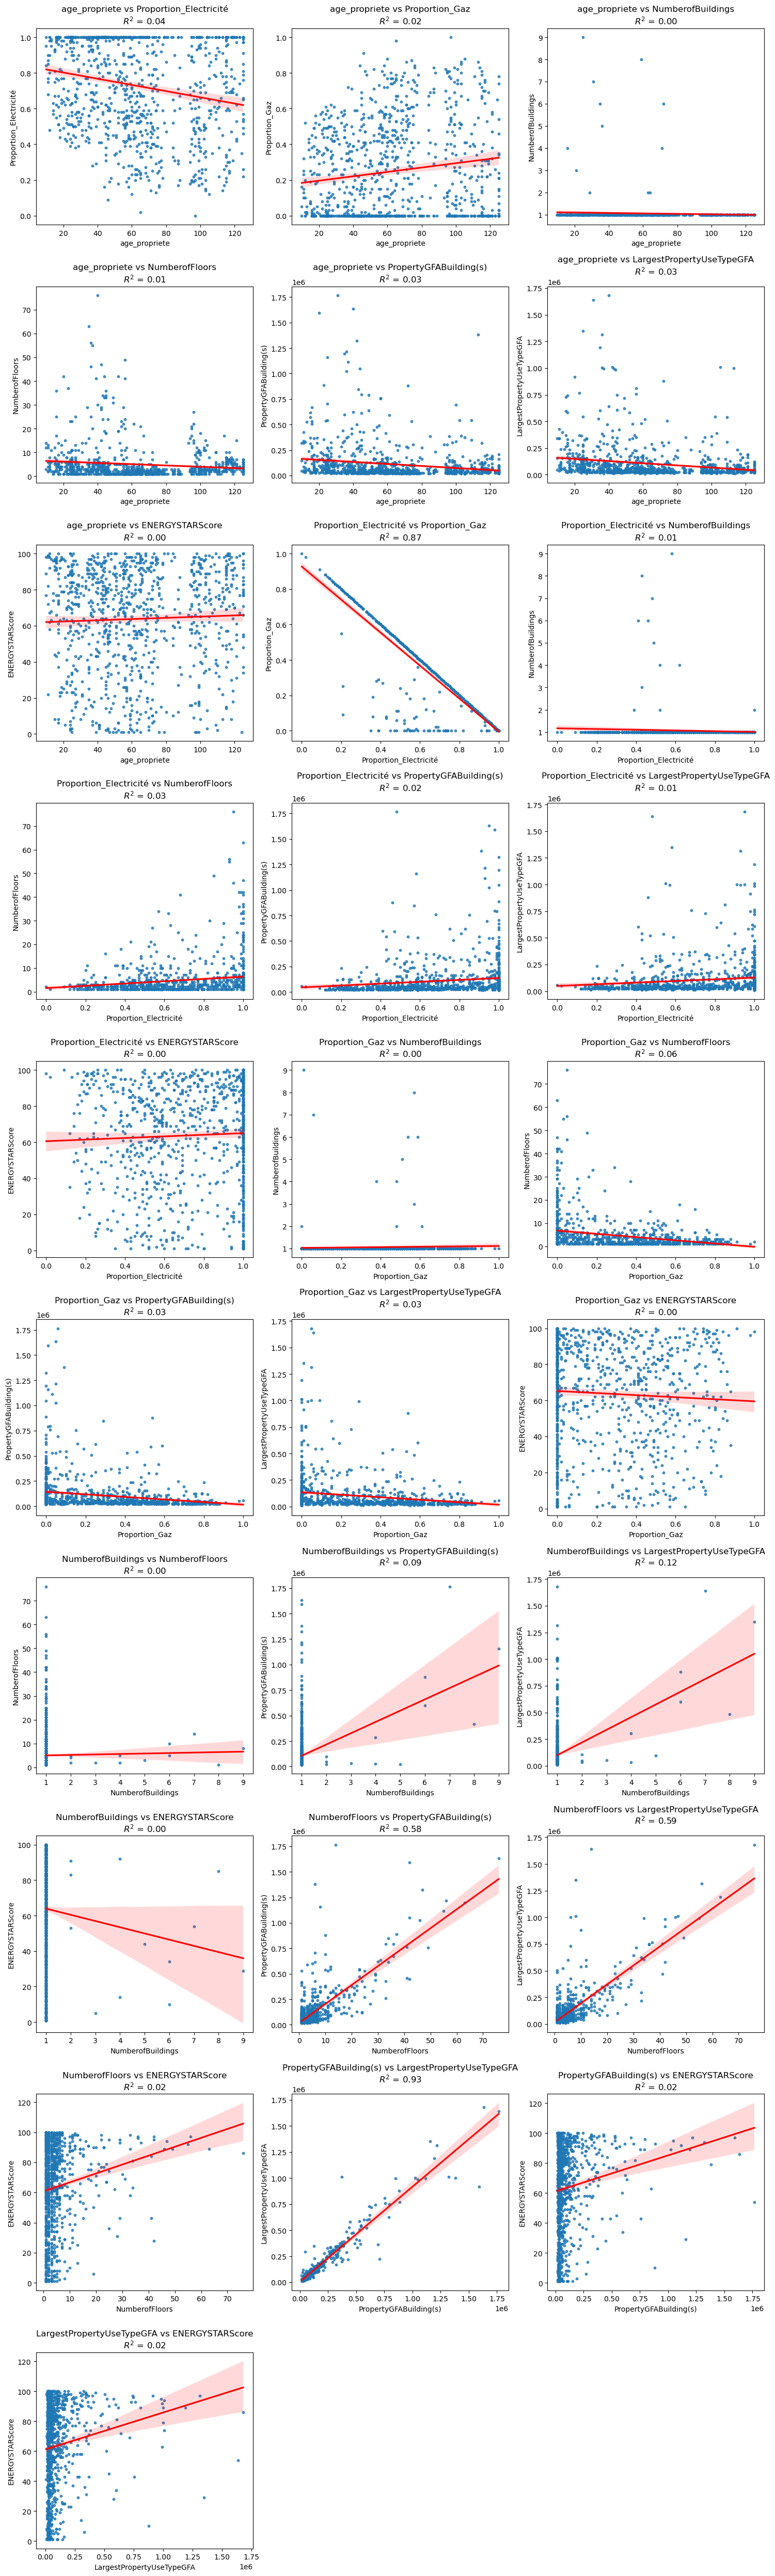

In [175]:
# Sélectionner les variables quantitatives
variables = ['age_propriete', 'Proportion_Electricité', 'Proportion_Gaz', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore']

# Liste des combinaisons des variables
combinations = [(variables[i], variables[j]) for i in range(len(variables)) for j in range(i + 1, len(variables))]

# Nombre total de sous-graphiques nécessaires (égale au nombre de combinaisons)
num_plots = len(combinations)

# Calcul du nombre de lignes et de colonnes nécessaires
ncols = 3
nrows = (num_plots // ncols) + (1 if num_plots % ncols != 0 else 0)

# Créer un sous-graphe avec le nombre dynamique de lignes et de colonnes
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 5))

# Aplatir les axes pour les indexer facilement
axes = axes.flatten()

# Parcourir les sous-graphiques pour ajouter chaque paire
for idx, (var1, var2) in enumerate(combinations):
    # Créer le nuage de points avec la droite de régression
    sns.regplot(x=var1, y=var2, data=X, ax=axes[idx], scatter_kws={'s': 10}, line_kws={'color': 'red'})
    
    # Calculer le coefficient de corrélation R2
    x_data = X[var1].dropna()
    y_data = X[var2].dropna()
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)
    r2 = r_value ** 2
    
    # Ajouter le titre avec R2
    axes[idx].set_title(f'{var1} vs {var2}\n$R^2$ = {r2:.2f}')

# Supprimer les axes inutiles 
for idx in range(num_plots, len(axes)):
    fig.delaxes(axes[idx])

# Ajustement des marges pour une meilleure visibilité
plt.tight_layout()
plt.show()

Dans cette analyse, nous avons exploré les relations linéaires entre plusieurs variables quantitatives, notamment 'age_propriete', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFABuilding(s)', et 'LargestPropertyUseTypeGFA'. Pour chaque paire de variables, une droite de régression a été tracée, et le coefficient de détermination R2 a été calculé pour évaluer la force de la corrélation linéaire.

Les résultats ont révélé que deux paires de variables, à savoir 'PropertyGFABuilding(s)' et 'LargestPropertyUseTypeGFA', et Proportion_Electricité et Proportion_Gaz présentent une corrélation linéaire particulièrement forte, avec des coefficients de détermination R2= 0.93 et 0.87.<br>
Cette valeur indique que 93% (et 87%) de la variation de l'une de ces variables peut être expliquée par l'autre, ce qui suggère une relation presque parfaite entre ces deux variables dans le cadre de notre analyse.

Cependant, les relations linéaires ne sont qu'une partie de l'analyse. Pour compléter cette exploration, il serait pertinent d'examiner la matrice de corrélation de Spearman. La corrélation de Spearman mesure la relation monotone entre les variables, c'est-à-dire la manière dont une variable évolue de façon cohérente (croissante ou décroissante) par rapport à une autre, même si cette relation n'est pas nécessairement linéaire. Il est donc possible que certaines variables présentent une forte corrélation monotone, mais non linéaire, qui ne serait pas captée par la régression linéaire.

En conclusion, bien que la régression linéaire nous ait permis d'identifier une relation forte entre certaines variables, la matrice de corrélation de Spearman pourrait révéler des relations non linéaires ou monotones importantes, qui pourraient enrichir notre compréhension des interactions entre les variables et améliorer la précision du modèle de prédiction des émissions de CO2.

### Matrice de Spearman

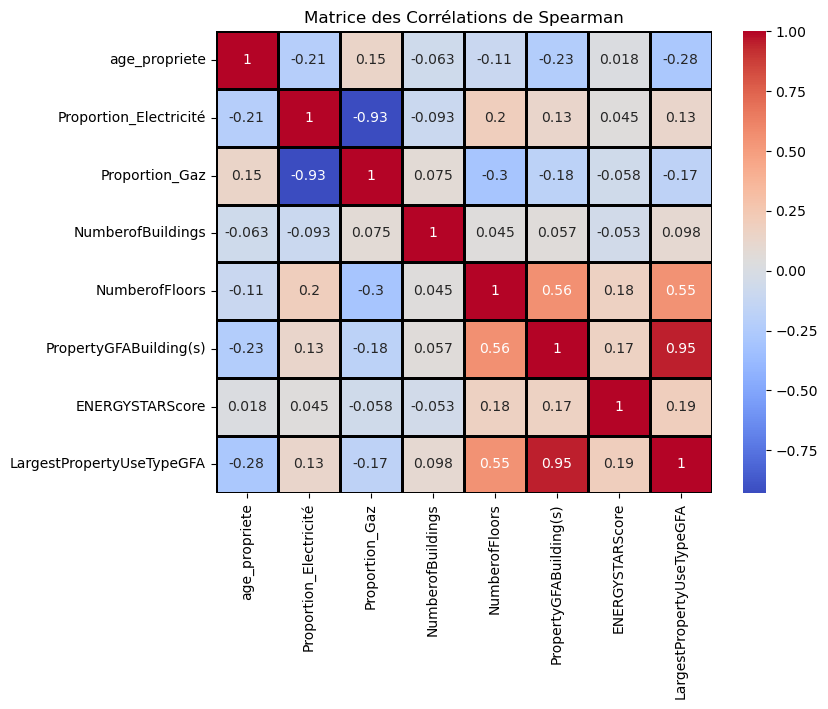

In [176]:
# Calculer la matrice des corrélations de Spearman
matrice_spearman = X[['age_propriete', 'Proportion_Electricité', 'Proportion_Gaz', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFABuilding(s)','ENERGYSTARScore', 'LargestPropertyUseTypeGFA']].corr(method='spearman')
#
# Afficher la matrice des corrélations sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrice_spearman, annot=True, cmap="coolwarm", linewidths=1, linecolor="black")
plt.title('Matrice des Corrélations de Spearman')
plt.show()

LargestPropertyUseTypeGFA ↔ ENERGYSTARScore : 0.19<br>
→ Une faible corrélation positive suggère que les bâtiments ayant une plus grande superficie pour leur usage principal ont tendance à avoir un score énergétique légèrement supérieur.<br>

PropertyGFABuilding(s) ↔ ENERGYSTARScore : 0.17<br>
→ Une relation faible et positive entre la superficie totale du bâtiment et la performance énergétique.<br>

Number of Floors ↔ ENERGYSTARScore : 0.18<br>
→ Le nombre d'étages a un impact limité sur le score énergétique.<br>

Age_propriete ↔ ENERGYSTARScore : 0.018<br>
→ Aucune relation significative entre l'âge du bâtiment et son efficacité énergétique.<br>

Age_propriete ↔ PropertyGFABuilding(s) : -0.23<br>
Age_propriete ↔ LargestPropertyUseTypeGFA : -0.28<br>
Age_propriete ↔ Number of Floors : -0.11<br>
→ Les corrélations négatives faibles indiquent que les bâtiments plus récents sont légèrement plus grands, avec davantage d’étages et de surface utile.<br>

Corrélations modérées (0.3 ≤ |ρ| < 0.7) et fortes |ρ| > 0.7<br>
Number of Floors ↔ PropertyGFABuilding(s) : 0.56<br>
Number of Floors ↔ LargestPropertyUseTypeGFA : 0.55<br>
PropertyGFABuilding(s) ↔ LargestPropertyUseTypeGFA : 0.95<br>
→ Ces relations fortes et cohérentes montrent que les bâtiments plus grands ont logiquement plus d’étages et une plus grande superficie dédiée à leur usage principal.<br>

Proportion_Electricité ↔ Proportion_Gaz : -0.93<br>
Les bâtiments qui utilisent principalement de l'électricité ne consomment presque pas de gaz, et ceux qui consomment beaucoup de gaz n'utilisent presque pas d'électricité.

### Conclusion

ans cette analyse, nous avons d'abord exploré les relations linéaires entre les variables quantitatives via des nuages de points et des régressions linéaires. Nous avons observé une forte corrélation linéaire entre PropertyGFABuilding(s) et LargestPropertyUseTypeGFA, avec un R² = 0.93, suggérant une relation très significative entre ces deux variables. Cela indique que ces variables sont étroitement liées et pourraient être redondantes dans le cadre du modèle de prédiction des émissions de CO2.

En complément, la matrice de corrélation de Spearman que nous avons explorée montre également une forte corrélation monotone (0.95) entre PropertyGFABuilding(s) et LargestPropertyUseTypeGFA, confirmant la relation identifiée précédemment. Ces deux variables évoluent donc de manière parallèle, ce qui les rend potentiellement redondantes dans notre modèle.

De plus, nous avons observé une forte corrélation négative entre Proportion_Electricité et Proportion_Gaz, avec un coefficient de Spearman de -0.93 et un coefficient de Pearson de 0.87. Cette corrélation suggère qu'à mesure que la proportion d'électricité augmente, la proportion de gaz diminue de manière marquée, et inversement. Les bâtiments ayant une forte proportion d'électricité tendent à avoir une proportion de gaz très faible, et vice versa. Cette relation est très forte, ce qui pourrait également conduire à une redondance dans l'analyse énergétique des bâtiments.

D'autres variables, telles que age_propriete, NumberofBuildings, et NumberofFloors, présentent des corrélations faibles à modérées entre elles. Cela indique qu'elles ont des relations moins fortes comparées à celles observées entre PropertyGFABuilding(s) et LargestPropertyUseTypeGFA, ou entre Proportion_Electricité et Proportion_Gaz. Ces variables pourraient donc être moins redondantes et apporter des informations distinctes, mais avec des liens moins évidents.

Implications pour le modèle :
En résumé, pour l'élaboration du modèle, les variables fortement corrélées, telles que PropertyGFABuilding(s) et LargestPropertyUseTypeGFA, ainsi que Proportion_Electricité et Proportion_Gaz, devraient être prises en compte avec soin. Étant donné leurs fortes corrélations, il serait judicieux de conserver seulement l'une des variables de chaque paire pour éviter la multicolinéarité. Les autres variables, présentant des corrélations plus faibles, pourraient offrir une valeur ajoutée tout en étant moins redondantes dans le modèle.

## Analyse de LargestPropertyUseType vs variables quantitatives

### Analyse descriptive

In [177]:
# Liste des variables quantitatives
variables_quanti = ['age_propriete', 'Proportion_Electricité', 'Proportion_Gaz', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore']

# Créer une boucle pour décrire chaque variable quantitative par rapport à LargestPropertyUseType
for var in variables_quanti:
    describe_par_groupe = X.groupby('LargestPropertyUseType')[var].describe()[['count', 'mean', 'std', 'min', '50%', 'max']]
    describe_par_groupe = describe_par_groupe.round(2)  # Arrondir à 2 décimales
    print(f"Description de {var} par LargestPropertyUseType :")
    print(describe_par_groupe)
    print("\n")

Description de age_propriete par LargestPropertyUseType :
                                                count   mean    std   min  \
LargestPropertyUseType                                                      
Bureaux et services financiers                  436.0  61.01  34.44  10.0   
Commerce, distribution et entrepôts             300.0  60.77  26.16  14.0   
Hôtellerie et lieux de culte                    135.0  66.99  31.92  10.0   
Installations spécialisées et services publics   68.0  67.21  34.37  10.0   

                                                 50%    max  
LargestPropertyUseType                                       
Bureaux et services financiers                  52.0  125.0  
Commerce, distribution et entrepôts             59.0  125.0  
Hôtellerie et lieux de culte                    66.0  125.0  
Installations spécialisées et services publics  70.5  121.0  


Description de Proportion_Electricité par LargestPropertyUseType :
                                      

**Proportion_Electricité**<br>
Bureaux et services financiers ont la plus haute proportion d'électricité (moyenne de 0.85).<br> Commerce et distribution suivent avec une moyenne de 0.71.<br> Hôtellerie et lieux de culte utilisent modérément l'électricité (0.48).<br> Installations spécialisées et services publics montrent une utilisation proche de 50% (0.50).<br>

**Proportion_Gaz**<br>
Les bureaux et services financiers ont la plus faible proportion de gaz (0.12 en moyenne).<br> Le commerce et distribution ont une utilisation modérée de gaz (0.29).<br> Hôtellerie et lieux de culte ainsi que les installations spécialisées et services publics ont des proportions plus élevées (respectivement 0.48 et 0.47).<br>

**Âge des Propriétés (age_propriete)**<br>
Installations spécialisées et hôtellerie/lieux de culte sont les plus anciens (67 ans en moyenne).<br>
Bureaux/finances et commerce sont légèrement plus récents (61 ans).<br>
Variabilité élevée (écart-type > 26 ans), avec des bâtiments allant de 10 à 125 ans.<br>

**Nombre de Bâtiments (NumberofBuildings)**<br>
La majorité des catégories ont 1 bâtiment par site.<br>
Installations spécialisées se distinguent avec une moyenne de 1,63 bâtiments et un maximum de 9.<br>

**Nombre d'Étages (NumberofFloors)**<br>
Bureaux/finances : bâtiments les plus élevés (7 étages en moyenne, jusqu’à 76).<br>
Hôtellerie/lieux de culte : 6 étages en moyenne, pouvant atteindre 41.<br>
Commerce : principalement 1 à 2 étages.<br>

**Superficie Totale (PropertyGFABuilding(s))**<br>
Installations spécialisées et bureaux/finances ont les plus grandes surfaces (153k m² et 144k m²).<br>
Commerce et hôtellerie sont plus modestes (67k m² et 83k m²).<br>
Forte disparité avec des maximums dépassant 1,6 million m².<br>

**Superficie du Plus Grand Usage (LargestPropertyUseTypeGFA)**<br>
Installations spécialisées ont la plus grande superficie dédiée (163k m²).<br>
Bureaux/finances suivent avec 133k m².<br>
Commerce reste plus modeste avec 62k m².<br>

**Score Énergétique (ENERGYSTARScore)**<br>
Installations spécialisées et bureaux/finances affichent les meilleurs scores (70 et 68).<br>
Commerce est en retrait (57), indiquant une moins bonne performance énergétique.<br>
Tous les secteurs présentent une forte dispersion des scores (écart-type > 26), allant de 1 à 100.<br>

**Principaux Enseignements**<br>
Les bureaux et installations spécialisées dominent en taille et en performance énergétique.<br>
Le commerce se distingue par des bâtiments plus petits, plus bas, et moins performants énergétiquement.<br>
L’ancienneté ne semble pas fortement influencer les performances énergétiques.<br>
La taille (GFA) et le nombre d’étages sont des facteurs clés associés à la consommation énergétique, mais la corrélation reste faible.<br>

### Analyse des relations

Dans cette étape de l'analyse, nous cherchons à évaluer s'il existe des différences significatives entre les différentes catégories de la variable qualitative LargestPropertyUseType (qui représente le type d'utilisation principale de la propriété) pour chaque variable quantitative, telle que l'âge de la propriété, le nombre de bâtiments, le nombre d'étages, etc.

Pour cela, nous utilisons le test de Kruskal-Wallis, un test non paramétrique qui permet de comparer les distributions de plusieurs groupes indépendants. Contrairement à l'ANOVA qui présuppose une normalité des données, le test de Kruskal-Wallis est adapté lorsque les données ne suivent pas une distribution normale, ce qui est souvent le cas dans les analyses réelles.

L'objectif est de vérifier si les variables quantitatives sont significativement différentes entre les catégories de LargestPropertyUseType. Un p-value inférieure à 0,05 indiquerait qu'il existe des différences significatives entre ces groupes pour la variable quantitative considérée, tandis qu'une p-value supérieure à 0,05 suggérerait qu'il n'y a pas de différence significative.

Utilité pour l'Analyse de Corrélation<br>
Ce test est particulièrement utile dans le contexte de l'analyse de la corrélation entre les variables qualitatives et quantitatives. Tandis que les tests de corrélation classiques, comme celui de Pearson ou de Spearman, mesurent la relation entre deux variables continues, le test de Kruskal-Wallis nous permet de comprendre comment une variable qualitative, telle que LargestPropertyUseType, influence les distributions des variables quantitatives.

Si le test révèle une différence significative, cela suggère qu'il existe un impact de LargestPropertyUseType sur la variable quantitative. En d'autres termes, les différentes catégories de LargestPropertyUseType influencent la manière dont les valeurs de la variable quantitative (par exemple, NumberofBuildings ou PropertyGFABuilding(s)) sont réparties. Cela indique qu'une association existe, bien que cette association puisse ne pas être linéaire et ne soit pas mesurée par un coefficient de corrélation traditionnel.

Ainsi, même si le test de Kruskal-Wallis ne permet pas de mesurer directement la force ou la direction de la relation (comme une corrélation), il peut néanmoins révéler l'existence d'une association significative, ce qui est un élément essentiel pour comprendre comment les variables qualitatives et quantitatives interagissent dans le contexte de notre analyse.

En d'autres termes, il nous aide à évaluer si les différences entre les groupes de LargestPropertyUseType expliquent une variabilité dans les variables quantitatives. Cela complète notre analyse de la corrélation en identifiant les relations significatives qui pourraient ne pas être linéaires et qui nécessitent une approche non paramétrique pour être correctement analysées.

In [178]:
# Variable qualitative
var_quali = 'LargestPropertyUseType'

# Effectuer le test de Kruskal-Wallis pour chaque variable quantitative par rapport à LargestPropertyUseTypeGFA
for var_quanti in variables_quanti:
    # Diviser les données par les catégories de LargestPropertyUseTypeGFA
    groups = [X[X['LargestPropertyUseType'] == category][var_quanti].dropna() for category in X['LargestPropertyUseType'].unique()]
    
    # Appliquer le test de Kruskal-Wallis
    h_stat, p_val = stats.kruskal(*groups)
    
    print(f'Kruskal-Wallis pour {var_quanti} vs LargestPropertyUseType: H-statistic = {h_stat:.3f}, p-value = {p_val:.3f}')

Kruskal-Wallis pour age_propriete vs LargestPropertyUseType: H-statistic = 8.121, p-value = 0.044
Kruskal-Wallis pour Proportion_Electricité vs LargestPropertyUseType: H-statistic = 246.009, p-value = 0.000
Kruskal-Wallis pour Proportion_Gaz vs LargestPropertyUseType: H-statistic = 256.422, p-value = 0.000
Kruskal-Wallis pour NumberofBuildings vs LargestPropertyUseType: H-statistic = 85.252, p-value = 0.000
Kruskal-Wallis pour NumberofFloors vs LargestPropertyUseType: H-statistic = 342.084, p-value = 0.000
Kruskal-Wallis pour PropertyGFABuilding(s) vs LargestPropertyUseType: H-statistic = 25.064, p-value = 0.000
Kruskal-Wallis pour LargestPropertyUseTypeGFA vs LargestPropertyUseType: H-statistic = 24.698, p-value = 0.000
Kruskal-Wallis pour ENERGYSTARScore vs LargestPropertyUseType: H-statistic = 33.432, p-value = 0.000


Les résultats du test de Kruskal-Wallis montrent des différences statistiques significatives (p-value = 0.000) pour toutes les variables par rapport au type de propriété (LargestPropertyUseType).

Conclusion : Ces résultats indiquent que **le type de propriété (LargestPropertyUseType) est fortement associé à toutes ces variables explicatives**.

## Analyse de CouncilDistrictCode vs variables quantitatives

### Analyse descriptive

In [179]:
for var in variables_quanti:
    describe_par_groupe = X.groupby('CouncilDistrictCode', observed=False)[var].describe()[['count', 'mean', 'std', 'min', '50%', 'max']]
    describe_par_groupe = describe_par_groupe.round(2)  # Arrondir à 2 décimales
    print(f"Description de {var} par CouncilDistrictCode :")
    print(describe_par_groupe)
    print("\n")

Description de age_propriete par CouncilDistrictCode :
                     count   mean    std   min   50%    max
CouncilDistrictCode                                        
1                     60.0  52.73  22.23  14.0  50.5  109.0
2                    218.0  67.19  28.02  13.0  61.5  125.0
3                    101.0  68.42  36.15  10.0  63.0  125.0
4                     96.0  56.70  28.43  11.0  59.0  125.0
5                     71.0  48.14  19.67  11.0  45.0   95.0
6                     62.0  59.00  29.98  12.0  57.5  119.0
7                    331.0  64.06  35.68  10.0  55.0  125.0


Description de Proportion_Electricité par CouncilDistrictCode :
                     count  mean   std   min   50%  max
CouncilDistrictCode                                    
1                     60.0  0.62  0.28  0.14  0.64  1.0
2                    218.0  0.74  0.27  0.14  0.82  1.0
3                    101.0  0.68  0.27  0.12  0.69  1.0
4                     96.0  0.72  0.28  0.00  0.81  1.0
5  

**Proportion d'Électricité (Proportion_Electricité)** :<br> 
Le District 7 affiche la plus forte proportion d'électricité (0.78 en moyenne).<br> Les autres districts, tels que le District 2 (0.74) et le District 4 (0.72), ont également des proportions élevées.<br> Le District 1 montre une utilisation d'électricité modérée (0.62), tandis que le District 6 est légèrement plus faible (0.64).<br>

**Proportion de Gaz (Proportion_Gaz)** :<br> 
Le District 7 a la plus faible proportion de gaz (0.17 en moyenne).<br> Le District 2 et le District 3 ont des utilisations modérées de gaz (0.26 et 0.27).<br> Les districts 4 et 5 présentent des valeurs proches de 0.30, tandis que le District 1 montre une proportion plus élevée de gaz (0.38).<br>

**Age de la propriété (age_propriete)** :<br>
Différences entre districts : Les propriétés sont généralement plus anciennes dans les districts 2 et 3 (moyenne autour de 67-68 ans), comparées aux autres districts, où l'âge moyen est plus faible.<br>
Variabilité : La variabilité est également plus élevée dans les districts 2, 3 et 7 (écart-type plus élevé).<br>

**Nombre de bâtiments (NumberofBuildings)** :<br>
En général : La plupart des districts ont des valeurs proches de 1, mais les districts 3, 4, 5 et 6 ont des moyennes supérieures à 1, ce qui indique une plus grande diversité dans le nombre de bâtiments.<br>
Densité : Les district 3 et 4 ont les plus grandes variabilités (écart-type élevé).<br>

**Nombre d'étages (NumberofFloors)** :<br>
Disparités marquées : Les districts 1 et 7 se distinguent. Le district 7 a une moyenne de 9,11 étages avec un écart-type de 10,39, indiquant une grande diversité dans le nombre d'étages des bâtiments.<br>
Districts moins diversifiés : Les districts 1, 2 et 6 ont des bâtiments avec un nombre d'étages plutôt homogène, la moyenne étant inférieure à 3.<br>

**Surface du bâtiment (PropertyGFABuilding(s))** :<br>
Taille des bâtiments : Les bâtiments dans le district 7 sont globalement beaucoup plus grands (moyenne de 168,647), bien que la variabilité soit aussi grande, indiquant des tailles très diverses.<br>
Petits bâtiments : Les districts 1, 2 et 6 ont des bâtiments de tailles plus petites en moyenne (environ 55 000 à 75 000 m²).<br>

**Surface du plus grand type d'usage du bâtiment (LargestPropertyUseTypeGFA)** :<br>
Similarité avec la surface totale : Les tendances sont similaires à celles de la surface du bâtiment, les plus grandes surfaces étant concentrées dans le district 7, avec une grande variabilité.<br>
Variabilité : Les autres districts montrent également une variabilité importante, mais avec des tailles globalement plus petites.<br>

**Score ENERGYSTAR** :<br>
Différences de performance énergétique : Le district 7 affiche en moyenne un score plus élevé (69.83), ce qui pourrait indiquer une meilleure performance énergétique des bâtiments dans ce district.<br>
Score bas dans certains districts : Le district 1 a un score moyen plus faible (57.05), avec une grande variabilité.<br>

**En résumé** :<br>
Les districts 1, 2, et 7 montrent des tendances distinctes, notamment en termes de l'âge des bâtiments et de leur taille.
Les différences les plus marquées sont observées dans les districts 7 (grands bâtiments et haute performance énergétique) et 1 (plus anciens et souvent plus petits).<br>
Certaines variables, comme le nombre d'étages et le nombre de bâtiments, montrent de grandes variations selon le district.

### Analyse des relations

In [180]:
# Variable qualitative
var_quali = 'CouncilDistrictCode'

# Effectuer le test de Kruskal-Wallis pour chaque variable quantitative par rapport à LargestPropertyUseTypeGFA
for var_quanti in variables_quanti:
    # Diviser les données par les catégories de LargestPropertyUseTypeGFA
    groups = [X[X['CouncilDistrictCode'] == category][var_quanti].dropna() for category in X['CouncilDistrictCode'].unique()]
    
    # Appliquer le test de Kruskal-Wallis
    h_stat, p_val = stats.kruskal(*groups)
    
    print(f'Kruskal-Wallis pour {var_quanti} vs CouncilDistrictCode: H-statistic = {h_stat:.3f}, p-value = {p_val:.3f}')

Kruskal-Wallis pour age_propriete vs CouncilDistrictCode: H-statistic = 29.167, p-value = 0.000
Kruskal-Wallis pour Proportion_Electricité vs CouncilDistrictCode: H-statistic = 30.586, p-value = 0.000
Kruskal-Wallis pour Proportion_Gaz vs CouncilDistrictCode: H-statistic = 53.476, p-value = 0.000
Kruskal-Wallis pour NumberofBuildings vs CouncilDistrictCode: H-statistic = 23.638, p-value = 0.001
Kruskal-Wallis pour NumberofFloors vs CouncilDistrictCode: H-statistic = 357.971, p-value = 0.000
Kruskal-Wallis pour PropertyGFABuilding(s) vs CouncilDistrictCode: H-statistic = 90.642, p-value = 0.000
Kruskal-Wallis pour LargestPropertyUseTypeGFA vs CouncilDistrictCode: H-statistic = 79.175, p-value = 0.000
Kruskal-Wallis pour ENERGYSTARScore vs CouncilDistrictCode: H-statistic = 28.973, p-value = 0.000


Tous les résultats sont statistiquement significatifs, ce qui suggère qu'il existe des différences significatives entre les districts du conseil en ce qui concerne l'âge de la propriété, le nombre de bâtiments, le nombre d'étages, la superficie brute des bâtiments, et la superficie d'utilisation des propriétés. 

## Analyse des variables explicatives VS la cible "TotalGHGEmissions"

### LargestPropertyUseType VS cible 1

#### Distribution

In [181]:
# Ajouter temporairement la variable cible au DataFrame explicatif
X_temp = X.copy()
X_temp['TotalGHGEmissions'] = y

# Grouper par la variable qualitative et décrire la variable quantitative
describe_par_categorie = X_temp.groupby('LargestPropertyUseType')['TotalGHGEmissions'].describe()

# Afficher le résultat
describe_par_categorie

count        mean  \
LargestPropertyUseType                                              
Bureaux et services financiers                  436.0  116.900436   
Commerce, distribution et entrepôts             300.0   84.453300   
Hôtellerie et lieux de culte                    135.0  219.858296   
Installations spécialisées et services publics   68.0  869.528529   

                                                        std   min      25%  \
LargestPropertyUseType                                                       
Bureaux et services financiers                   221.917993  2.52  20.1650   
Commerce, distribution et entrepôts              115.020713  0.81  13.5300   
Hôtellerie et lieux de culte                     410.174439  1.51  31.2650   
Installations spécialisées et services publics  2353.218278  4.48  41.9375   

                                                   50%       75%       max  
LargestPropertyUseType                                                      
Bureaux et services financiers                  47.605  128.4900   3238.24  
Commerce, distribution et entrepôts             36.780   96.5025    723.47  
Hôtellerie et lieux de culte                    72.780  227.7900   2573.75  
Installations spécialisées et services publics  75.725  227.8925  12307.16

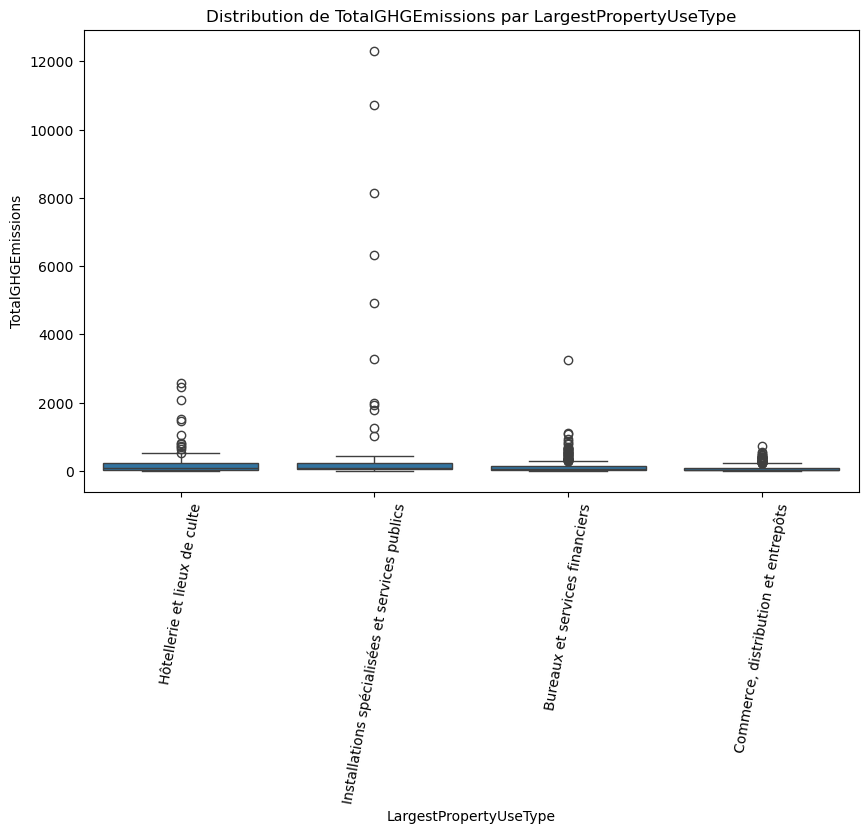

In [182]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='LargestPropertyUseType', y='TotalGHGEmissions', data=X_temp)
plt.title('Distribution de TotalGHGEmissions par LargestPropertyUseType')
plt.xticks(rotation=80)
plt.show()

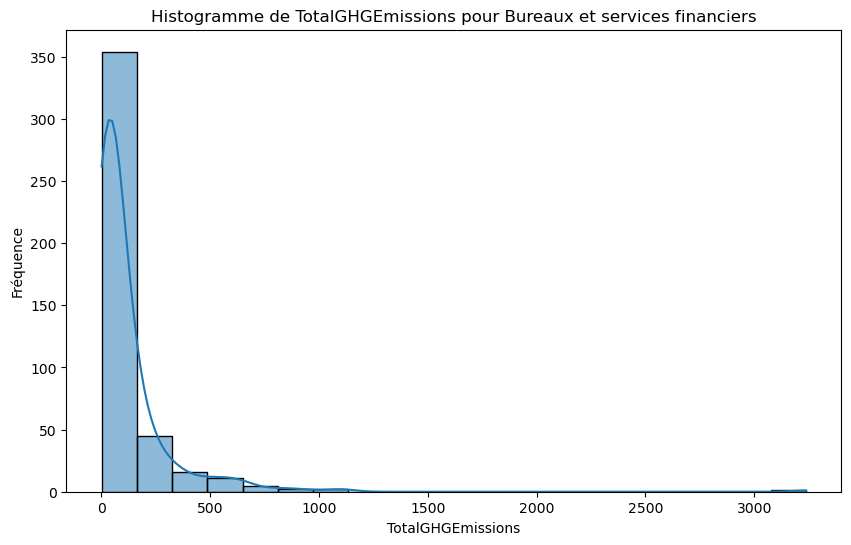

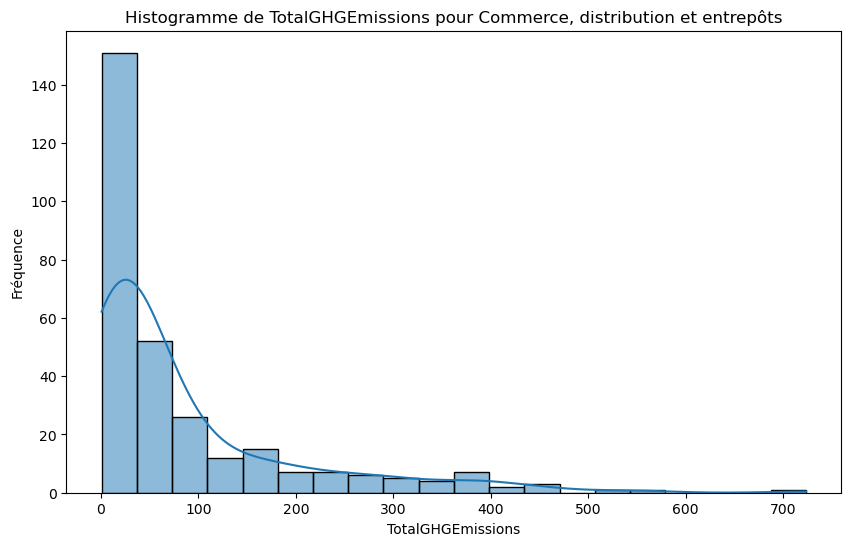

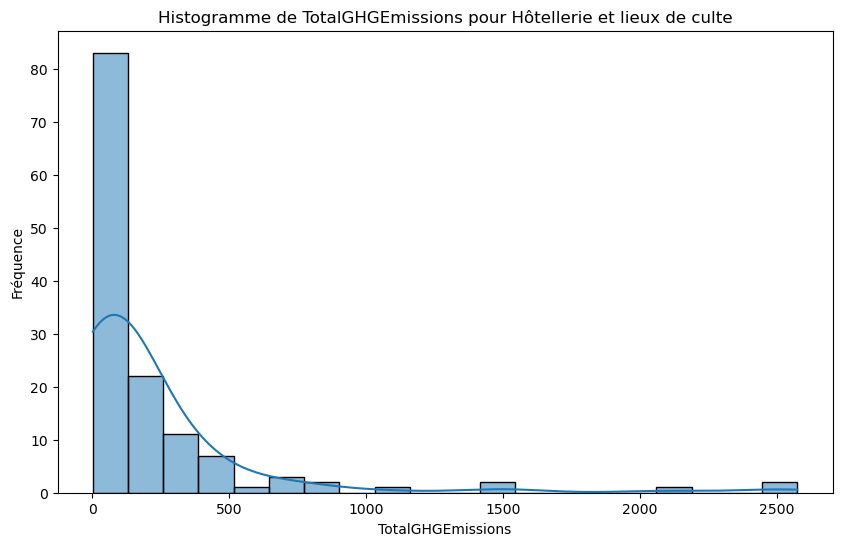

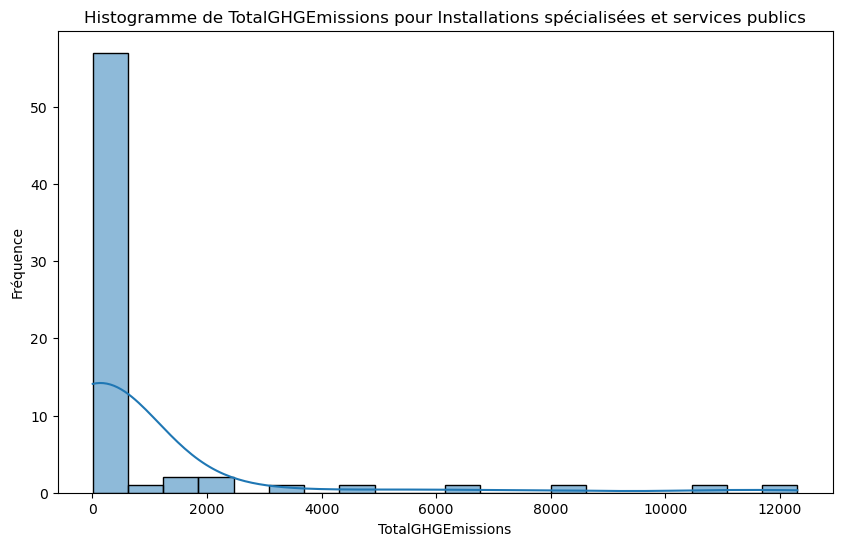

In [183]:
# Créer un histogramme pour chaque groupe de 'LargestPropertyUseType'
grouped = X_temp.groupby('LargestPropertyUseType')

# Créer un histogramme pour chaque groupe
for property_type, group in grouped:
    plt.figure(figsize=(10, 6))
    sns.histplot(group['TotalGHGEmissions'], kde=True, bins=20)
    
    # Ajouter le titre et les labels
    plt.title(f'Histogramme de TotalGHGEmissions pour {property_type}')
    plt.xlabel('TotalGHGEmissions')
    plt.ylabel('Fréquence')
    
    # Afficher le graphique
    plt.show()

**Bureaux et services financiers** :
Moyenne : 116.90 avec une grande variabilité (écart-type = 220.72), ce qui montre que les émissions sont très variables d'un bâtiment à l'autre.
Valeurs extrêmes : Le maximum atteint 3238.24, suggérant quelques bâtiments particulièrement polluants ou inefficaces énergétiquement.
Quartiles : La médiane est relativement faible (48.54), et le 75ème percentile est de 128.41, indiquant une concentration des valeurs en-dessous de 130.

**Commerce, distribution et entrepôts** :
Moyenne : 84.20 avec un écart-type de 114.92. Bien que les émissions soient globalement plus faibles que pour les bureaux, il existe également une variabilité notable.
Valeurs extrêmes : Le maximum est 723.47, ce qui reste inférieur à celui des bureaux mais témoigne de certains bâtiments ayant des émissions importantes.
Quartiles : La médiane est de 36.74 et le 75ème percentile est de 95.86, indiquant une majorité de bâtiments avec des émissions relativement faibles.

**Hôtellerie et lieux de culte** :
Moyenne : 219.86, avec une variabilité élevée (écart-type = 410.17).
Valeurs extrêmes : Les émissions peuvent atteindre jusqu'à 2573.75, ce qui est élevé par rapport aux autres types d'usage, avec des valeurs allant bien au-delà de celles des autres types de bâtiments.
Quartiles : La médiane est 72.78, et le 75ème percentile est 227.79, ce qui montre que les bâtiments de ce type ont une dispersion plus grande, certains ayant des émissions relativement faibles mais d'autres atteignant des niveaux très élevés.

**Installations spécialisées et services publics** :
Moyenne : 869.53 avec un écart-type extrêmement élevé (2353.22), suggérant que ce type d'usage peut avoir des émissions extrêmement variables, avec certains bâtiments très polluants.
Valeurs extrêmes : Le maximum est de 12,307.16, ce qui est beaucoup plus élevé que les autres catégories, indiquant que certaines installations sont des sources majeures de pollution.
Quartiles : La médiane est de 75.73 et le 75ème percentile de 227.89, ce qui montre que les bâtiments ont des émissions relativement faibles pour une majorité, mais qu'il existe une petite fraction avec des émissions très élevées.

**Conclusion** :
Les Installations spécialisées et services publics sont, en moyenne, responsables des émissions les plus élevées, mais avec une grande variabilité.
Les Hôtels et lieux de culte suivent avec des émissions relativement élevées et une dispersion notable.
Les Bureaux et services financiers et les Commerces/entrepôts ont des émissions plus faibles en moyenne, mais avec une variabilité qui mérite d'être prise en compte, notamment en raison des valeurs extrêmes.
Cela pourrait indiquer que les bâtiments de type Installations spécialisées et services publics sont particulièrement inefficaces ou énergivores, tandis que d'autres catégories montrent des émissions plus homogènes, mais toujours avec des variations notables, en particulier en raison de bâtiments exceptionnels.

#### Relation

In [184]:
# Diviser les données en groupes par catégorie de LargestPropertyUseType
groups = [X_temp[X_temp['LargestPropertyUseType'] == category]['TotalGHGEmissions'] 
          for category in X_temp['LargestPropertyUseType'].unique()]

# Appliquer le test de Kruskal-Wallis
h_stat, p_val = stats.kruskal(*groups)

# Afficher les résultats
print(f"Kruskal-Wallis pour LargestPropertyUseType vs TotalGHGEmissions : H-statistic = {h_stat:.3f}, p-value = {p_val:.3f}")

Kruskal-Wallis pour LargestPropertyUseType vs TotalGHGEmissions : H-statistic = 40.378, p-value = 0.000


Le test de Kruskal-Wallis a donné un H-statistic de 41 et une p-value de 0.000. Une p-value inférieure à 0.05 indique que les différences observées entre les différentes catégories de LargestPropertyUseType sont statistiquement significatives. Cela signifie qu'il existe des différences notables dans les valeurs de TotalGHGEmissions en fonction de la catégorie de LargestPropertyUseType.

Implications pour le modèle prédictif<br>
Pertinence de LargestPropertyUseType :<br>
Signification Statistique : Étant donné que les différentes catégories de LargestPropertyUseType ont des valeurs de TotalGHGEmissions significativement différentes, cette variable peut être **pertinente pour expliquer la variation de la cible**.
Utilisation dans le modèle : L'inclusion de LargestPropertyUseType dans un modèle prédictif semble justifiée, car elle semble avoir un impact significatif sur les émissions de gaz à effet de serre. Cependant, cela ne garantit pas qu'elle sera utile pour la prédiction après ajustement avec d'autres variables dans un modèle multivarié.

### CouncilDistrictCode VS cible 1

#### Distribution

In [185]:
describe_par_categorie = X_temp.groupby('CouncilDistrictCode', observed=False)['TotalGHGEmissions'].describe()

# Afficher le résultat
print(describe_par_categorie)

                     count        mean          std   min      25%     50%  \
CouncilDistrictCode                                                          
1                     60.0   73.230500    82.956596  2.15  23.3100  42.595   
2                    218.0   61.337982    92.546006  1.06  11.5125  26.805   
3                    101.0  494.640297  1793.975023  0.87  28.0500  64.880   
4                     96.0  185.605833   845.498785  0.81  15.9200  43.275   
5                     71.0  148.420986   402.394313  1.59  19.0050  44.260   
6                     62.0  106.416774   261.392269  1.12  23.0825  36.855   
7                    331.0  188.626344   322.225819  3.04  29.9250  73.610   

                          75%       max  
CouncilDistrictCode                      
1                     90.4550    369.14  
2                     74.0300    810.70  
3                    150.2300  12307.16  
4                    128.6775   8145.52  
5                    128.2900   3278.11  
6  

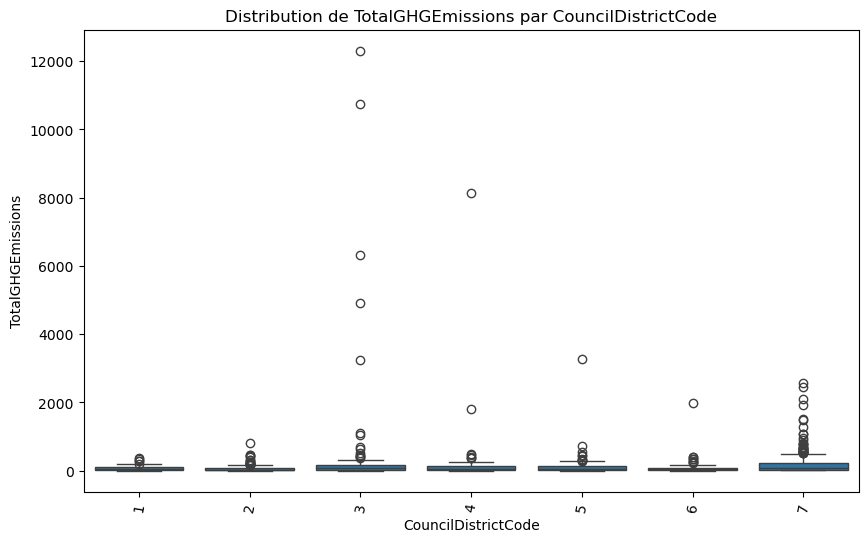

In [186]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CouncilDistrictCode', y=y, data=X_temp)
plt.title('Distribution de TotalGHGEmissions par CouncilDistrictCode')
plt.xticks(rotation=80)
plt.show()

**District 1** :<br>
Moyenne : 74.75 avec un écart-type élevé (83.12), suggérant une variabilité importante des émissions.<br>
Valeurs extrêmes : Les émissions varient entre 2.15 et 369.14, avec une concentration autour de la médiane (42.74).<br>
Quartiles : Les émissions se distribuent entre 23.60 et 93.23, ce qui montre une plage relativement modérée.<br>

**District 2** :<br>
Moyenne : 61.08 avec un écart-type également élevé (92.20).<br>
Valeurs extrêmes : Minimum de 1.06 et maximum de 810.70. Bien que les émissions moyennes soient inférieures à celles du district 1, il y a des valeurs exceptionnelles.<br>
Quartiles : La médiane est de 26.81 et le 75ème percentile de 73.73, montrant des émissions relativement concentrées autour de ces valeurs.<br>

**District 3** :<br>
Moyenne : 494.64, largement plus élevée que les autres districts, avec un écart-type gigantesque (1793.98).<br>
Valeurs extrêmes : La plage va de 0.87 à 12,307.16, ce qui inclut une valeur extrême beaucoup plus élevée que les autres districts, marquant un très grand écart entre les bâtiments.<br>
Quartiles : La médiane est 64.88 et le 75ème percentile est 150.23, mais ces valeurs ne capturent pas bien l'étendue des données en raison de la forte dispersion.<br>

**District 4** :<br>
Moyenne : 185.61 avec un écart-type relativement élevé (845.50).<br>
Valeurs extrêmes : Les émissions varient de 0.81 à 8145.52, montrant également des valeurs exceptionnelles élevées.<br>
Quartiles : La médiane est de 43.28 et le 75ème percentile est de 128.68, indiquant que la majorité des bâtiments ont des émissions modérées.<br>

**District 5** :<br>
Moyenne : 148.42 avec un écart-type (402.39), ce qui est également élevé.<br>
Valeurs extrêmes : Minimum de 1.59 et maximum de 3278.11.<br>
Quartiles : La médiane est de 44.26 et le 75ème percentile est de 128.29, ce qui montre une concentration autour de ces valeurs.<br>

**District 6** :<br>
Moyenne : 106.42, avec un écart-type plus faible (261.39).<br>
Valeurs extrêmes : Les émissions varient de 1.12 à 1990.50.<br>
Quartiles : La médiane est de 36.86 et le 75ème percentile est de 77.97, indiquant des valeurs relativement homogènes.<br>

**District 7** :
Moyenne : 187.61 avec un écart-type (320.96).<br>
Valeurs extrêmes : Les émissions varient de 3.04 à 2573.75.<br>
Quartiles : La médiane est de 73.20 et le 75ème percentile est de 213.58, avec des valeurs globalement plus élevées par rapport aux autres districts.<br>

**Conclusion :**
Le District 3 présente une moyenne d'émissions très élevée, mais aussi une dispersion extrême avec un maximum de 12,307.16.
Le District 7 et le District 4 ont également des valeurs élevées avec une certaine concentration autour des valeurs médianes, mais les valeurs extrêmes restent moins marquées que dans le district 3.<br>
Les Districts 1, 2, 5 et 6 montrent des émissions globalement plus faibles, bien que la variabilité demeure importante dans certains districts, avec des valeurs extrêmes notables.<br>
District 6 présente la plus faible variabilité en termes d'écart-type.<br>
Cela suggère qu'il existe une grande variation des émissions de gaz à effet de serre entre les districts, certains districts ayant des bâtiments particulièrement polluants. Les valeurs extrêmes dans certains districts, notamment le district 3, méritent d'être analysées plus en détail pour comprendre les causes de cette variation.

#### Relation

In [187]:
# Diviser les données en groupes par catégorie de LargestPropertyUseType
groups = [X_temp[X_temp['CouncilDistrictCode'] == category]['TotalGHGEmissions'] 
          for category in X_temp['CouncilDistrictCode'].unique()]

# Appliquer le test de Kruskal-Wallis
h_stat, p_val = stats.kruskal(*groups)

# Afficher les résultats
print(f"Kruskal-Wallis pour CouncilDistrictCode vs TotalGHGEmissions : H-statistic = {h_stat:.3f}, p-value = {p_val:.3f}")

Kruskal-Wallis pour CouncilDistrictCode vs TotalGHGEmissions : H-statistic = 68.588, p-value = 0.000


Le test de Kruskal-Wallis nous indique que la variable qualitative CouncilDistrictCode a un effet statistiquement significatif sur la variable quantitative TotalGHGEmissions. En d'autres termes, les émissions de gaz à effet de serre (GHG) varient significativement entre les différents districts. Le p-value étant très inférieur au seuil habituel de 0.05, nous rejetons l'hypothèse nulle et concluons qu'il existe des différences significatives entre les groupes.

Implications pour le modèle prédictif<br>
Pertinence de CouncilDistrictCode :<br>
Signification Statistique : Étant donné que les différentes catégories de CouncilDistrictCode ont des valeurs de TotalGHGEmissions significativement différentes, cette variable peut être pertinente pour expliquer la variation de la cible.
Utilisation dans le modèle : **L'inclusion de CouncilDistrictCode dans un modèle prédictif semble justifiée**, car elle semble avoir un impact significatif sur les émissions de gaz à effet de serre. Cependant, cela ne garantit pas qu'elle sera utile pour la prédiction après ajustement avec d'autres variables dans un modèle multivarié.

### Analyse des émissions de CO2 par type d'usage et district

#### Distribution

In [188]:
# Calcul des fréquences des combinaisons des deux variables
frequences = pd.crosstab(X_temp['LargestPropertyUseType'], X_temp['CouncilDistrictCode'])

# Affichage des fréquences
print(frequences)

CouncilDistrictCode                              1    2   3   4   5   6    7
LargestPropertyUseType                                                      
Bureaux et services financiers                   9   66  50  42  26  20  223
Commerce, distribution et entrepôts             37  135  18  23  26  24   37
Hôtellerie et lieux de culte                     8   10  13  22   8  13   61
Installations spécialisées et services publics   6    7  20   9  11   5   10


In [189]:
# Calcul des statistiques par type d'usage et district
stats_by_usage_and_district = X_temp.groupby(['LargestPropertyUseType', 'CouncilDistrictCode'])['TotalGHGEmissions'].describe()

# Affichage des statistiques
print(stats_by_usage_and_district)

                                                                    count  \
LargestPropertyUseType                         CouncilDistrictCode          
Bureaux et services financiers                 1                      9.0   
                                               2                     66.0   
                                               3                     50.0   
                                               4                     42.0   
                                               5                     26.0   
                                               6                     20.0   
                                               7                    223.0   
Commerce, distribution et entrepôts            1                     37.0   
                                               2                    135.0   
                                               3                     18.0   
                                               4                     23.0   

C:\Users\joan6\AppData\Local\Temp\ipykernel_32500\715852498.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_by_usage_and_district = X_temp.groupby(['LargestPropertyUseType', 'CouncilDistrictCode'])['TotalGHGEmissions'].describe()


C:\Users\joan6\AppData\Local\Temp\ipykernel_32500\4090179619.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emissions_by_usage_district = X_temp.groupby(['LargestPropertyUseType', 'CouncilDistrictCode'])['TotalGHGEmissions'].mean().reset_index()


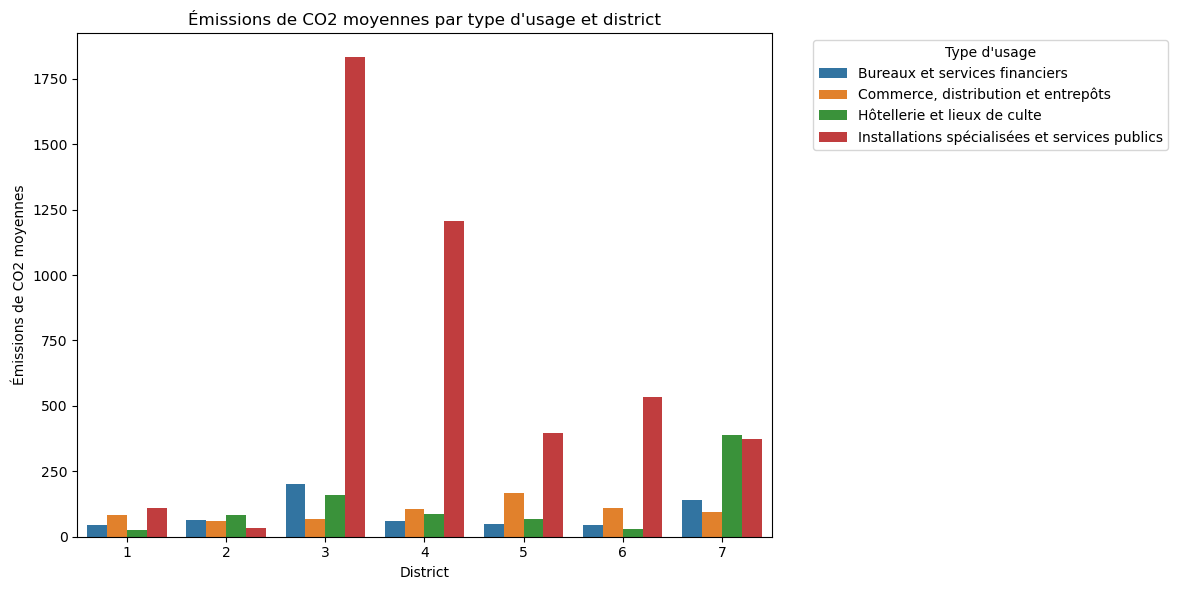

In [190]:
# Calculer la moyenne des émissions de CO2 par type d'usage et district
emissions_by_usage_district = X_temp.groupby(['LargestPropertyUseType', 'CouncilDistrictCode'])['TotalGHGEmissions'].mean().reset_index()

# Tracer un graphique en barres
plt.figure(figsize=(12, 6))
sns.barplot(x='CouncilDistrictCode', y='TotalGHGEmissions', hue='LargestPropertyUseType', data=emissions_by_usage_district)

# Ajouter des labels et un titre
plt.title('Émissions de CO2 moyennes par type d\'usage et district')
plt.xlabel('District')
plt.ylabel('Émissions de CO2 moyennes')
plt.legend(title='Type d\'usage', bbox_to_anchor=(1.05, 1), loc='upper left')

# Afficher le graphique
plt.tight_layout()
plt.show()

### Analyse des émissions de CO2 par type d'usage et taille de batiment

In [191]:
# Groupement des données par 'LargestPropertyUseType' et calcul des statistiques descriptives pour les variables 'PropertyGFABuilding(s)' et 'TotalGHGEmissions'
describe_by_usage = X_temp.groupby('LargestPropertyUseType')[['PropertyGFABuilding(s)', 'TotalGHGEmissions']].describe()

# Affichage du résultat
print("Statistiques descriptives par type d'usage :")
print(describe_by_usage)

Statistiques descriptives par type d'usage :
                                               PropertyGFABuilding(s)  \
                                                                count   
LargestPropertyUseType                                                  
Bureaux et services financiers                                  436.0   
Commerce, distribution et entrepôts                             300.0   
Hôtellerie et lieux de culte                                    135.0   
Installations spécialisées et services publics                   68.0   

                                                                              \
                                                         mean            std   
LargestPropertyUseType                                                         
Bureaux et services financiers                  144306.151376  221813.436043   
Commerce, distribution et entrepôts              67505.726667   71318.496960   
Hôtellerie et lieux de culte               

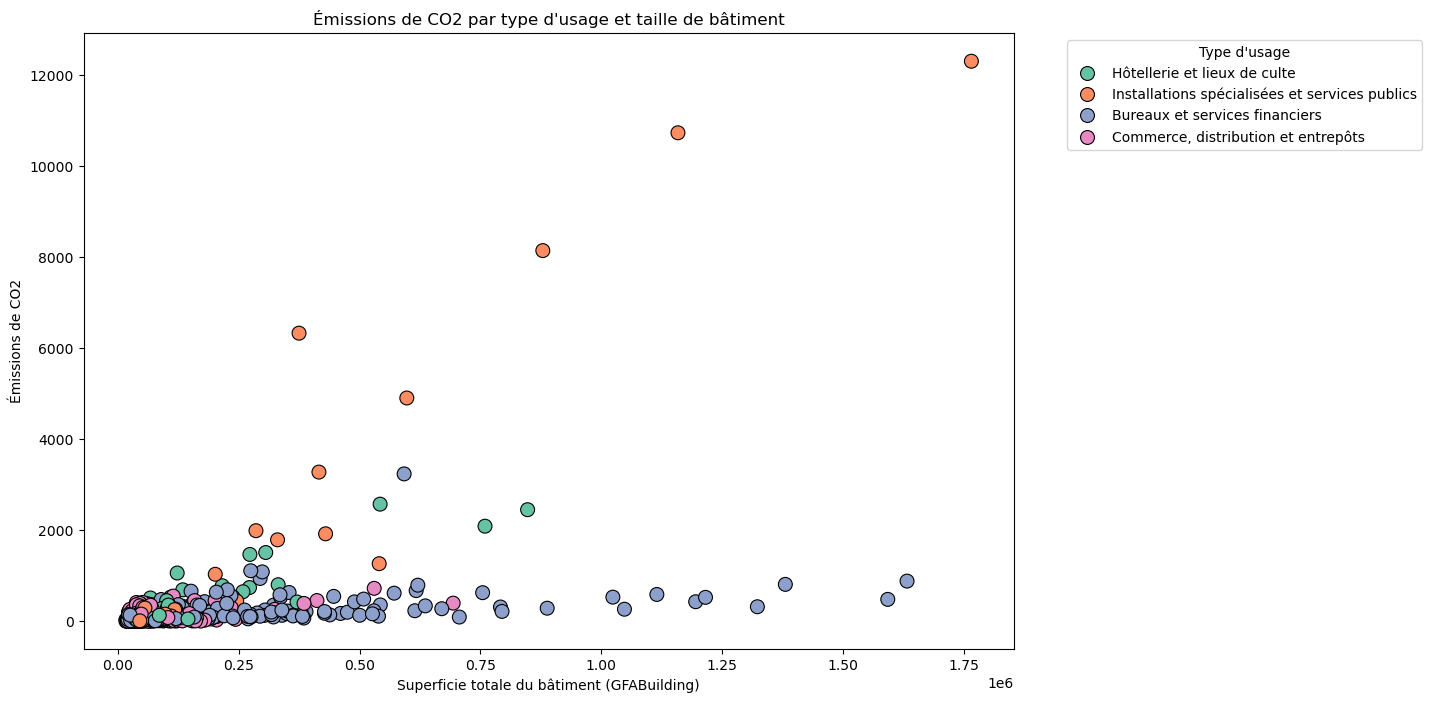

In [192]:
# Analyse combinée : émissions de CO2 par type d'usage et taille de bâtiment avec palette améliorée
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X_temp, x='PropertyGFABuilding(s)', y='TotalGHGEmissions', hue='LargestPropertyUseType', palette="Set2", s=100, edgecolor='black')
plt.title("Émissions de CO2 par type d'usage et taille de bâtiment")
plt.xlabel("Superficie totale du bâtiment (GFABuilding)")
plt.ylabel("Émissions de CO2")
plt.legend(title='Type d\'usage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\joan6\AppData\Local\Temp\ipykernel_32500\834245053.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = X_temp.groupby(['LargestPropertyUseType', 'Size_Category'])['TotalGHGEmissions'].mean().reset_index()


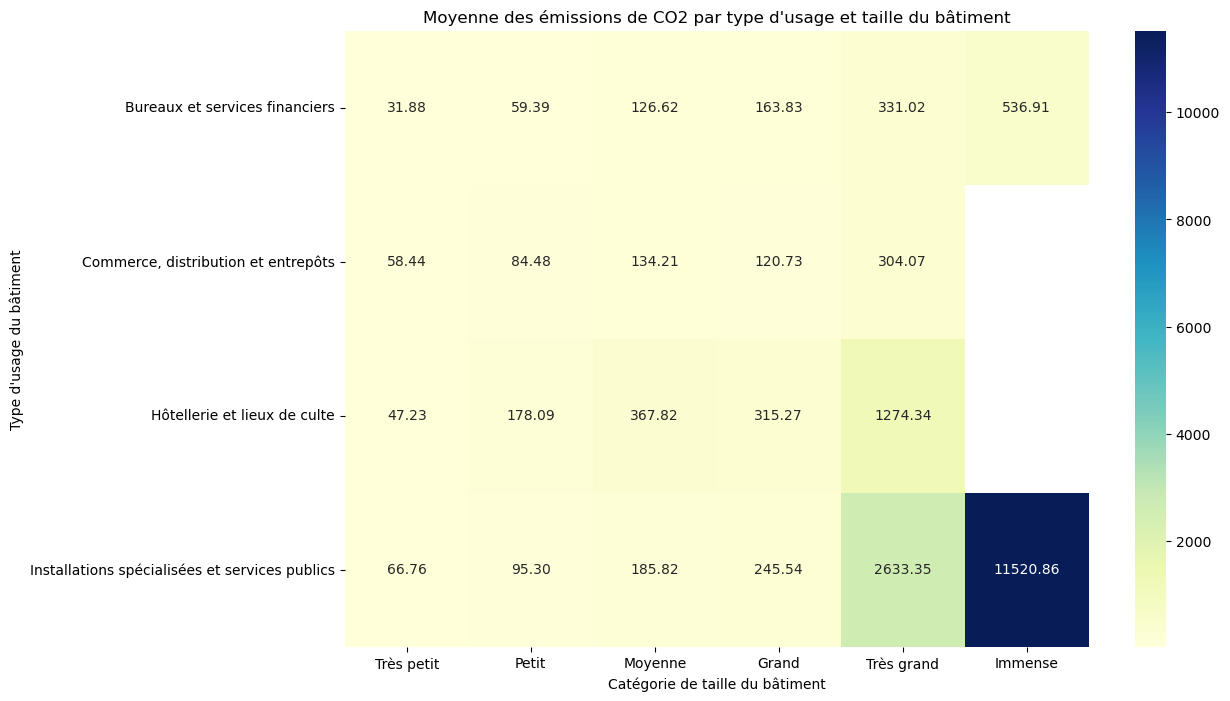

In [193]:
# Regrouper par type d'usage et taille du bâtiment
X_temp['Size_Category'] = pd.cut(X_temp['PropertyGFABuilding(s)'], bins=[0, 50000, 100000, 150000, 200000, 1000000, X_temp['PropertyGFABuilding(s)'].max()], 
                                 labels=['Très petit', 'Petit', 'Moyenne', 'Grand', 'Très grand', 'Immense'])

# Calculer la moyenne des émissions de CO2 pour chaque combinaison
grouped = X_temp.groupby(['LargestPropertyUseType', 'Size_Category'])['TotalGHGEmissions'].mean().reset_index()

# Visualisation
plt.figure(figsize=(12, 8))
sns.heatmap(grouped.pivot(index='LargestPropertyUseType', columns='Size_Category', values='TotalGHGEmissions'), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Moyenne des émissions de CO2 par type d'usage et taille du bâtiment")
plt.xlabel("Catégorie de taille du bâtiment")
plt.ylabel("Type d'usage du bâtiment")
plt.show()

In [194]:
X_temp['Size_Category'].value_counts()

Size_Category
Très petit    468
Petit         216
Très grand    108
Moyenne        93
Grand          43
Immense        11
Name: count, dtype: int64

**Les émissions augmentent avec la taille des bâtiments**<br>
Pour chaque type de bâtiment, les émissions totales de CO2 augmentent généralement avec la taille du bâtiment (catégories allant de "Très petit" à "Immense"). Cela est logique, car un bâtiment plus grand consomme généralement plus d'énergie et donc émet plus de gaz à effet de serre.

**Différences significatives entre les types de bâtiments**<br>
Les émissions varient considérablement en fonction du type de bâtiment.<br>
Bureaux et services financiers montrent une augmentation régulière des émissions à mesure que la taille augmente, mais restent relativement faibles comparées à des types comme Installations spécialisées et services publics.<br>
Installations spécialisées et services publics ont des émissions très élevées dans les catégories de taille "Très grand" et "Immense" (respectivement 2633.35 et 11520.87), ce qui indique probablement des installations industrielles ou d'autres infrastructures énergivores.<br>
Hôtellerie et lieux de culte ont des émissions très élevées pour les tailles "Très grand" et "Immense" (respectivement 1274.34 et NaN), indiquant que ces types de bâtiments, lorsqu'ils sont grands, consomment beaucoup d'énergie.

**Pas de batiments "immenses" dans toutes les catégories"**<br>
Les bâtiments de type "Commerce, distribution et entrepôts" et "Hôtellerie et lieux de culte" n'ont pas de batiments dans la catégorie "Immense".

**Les types d’usage les plus énergivores**<br>
Les Installations spécialisées et services publics ont les émissions les plus élevées, notamment dans les grandes tailles. Cela peut refléter des bâtiments tels que les hopitaux ou les data center qui utilisent une grande quantité d’énergie.
Les Bureaux et services financiers ont des émissions relativement plus faibles, même dans les plus grandes tailles.

**Tendance générale**<br>
De manière générale, on observe que plus le bâtiment est grand, plus les émissions sont importantes, ce qui reflète l’augmentation de la consommation d’énergie dans des structures plus vastes.

**Conclusion**<br>
L’analyse montre que les bâtiments industriels et de services spécialisés (comme ceux des Installations spécialisées et services publics) sont les plus responsables des émissions de gaz à effet de serre, surtout lorsqu’ils sont de grande taille. Les bureaux et les commerces ont des émissions moins élevées, même à grande échelle. En revanche, les bâtiments immenses dans certains types, comme les installations spécialisées, génèrent des émissions très élevées, 

C:\Users\joan6\AppData\Local\Temp\ipykernel_32500\3899561699.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = X_temp.groupby(['LargestPropertyUseType', 'Size_Category'])['TotalGHGEmissions'].mean().reset_index()


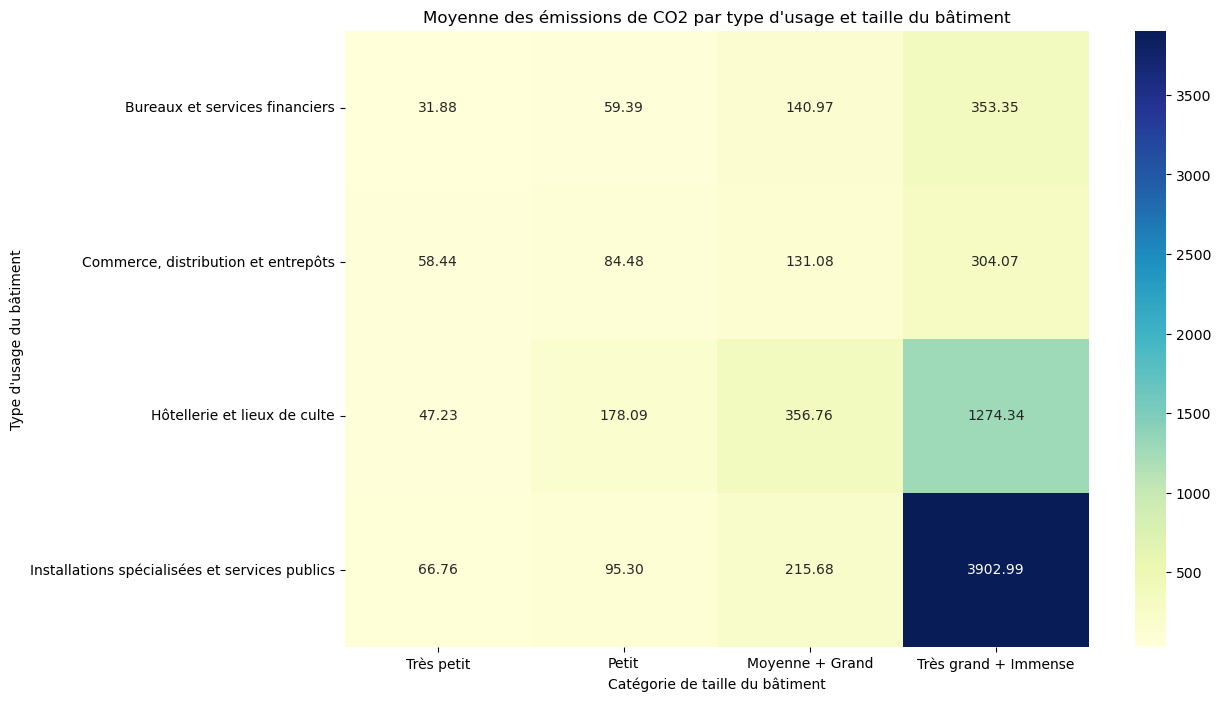

In [195]:
# Regrouper par type d'usage et taille du bâtiment
X_temp['Size_Category'] = pd.cut(X_temp['PropertyGFABuilding(s)'], bins=[0, 50000, 100000, 200000, X_temp['PropertyGFABuilding(s)'].max()], 
                                 labels=['Très petit', 'Petit', 'Moyenne + Grand', 'Très grand + Immense'])

# Calculer la moyenne des émissions de CO2 pour chaque combinaison
grouped = X_temp.groupby(['LargestPropertyUseType', 'Size_Category'])['TotalGHGEmissions'].mean().reset_index()

# Visualisation
plt.figure(figsize=(12, 8))
sns.heatmap(grouped.pivot(index='LargestPropertyUseType', columns='Size_Category', values='TotalGHGEmissions'), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Moyenne des émissions de CO2 par type d'usage et taille du bâtiment")
plt.xlabel("Catégorie de taille du bâtiment")
plt.ylabel("Type d'usage du bâtiment")
plt.show()

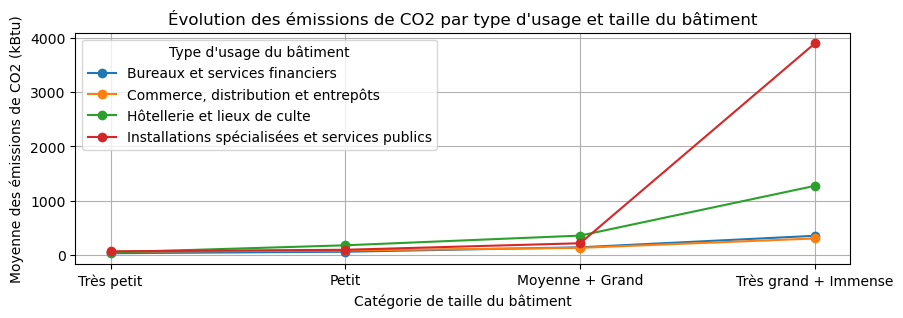

In [196]:
# Visualisation sous forme de courbes
plt.figure(figsize=(10, 3))

# Création des courbes
for use_type in grouped['LargestPropertyUseType'].unique():
    subset = grouped[grouped['LargestPropertyUseType'] == use_type]
    plt.plot(subset['Size_Category'], subset['TotalGHGEmissions'], label=use_type, marker='o')

plt.title("Évolution des émissions de CO2 par type d'usage et taille du bâtiment")
plt.xlabel("Catégorie de taille du bâtiment")
plt.ylabel("Moyenne des émissions de CO2 (kBtu)")
plt.legend(title="Type d'usage du bâtiment")
plt.grid(True)
plt.show()

In [197]:
X_temp['Size_Category'].value_counts()

Size_Category
Très petit              468
Petit                   216
Moyenne + Grand         136
Très grand + Immense    119
Name: count, dtype: int64

In [198]:
X_temp['Usage_Taille_Combiné'] = X_temp['LargestPropertyUseType'].astype(str) + ' ' + X_temp['Size_Category'].astype(str)

In [199]:
# Grouper par 'Usage_Taille_Combiné_Regroupé' et calculer les statistiques des émissions de CO2
co2_grouped = X_temp.groupby('Usage_Taille_Combiné')['TotalGHGEmissions'].agg(['mean', 'sum', 'std', 'count'])

# Afficher le résultat
print(co2_grouped)

                                                           mean       sum  \
Usage_Taille_Combiné                                                        
Bureaux et services financiers Moyenne + Grand       140.973429   9868.14   
Bureaux et services financiers Petit                  59.391700   5939.17   
Bureaux et services financiers Très grand + Imm...   353.349036  29327.97   
Bureaux et services financiers Très petit             31.876011   5833.31   
Commerce, distribution et entrepôts Moyenne + G...   131.076047   5636.27   
Commerce, distribution et entrepôts Petit             84.476579   6420.22   
Commerce, distribution et entrepôts Très grand ...   304.070909   3344.78   
Commerce, distribution et entrepôts Très petit        58.439529   9934.72   
Hôtellerie et lieux de culte Moyenne + Grand         356.759474   6778.43   
Hôtellerie et lieux de culte Petit                   178.085000   5342.55   
Hôtellerie et lieux de culte Très grand + Immense   1274.336364  14017.70   

In [200]:
# Regroupement par type d'usage
X_temp['Usage_Regroupé'] = X_temp['LargestPropertyUseType'].replace({
    'Bureaux et services financiers': 'Bureaux/Services',
    'Commerce, distribution et entrepôts': 'Commerce/Distribution',
    'Hôtellerie et lieux de culte': 'Hôtellerie/Lieux de culte',
    'Installations spécialisées et services publics': 'Installations/Services publics'
})

# Regroupement par taille de bâtiment
X_temp['Taille_Regroupée'] = X_temp['Size_Category'].replace({
    'Très petit': 'Petit à moyen',
    'Petit': 'Petit à moyen',
    'Moyenne': 'Petit à moyen',
    'Grand': 'Grand à immense',
    'Très grand': 'Grand à immense',
    'Immense': 'Grand à immense'
})

# Convertir les colonnes en chaînes de caractères
X_temp['Usage_Regroupé'] = X_temp['Usage_Regroupé'].astype(str)
X_temp['Taille_Regroupée'] = X_temp['Taille_Regroupée'].astype(str)

# Maintenant, combiner les deux colonnes
X_temp['Usage_Taille_Combiné_Regroupé'] = X_temp['Usage_Regroupé'] + ' ' + X_temp['Taille_Regroupée']

C:\Users\joan6\AppData\Local\Temp\ipykernel_32500\1681381193.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  X_temp['Taille_Regroupée'] = X_temp['Size_Category'].replace({


In [201]:
# Grouper par 'Usage_Taille_Combiné_Regroupé' et calculer les statistiques des émissions de CO2
co2_grouped = X_temp.groupby('Usage_Taille_Combiné_Regroupé')['TotalGHGEmissions'].agg(['mean', 'sum', 'std',  'count'])

# Afficher le résultat
print(co2_grouped)

                                                           mean       sum  \
Usage_Taille_Combiné_Regroupé                                               
Bureaux/Services Moyenne + Grand                     140.973429   9868.14   
Bureaux/Services Petit à moyen                        41.598869  11772.48   
Bureaux/Services Très grand + Immense                353.349036  29327.97   
Commerce/Distribution Moyenne + Grand                131.076047   5636.27   
Commerce/Distribution Petit à moyen                   66.483496  16354.94   
Commerce/Distribution Très grand + Immense           304.070909   3344.78   
Hôtellerie/Lieux de culte Moyenne + Grand            356.759474   6778.43   
Hôtellerie/Lieux de culte Petit à moyen               84.616571   8884.74   
Hôtellerie/Lieux de culte Très grand + Immense      1274.336364  14017.70   
Installations/Services publics Moyenne + Grand       215.682500    862.73   
Installations/Services publics Petit à moyen          72.466400   3623.32   

### Variables quantitatives VS cible 1

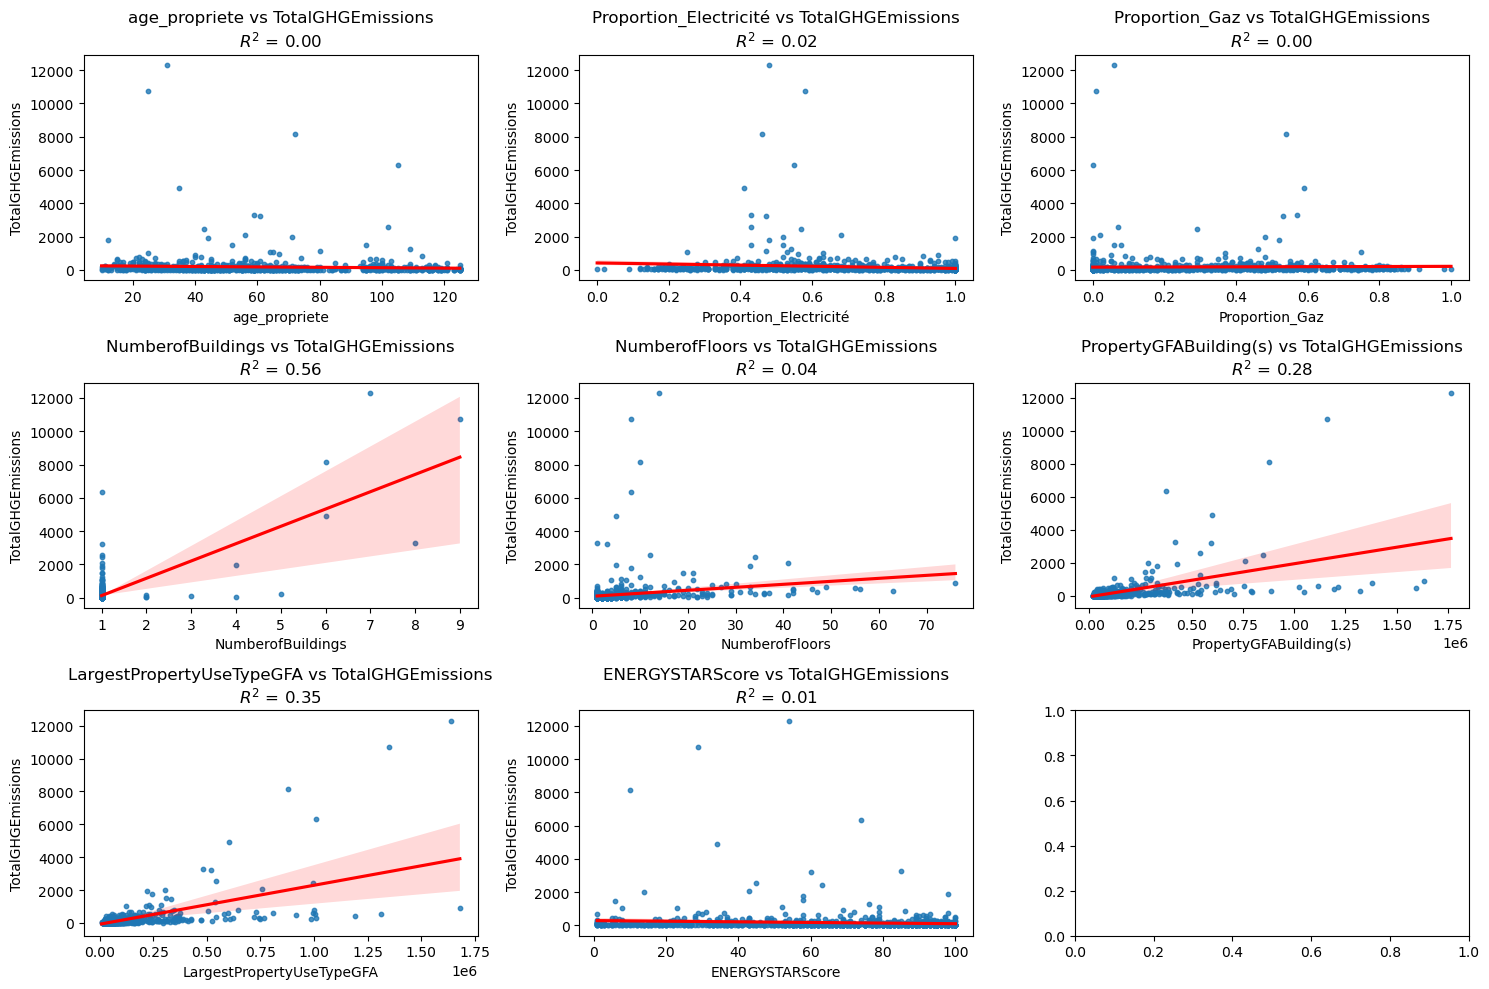

In [202]:
# Liste des variables quantitatives que tu veux analyser avec TotalGHGEmissions
variables = ['age_propriete', 'Proportion_Electricité', 'Proportion_Gaz', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA','ENERGYSTARScore']

# Créer une figure avec des sous-graphes'Proportion_Electricité', 'Proportion_Gaz', 
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # Aplatir pour faciliter l'indexation

# Pour chaque variable dans la liste, créer un nuage de points avec la droite de régression
for idx, var in enumerate(variables):
    # Créer le nuage de points avec la droite de régression
    sns.regplot(x=var, y='TotalGHGEmissions', data=X_temp, ax=axes[idx], scatter_kws={'s': 10}, line_kws={'color': 'red'})
    
    # Calculer le coefficient de corrélation R2
    x_data = X_temp[var].dropna()
    y_data = X_temp['TotalGHGEmissions'].dropna()
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)
    r2 = r_value ** 2
    
    # Ajouter le titre avec R2
    axes[idx].set_title(f'{var} vs TotalGHGEmissions\n$R^2$ = {r2:.2f}')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('TotalGHGEmissions')   
    
# Ajuster la mise en page pour éviter le chevauchement des titres
plt.tight_layout()
plt.show()

Étant donné qu'une régression linéaire ne montre pas de relations évidentes, nous allons maintenant calculer les coefficients de corrélation de Spearman pour évaluer la force de la relation monotone entre chacune des variables explicatives et la cible TotalGHGEmissions. Ce test est non paramétrique et peut capturer des relations qui ne sont pas nécessairement linéaires, mais qui peuvent encore être significatives.

In [203]:
# Calculer les coefficients de corrélation de Spearman entre les variables explicatives et la cible
spearman_corr = X_temp[variables + ['TotalGHGEmissions']].corr(method='spearman')

# Extraire les corrélations avec la cible 'TotalGHGEmissions'
corr_with_target = spearman_corr['TotalGHGEmissions'].drop('TotalGHGEmissions')  # On retire la corrélation de la variable avec elle-même

# Afficher les résultats
print(corr_with_target)

age_propriete               -0.151438
Proportion_Electricité      -0.459474
Proportion_Gaz               0.366398
NumberofBuildings            0.119625
NumberofFloors               0.398109
PropertyGFABuilding(s)       0.615697
LargestPropertyUseTypeGFA    0.605894
ENERGYSTARScore             -0.105897
Name: TotalGHGEmissions, dtype: float64


Age_propriete (-0.15) : Une corrélation négative faible, suggérant qu'il n'y a qu'une très faible relation inverse entre l'âge de la propriété et les émissions de gaz à effet de serre.

Proportion_Electricité (-0.46) : Une corrélation négative modérée, ce qui indique qu'une plus grande proportion d'électricité dans la consommation semble associée à une réduction des émissions de gaz à effet de serre.

Proportion_Gaz (0.37) : Une corrélation positive modérée, indiquant que les émissions de gaz à effet de serre augmentent avec une plus grande proportion de gaz dans la consommation énergétique.

NumberofBuildings (0.12) : Une corrélation positive faible, suggérant qu'un plus grand nombre de bâtiments n'est que faiblement associé à des émissions plus élevées.

NumberofFloors (0.40) : Une corrélation positive modérée, ce qui pourrait indiquer que les bâtiments avec plus d'étages tendent à émettre davantage de gaz à effet de serre.

PropertyGFABuilding(s) (0.62) : Une corrélation positive forte, ce qui montre qu'une plus grande surface de plancher dans les bâtiments est fortement liée à des émissions plus élevées.

LargestPropertyUseTypeGFA (0.61) : Une autre corrélation positive forte, indiquant que la taille du plus grand usage de propriété (en surface) est également fortement associée à des émissions de gaz à effet de serre.

ENERGYSTARScore (-0.11) : Une corrélation négative très faible, suggérant qu'il n'y a presque aucune relation entre le score ENERGYSTAR et les émissions de gaz à effet de serre.

Conclusion :
Les variables PropertyGFABuilding(s) et LargestPropertyUseTypeGFA présentent les corrélations les plus fortes avec les émissions de gaz à effet de serre, tandis que Proportion_Electricité et ENERGYSTARScore ont des relations plus faibles et inverses.

Cela suggère que les grandes propriétés et les bâtiments avec une plus grande superficie de plancher tendent à avoir une empreinte carbone plus élevée, ce qui est à peu près le cas pour la proportion de gaz, contrairement à la proportion d'électricité qui semble avoir un effet inverse.

C:\Users\joan6\AppData\Local\Temp\ipykernel_32500\1860646999.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette="Blues_r")


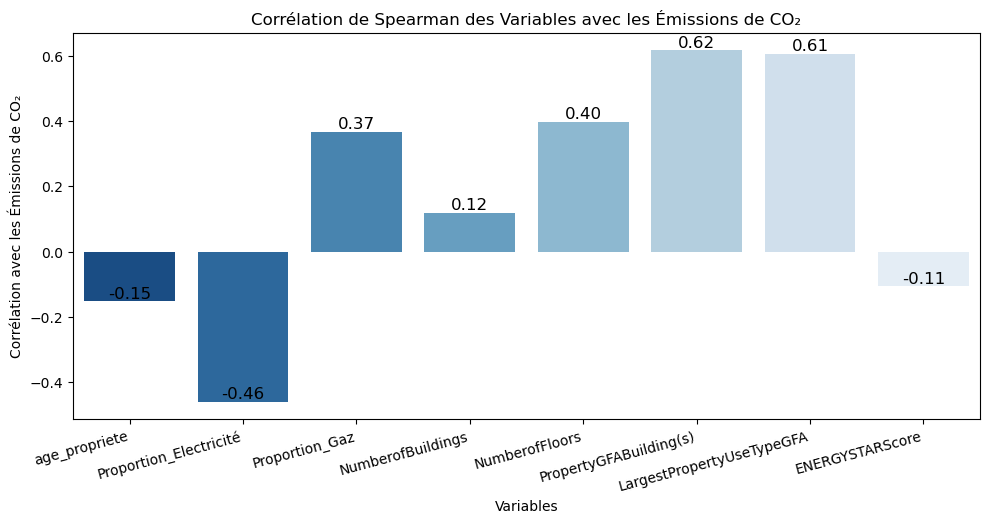

In [242]:
# Corrélation de Spearman entre les variables numériques et la cible
corr_with_target = X_temp[['age_propriete', 'Proportion_Electricité', 'Proportion_Gaz', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFABuilding(s)','LargestPropertyUseTypeGFA','ENERGYSTARScore']].corrwith(X_temp['TotalGHGEmissions'], method='spearman')

# Création d'un graphique
plt.figure(figsize=(10,5))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette="Blues_r")

# Ajouter les valeurs sur les barres
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12)

# Personnalisation
plt.title("Corrélation de Spearman des Variables avec les Émissions de CO₂")
plt.xlabel("Variables")
plt.ylabel("Corrélation avec les Émissions de CO₂")
# Rotation des labels de l'axe x pour éviter le chevauchement
plt.xticks(rotation=10, ha="right", fontsize=10)

# Afficher le graphique
plt.tight_layout()  # Pour ajuster l'espacement et éviter le chevauchement
plt.show()

## Analyse des variables explicatives VS la cible "SiteEnergyUse(kBtu)"

### LargestPropertyUseType VS cible 2

#### Distribution

In [205]:
# Ajouter temporairement la variable cible au DataFrame explicatif
X_temp2 = X.copy()
X_temp2['SiteEnergyUse(kBtu)'] = y2

# Grouper par la variable qualitative et décrire la variable quantitative
describe_par_categorie = X_temp2.groupby('LargestPropertyUseType')['SiteEnergyUse(kBtu)'].describe()

# Afficher le résultat
print(describe_par_categorie)

                                                count          mean  \
LargestPropertyUseType                                                
Bureaux et services financiers                  436.0  8.613584e+06   
Commerce, distribution et entrepôts             300.0  4.226964e+06   
Hôtellerie et lieux de culte                    135.0  6.704928e+06   
Installations spécialisées et services publics   68.0  2.876922e+07   

                                                         std           min  \
LargestPropertyUseType                                                       
Bureaux et services financiers                  1.264300e+07  361542.09380   
Commerce, distribution et entrepôts             7.029206e+06   79711.79688   
Hôtellerie et lieux de culte                    1.198431e+07  216115.00000   
Installations spécialisées et services publics  6.986023e+07  642645.18750   

                                                         25%          50%  \
LargestPropertyUseType     

C:\Users\joan6\AppData\Local\Temp\ipykernel_32500\1341817997.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="LargestPropertyUseType", y="mean", data=df, palette="Blues_r", ci=None)
C:\Users\joan6\AppData\Local\Temp\ipykernel_32500\1341817997.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="LargestPropertyUseType", y="mean", data=df, palette="Blues_r", ci=None)


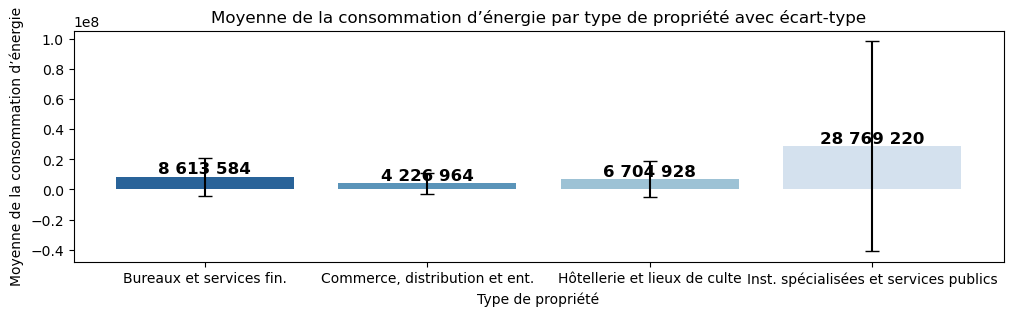

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Création du DataFrame avec les moyennes et écarts-types des consommations d'énergie
data = {
    "LargestPropertyUseType": [
        "Bureaux et services fin.",
        "Commerce, distribution et ent.",
        "Hôtellerie et lieux de culte",
        "Inst. spécialisées et services publics"
    ],
    "mean": [8_613_584, 4_226_964, 6_704_928, 28_769_220],  # Moyennes
    "std": [12_643_000, 7_029_206, 11_984_310, 69_860_230]  # Écarts-types
}

df = pd.DataFrame(data)

# Création du barplot avec barres d'erreur
plt.figure(figsize=(12, 3))
ax = sns.barplot(x="LargestPropertyUseType", y="mean", data=df, palette="Blues_r", ci=None)

# Ajout des barres d'erreur (écart-type)
for i, row in df.iterrows():
    plt.errorbar(x=i, y=row["mean"], yerr=row["std"], fmt='none', color='black', capsize=5)

# Ajouter les valeurs des moyennes sur les barres
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}'.replace(',', ' '),  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Personnalisation du graphique
#plt.xticks(rotation=15, ha='right')  # Incliner les labels pour une meilleure lisibilité
plt.ylabel("Moyenne de la consommation d’énergie")
plt.xlabel("Type de propriété")
plt.title("Moyenne de la consommation d’énergie par type de propriété avec écart-type")

# Afficher le graphique
plt.show()

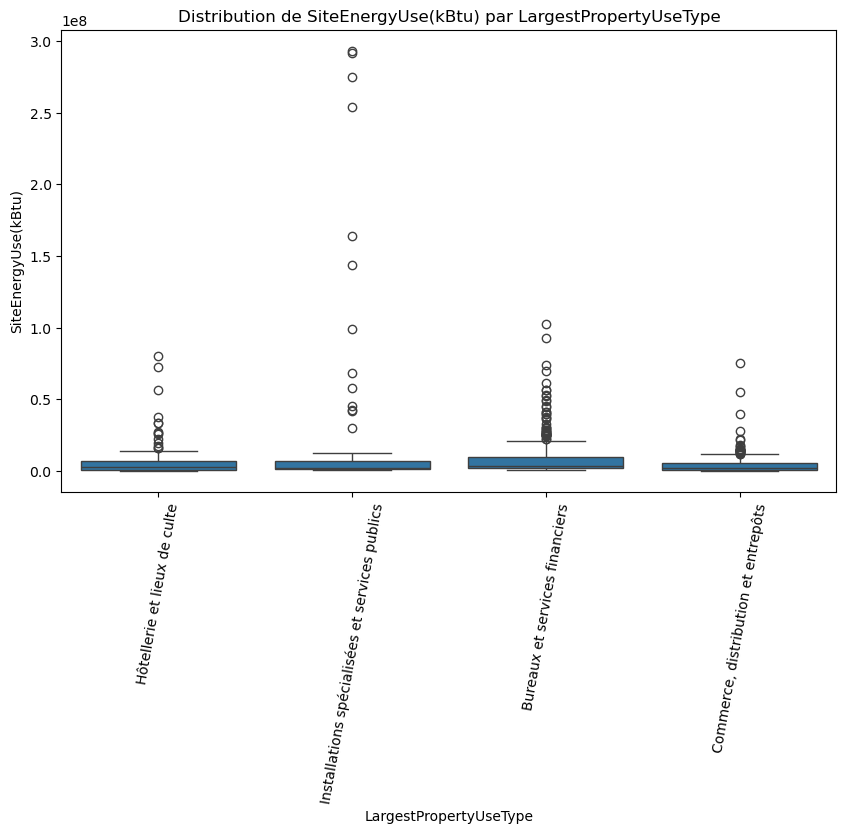

In [207]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='LargestPropertyUseType', y='SiteEnergyUse(kBtu)', data=X_temp2)
plt.title('Distribution de SiteEnergyUse(kBtu) par LargestPropertyUseType')
plt.xticks(rotation=80)
plt.show()

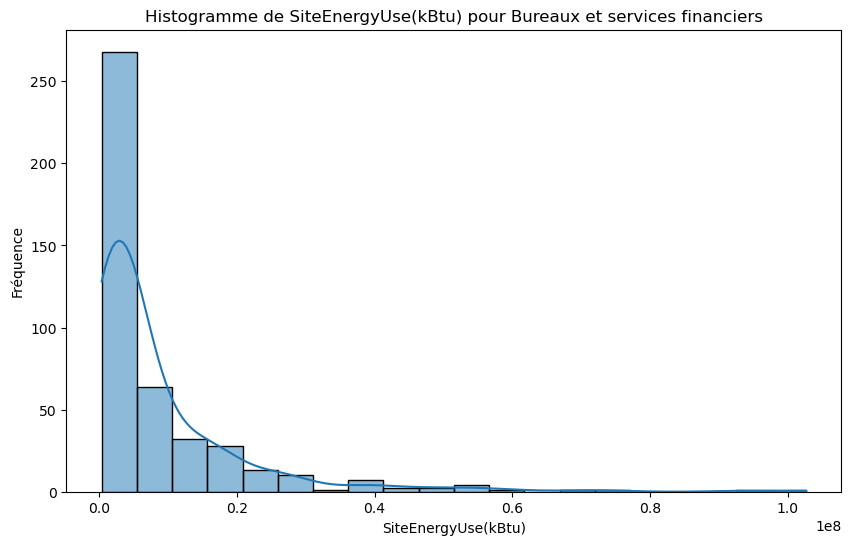

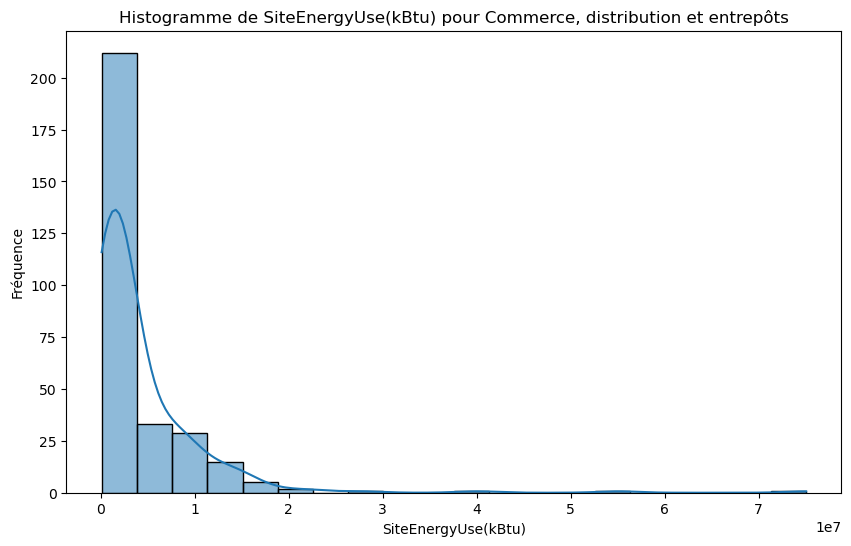

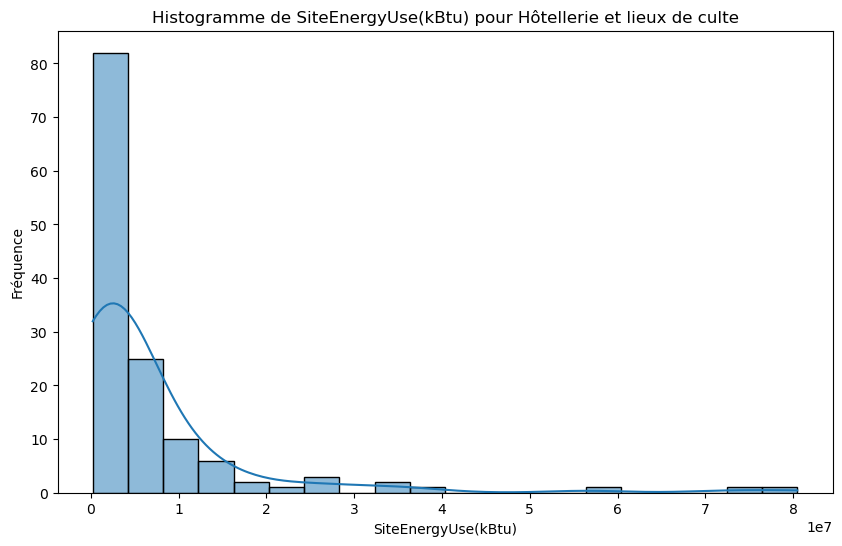

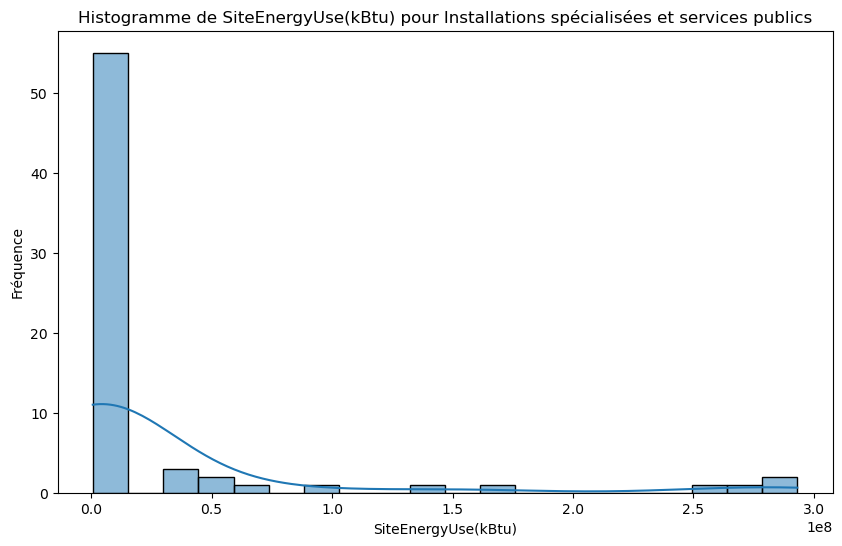

In [208]:
# Créer un histogramme pour chaque groupe de 'LargestPropertyUseType'
grouped = X_temp2.groupby('LargestPropertyUseType')

# Créer un histogramme pour chaque groupe
for property_type, group in grouped:
    plt.figure(figsize=(10, 6))
    sns.histplot(group['SiteEnergyUse(kBtu)'], kde=True, bins=20)
    
    # Ajouter le titre et les labels
    plt.title(f'Histogramme de SiteEnergyUse(kBtu) pour {property_type}')
    plt.xlabel('SiteEnergyUse(kBtu)')
    plt.ylabel('Fréquence')
    
    # Afficher le graphique
    plt.show()

**Bureaux et services financiers**<br>
Nombre d'échantillons : 436 propriétés.<br>
Consommation moyenne : 8 613 584 kBtu, ce qui est relativement élevé.<br>
Écart-type : 12 643 000 kBtu, indiquant une forte variabilité.<br>
Min-Max : La consommation varie de 361 542 kBtu à 102 673 696 kBtu.<br>
Distribution (quartiles) :<br>
25% des propriétés consomment moins de 1 768 088 kBtu.<br>
La médiane est 3 739 268 kBtu, ce qui montre que la moitié des propriétés consomment plus de ce seuil.<br>
Les 25% les plus énergivores consomment plus de 9 739 346 kBtu.<br>
Interprétation : Ce type de propriété présente une large dispersion de consommation, probablement en raison de la variation de taille et d'activité dans les bureaux.<br>

**Commerce, distribution et entrepôts**<br>
Nombre d'échantillons : 300 propriétés.<br>
Consommation moyenne : 4 226 964 kBtu, significativement plus faible que les bureaux.<br>
Écart-type : 7 029 206 kBtu, ce qui montre également une forte variabilité.<br>
Min-Max : La consommation va de 79 711 kBtu à 75 073 888 kBtu.
Distribution (quartiles) :<br>
25% des propriétés consomment moins de 959 673 kBtu.<br>
La médiane est 1 769 283 kBtu.<br>
Les 25% les plus énergivores consomment plus de 5 223 998 kBtu.<br>
Interprétation : Ce groupe est généralement moins énergivore que les bureaux, mais certains entrepôts/centres commerciaux peuvent avoir des consommations importantes.<br>

**Hôtellerie et lieux de culte**<br>
Nombre d'échantillons : 135 propriétés.<br>
Consommation moyenne : 6 704 928 kBtu, intermédiaire entre les bureaux et les entrepôts.<br>
Écart-type : 11 984 310 kBtu, assez élevé compte tenu du nombre relativement faible d’échantillons.<br>
Min-Max : La consommation varie de 216 115 kBtu à 80 469 216 kBtu.<br>
Distribution (quartiles) :<br>
25% consomment moins de 866 995 kBtu.<br>
La médiane est 2 640 980 kBtu.<br>
Les 25% les plus énergivores consomment plus de 6 691 877 kBtu.<br>
Interprétation : Ces propriétés ont une forte dispersion, probablement en raison de la diversité des tailles et usages (petits lieux de culte vs. grands hôtels).<br>

**Installations spécialisées et services publics**<br>
Nombre d'échantillons : 68 propriétés.<br>
Consommation moyenne : 28 769 220 kBtu, la plus élevée parmi tous les groupes.<br>
Écart-type : 69 860 230 kBtu, indiquant une dispersion extrêmement élevée.<br>
Min-Max : La consommation varie de 642 645 kBtu à 293 090 784 kBtu, la plus grande variation observée.
Distribution (quartiles) :<br>
25% consomment moins de 1 379 356 kBtu.<br>
La médiane est 2 190 412 kBtu.<br>
Les 25% les plus énergivores consomment plus de 6 765 573 kBtu.<br>
Interprétation : Ces propriétés incluent probablement des infrastructures très spécifiques et énergivores, ce qui explique la moyenne très élevée.<br>

**Conclusion générale**<br>
Les installations spécialisées et services publics dominent en termes de consommation énergétique moyenne et maximum. Cela reflète des activités très énergivores.<br>
Les bureaux et services financiers affichent une consommation importante, mais avec une plus grande homogénéité par rapport aux autres types.<br>
Les commerces et entrepôts consomment nettement moins en moyenne, ce qui peut être dû à leur nature moins intensive en énergie.
Les hôtels et lieux de culte présentent une grande dispersion, probablement en raison de la diversité d’usages dans ce groupe.

#### Relation

In [209]:
# Diviser les données en groupes par catégorie de LargestPropertyUseType
groups = [X_temp2[X_temp2['LargestPropertyUseType'] == category]['SiteEnergyUse(kBtu)'] 
          for category in X_temp2['LargestPropertyUseType'].unique()]

# Appliquer le test de Kruskal-Wallis
h_stat, p_val = stats.kruskal(*groups)

# Afficher les résultats
print(f"Kruskal-Wallis pour LargestPropertyUseType vs SiteEnergyUse(kBtu) : H-statistic = {h_stat:.3f}, p-value = {p_val:.3f}")

Kruskal-Wallis pour LargestPropertyUseType vs SiteEnergyUse(kBtu) : H-statistic = 61.089, p-value = 0.000


Le test de Kruskal-Wallis a donné un H-statistic de 61 et une p-value de 0.000. Une p-value inférieure à 0.05 indique que les différences observées entre les différentes catégories de LargestPropertyUseType sont statistiquement significatives. Cela signifie qu'il existe des différences notables dans les valeurs de SiteEnergyUse(kBtu) en fonction de la catégorie de LargestPropertyUseType.

Implications pour le modèle prédictif<br>
Pertinence de LargestPropertyUseType :<br>
Signification Statistique : Étant donné que les différentes catégories de LargestPropertyUseType ont des valeurs de SiteEnergyUse(kBtu) significativement différentes, cette variable peut être **pertinente pour expliquer la variation de la cible**.
Utilisation dans le modèle : L'inclusion de LargestPropertyUseType dans un modèle prédictif semble justifiée, car elle semble avoir un impact significatif sur les émissions de gaz à effet de serre. Cependant, cela ne garantit pas qu'elle sera utile pour la prédiction après ajustement avec d'autres variables dans un modèle multivarié.

### CouncilDistrictCode VS cible 2

#### Distribution

In [210]:
describe_par_categorie = X_temp2.groupby('CouncilDistrictCode', observed=False)['SiteEnergyUse(kBtu)'].describe()

# Afficher le résultat
print(describe_par_categorie)

                     count          mean           std           min  \
CouncilDistrictCode                                                    
1                     60.0  3.072158e+06  3.230795e+06  308400.40630   
2                    218.0  3.503588e+06  6.296579e+06  150167.79690   
3                    101.0  1.617927e+07  4.647344e+07   79711.79688   
4                     96.0  7.640244e+06  2.653899e+07  116486.60160   
5                     71.0  6.080870e+06  1.233449e+07  113130.00000   
6                     62.0  4.803386e+06  9.226484e+06  161311.09380   
7                    331.0  1.160076e+07  2.050612e+07  436604.09380   

                              25%           50%           75%          max  
CouncilDistrictCode                                                         
1                    1.085310e+06  2.013028e+06  3.191271e+06   14697487.0  
2                    8.788548e+05  1.623728e+06  3.605830e+06   74130576.0  
3                    1.431784e+06  2.828950

C:\Users\joan6\AppData\Local\Temp\ipykernel_32500\2279504964.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="CouncilDistrictCode", y="mean", data=df, palette="Reds", ci=None)
C:\Users\joan6\AppData\Local\Temp\ipykernel_32500\2279504964.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="CouncilDistrictCode", y="mean", data=df, palette="Reds", ci=None)


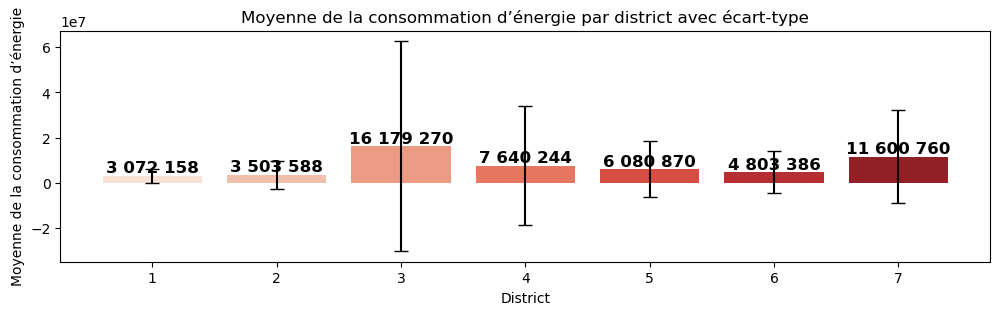

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Création du DataFrame avec les données des districts
data = {
    "CouncilDistrictCode": [1, 2, 3, 4, 5, 6, 7],
    "mean": [
        3_072_158, 3_503_588, 16_179_270, 7_640_244, 6_080_870, 4_803_386, 11_600_760
    ],
    "std": [
        3_230_795, 6_296_579, 46_473_440, 26_538_990, 12_334_490, 9_226_484, 20_506_120
    ]  # Écarts-types
}

df = pd.DataFrame(data)

# Création du barplot avec barres d'erreur
plt.figure(figsize=(12, 3))
ax = sns.barplot(x="CouncilDistrictCode", y="mean", data=df, palette="Reds", ci=None)

# Ajout des barres d'erreur (écart-type)
for i, row in df.iterrows():
    plt.errorbar(x=i, y=row["mean"], yerr=row["std"], fmt='none', color='black', capsize=5)

# Ajouter les valeurs des moyennes sur les barres
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}'.replace(',', ' '),  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Personnalisation du graphique
plt.ylabel("Moyenne de la consommation d’énergie")
plt.xlabel("District")
plt.title("Moyenne de la consommation d’énergie par district avec écart-type")

# Afficher le graphique
plt.show()


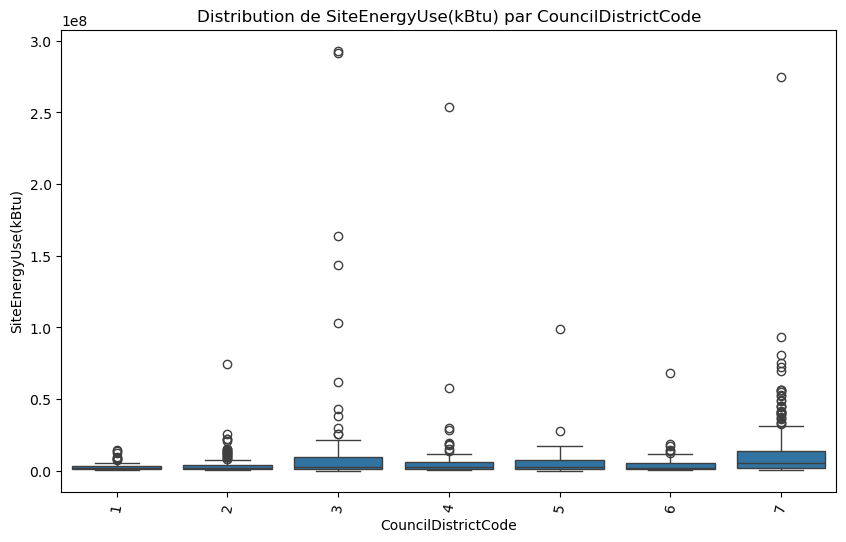

In [212]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CouncilDistrictCode', y=y2, data=X_temp2)
plt.title('Distribution de SiteEnergyUse(kBtu) par CouncilDistrictCode')
plt.xticks(rotation=80)
plt.show()

**District 1**<br>
Nombre d’échantillons : 60 propriétés.<br>
Consommation moyenne : 3 072 158 kBtu, relativement faible.<br>
Écart-type : 3 230 795 kBtu, modéré par rapport à d'autres districts.<br>
Min-Max : Consommation de 308 400 kBtu à 14 697 487 kBtu.<br>
Distribution (quartiles) :<br>
25% consomment moins de 1 085 310 kBtu.<br>
La médiane est de 2 013 028 kBtu.<br>
Les 25% les plus énergivores consomment plus de 3 191 271 kBtu.<br>
Interprétation : Le district 1 a une consommation généralement modérée, avec des propriétés peu énergivores en majorité.<br>

**District 2**<br>
Nombre d’échantillons : 218 propriétés (le plus grand nombre après le district 7).<br>
Consommation moyenne : 3 503 588 kBtu.<br>
Écart-type : 6 296 579 kBtu, ce qui montre une variabilité plus importante.<br>
Min-Max : La consommation varie entre 150 167 kBtu et 74 130 576 kBtu.<br>
Distribution (quartiles) :<br>
25% consomment moins de 878 854 kBtu.<br>
La médiane est de 1 623 728 kBtu.<br>
Les 25% les plus énergivores consomment plus de 3 605 830 kBtu.<br>
Interprétation : La majorité des propriétés consomment peu, mais il existe des propriétés très énergivores qui augmentent la moyenne.

**District 3**<br>
Nombre d’échantillons : 101 propriétés.<br>
Consommation moyenne : 16 179 270 kBtu, la plus élevée parmi tous les districts.<br>
Écart-type : 46 473 440 kBtu, énorme dispersion.<br>
Min-Max : La consommation varie de 79 711 kBtu à 293 090 784 kBtu, le maximum de tous les districts.
Distribution (quartiles) :<br>
25% consomment moins de 1 431 784 kBtu.<br>
La médiane est de 2 828 950 kBtu.<br>
Les 25% les plus énergivores consomment plus de 9 373 179 kBtu.<br>
Interprétation : Ce district contient des propriétés extrêmement énergivores, ce qui gonfle la moyenne.

**District 4**<br>
Nombre d’échantillons : 96 propriétés.<br>
Consommation moyenne : 7 640 244 kBtu.<br>
Écart-type : 26 538 990 kBtu, élevée.<br>
Min-Max : La consommation varie entre 116 486 kBtu et 253 832 464 kBtu.<br>
Distribution (quartiles) :<br>
25% consomment moins de 1 166 998 kBtu.<br>
La médiane est de 2 372 564 kBtu.<br>
Les 25% les plus énergivores consomment plus de 6 047 492 kBtu.<br>
Interprétation : Ce district montre une consommation relativement importante, bien que la plupart des propriétés consomment moins de 6 047 492 kBtu.

**District 5**<br>
Nombre d’échantillons : 71 propriétés.<br>
Consommation moyenne : 6 080 870 kBtu.<br>
Écart-type : 12 334 490 kBtu, modéré.<br>
Min-Max : La consommation varie entre 113 130 kBtu et 98 960 776 kBtu.<br>
Distribution (quartiles) :<br>
25% consomment moins de 1 015 113 kBtu.<br>
La médiane est de 2 472 350 kBtu.<br>
Les 25% les plus énergivores consomment plus de 7 531 379 kBtu.<br>
Interprétation : Une consommation globalement modérée, mais des valeurs extrêmes augmentent l'écart-type.

**District 6**<br>
Nombre d’échantillons : 62 propriétés.<br>
Consommation moyenne : 4 803 386 kBtu.<br>
Écart-type : 9 226 484 kBtu, modéré.<br>
Min-Max : La consommation varie de 161 311 kBtu à 68 090 728 kBtu.<br>
Distribution (quartiles) :<br>
25% consomment moins de 980 457 kBtu.<br>
La médiane est de 1 866 051 kBtu.<br>
Les 25% les plus énergivores consomment plus de 5 307 904 kBtu.<br>
Interprétation : Ce district présente une consommation généralement faible, bien que quelques propriétés affichent des consommations importantes.<br>

**District 7**<br>
Nombre d’échantillons : 331 propriétés (le plus grand nombre).<br>
Consommation moyenne : 11 600 760 kBtu, assez élevée.<br>
Écart-type : 20 506 120 kBtu, large dispersion.<br>
Min-Max : La consommation varie entre 436 604 kBtu et 274 682 208 kBtu.<br>
Distribution (quartiles) :<br>
25% consomment moins de 1 897 138 kBtu.<br>
La médiane est de 5 284 344 kBtu.<br>
Les 25% les plus énergivores consomment plus de 13 819 910 kBtu.<br>
Interprétation : Ce district contient une grande variété de propriétés, allant de faibles à très grandes consommations, ce qui explique la large dispersion.<br>

Districts énergivores :<br>
Les districts 3 et 7 affichent les consommations moyennes les plus élevées, avec des propriétés extrêmement énergivores.
Le district 3, en particulier, est marqué par des valeurs maximales exceptionnelles.

Districts modérés :<br>
Les districts 1, 2, et 6 ont des consommations moyennes et médianes plus faibles, et des dispersions limitées.

Variabilité :<br>
Les écart-types les plus élevés (districts 3, 4, et 7) indiquent une grande diversité de propriétés, probablement de tailles et d’usages variés.

#### Relation

In [213]:
# Diviser les données en groupes par catégorie de LargestPropertyUseType
groups = [X_temp2[X_temp2['CouncilDistrictCode'] == category]['SiteEnergyUse(kBtu)'] 
          for category in X_temp['CouncilDistrictCode'].unique()]

# Appliquer le test de Kruskal-Wallis
h_stat, p_val = stats.kruskal(*groups)

# Afficher les résultats
print(f"Kruskal-Wallis pour CouncilDistrictCode vs SiteEnergyUse(kBtu) : H-statistic = {h_stat:.3f}, p-value = {p_val:.3f}")

Kruskal-Wallis pour CouncilDistrictCode vs SiteEnergyUse(kBtu) : H-statistic = 105.843, p-value = 0.000


Le test de Kruskal-Wallis nous indique que la variable qualitative CouncilDistrictCode a un effet statistiquement significatif sur la variable quantitative SiteEnergyUse(kBtu). En d'autres termes, les consommations d'energie varient significativement entre les différents districts. Le p-value étant très inférieur au seuil habituel de 0.05, nous rejetons l'hypothèse nulle et concluons qu'il existe des différences significatives entre les groupes.

Implications pour le modèle prédictif<br>
Pertinence de CouncilDistrictCode :<br>
Signification Statistique : Étant donné que les différentes catégories de CouncilDistrictCode ont des valeurs de SiteEnergyUse(kBtu) significativement différentes, cette variable peut être pertinente pour expliquer la variation de la cible.
Utilisation dans le modèle : **L'inclusion de CouncilDistrictCode dans un modèle prédictif semble justifiée**, car elle semble avoir un impact significatif sur les émissions de gaz à effet de serre. Cependant, cela ne garantit pas qu'elle sera utile pour la prédiction après ajustement avec d'autres variables dans un modèle multivarié.

### Analyse de SiteEnergyUse(kBtu) par type d'usage et district

#### Distribution

In [214]:
# Calcul des fréquences des combinaisons des deux variables
frequences = pd.crosstab(X_temp2['LargestPropertyUseType'], X_temp2['CouncilDistrictCode'])

# Affichage des fréquences
print(frequences)

CouncilDistrictCode                              1    2   3   4   5   6    7
LargestPropertyUseType                                                      
Bureaux et services financiers                   9   66  50  42  26  20  223
Commerce, distribution et entrepôts             37  135  18  23  26  24   37
Hôtellerie et lieux de culte                     8   10  13  22   8  13   61
Installations spécialisées et services publics   6    7  20   9  11   5   10


In [215]:
# Calcul des statistiques par type d'usage et district
stats_by_usage_and_district = X_temp2.groupby(['LargestPropertyUseType', 'CouncilDistrictCode'])['SiteEnergyUse(kBtu)'].describe()

# Affichage des statistiques
print(stats_by_usage_and_district)

                                                                    count  \
LargestPropertyUseType                         CouncilDistrictCode          
Bureaux et services financiers                 1                      9.0   
                                               2                     66.0   
                                               3                     50.0   
                                               4                     42.0   
                                               5                     26.0   
                                               6                     20.0   
                                               7                    223.0   
Commerce, distribution et entrepôts            1                     37.0   
                                               2                    135.0   
                                               3                     18.0   
                                               4                     23.0   

C:\Users\joan6\AppData\Local\Temp\ipykernel_32500\772028268.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_by_usage_and_district = X_temp2.groupby(['LargestPropertyUseType', 'CouncilDistrictCode'])['SiteEnergyUse(kBtu)'].describe()


C:\Users\joan6\AppData\Local\Temp\ipykernel_32500\1094039861.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emissions_by_usage_district = X_temp2.groupby(['LargestPropertyUseType', 'CouncilDistrictCode'])['SiteEnergyUse(kBtu)'].mean().reset_index()


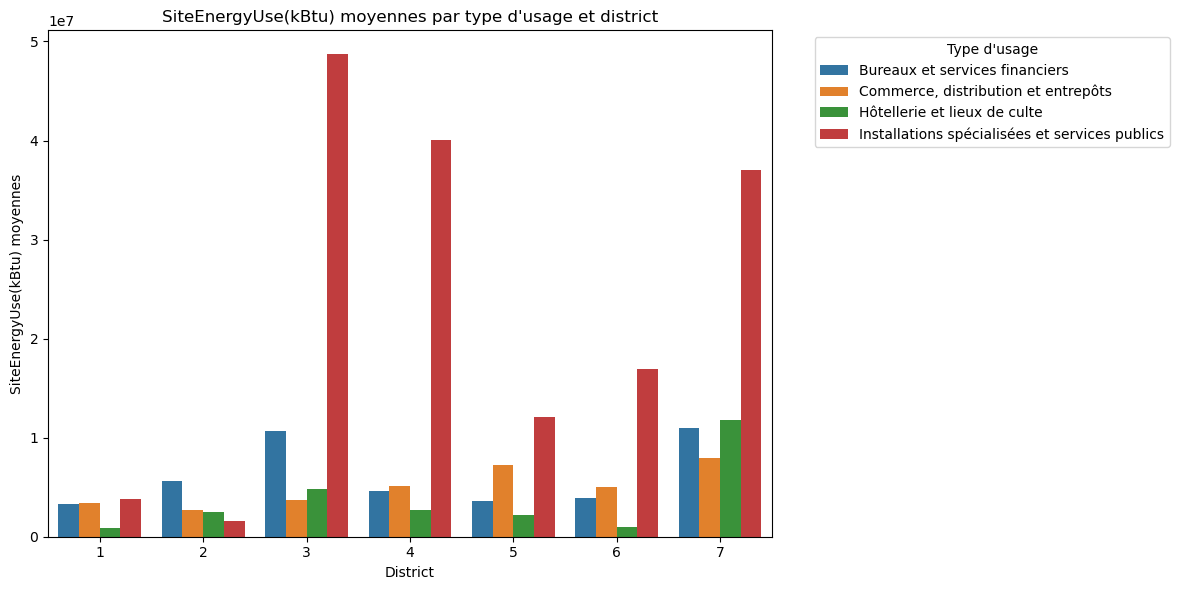

In [216]:
# Calculer la moyenne des SiteEnergyUse(kBtu) par type d'usage et district
emissions_by_usage_district = X_temp2.groupby(['LargestPropertyUseType', 'CouncilDistrictCode'])['SiteEnergyUse(kBtu)'].mean().reset_index()

# Tracer un graphique en barres
plt.figure(figsize=(12, 6))
sns.barplot(x='CouncilDistrictCode', y='SiteEnergyUse(kBtu)', hue='LargestPropertyUseType', data=emissions_by_usage_district)

# Ajouter des labels et un titre
plt.title('SiteEnergyUse(kBtu) moyennes par type d\'usage et district')
plt.xlabel('District')
plt.ylabel('SiteEnergyUse(kBtu) moyennes')
plt.legend(title='Type d\'usage', bbox_to_anchor=(1.05, 1), loc='upper left')

# Afficher le graphique
plt.tight_layout()
plt.show()

### Analyse des émissions de CO2 par type d'usage et taille de batiment

In [217]:
# Groupement des données par 'LargestPropertyUseType' et calcul des statistiques descriptives pour les variables 'PropertyGFABuilding(s)' et 'TotalGHGEmissions'
describe_by_usage = X_temp2.groupby('LargestPropertyUseType')[['PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)']].describe()

# Affichage du résultat
print("Statistiques descriptives par type d'usage :")
print(describe_by_usage)

Statistiques descriptives par type d'usage :
                                               PropertyGFABuilding(s)  \
                                                                count   
LargestPropertyUseType                                                  
Bureaux et services financiers                                  436.0   
Commerce, distribution et entrepôts                             300.0   
Hôtellerie et lieux de culte                                    135.0   
Installations spécialisées et services publics                   68.0   

                                                                              \
                                                         mean            std   
LargestPropertyUseType                                                         
Bureaux et services financiers                  144306.151376  221813.436043   
Commerce, distribution et entrepôts              67505.726667   71318.496960   
Hôtellerie et lieux de culte               

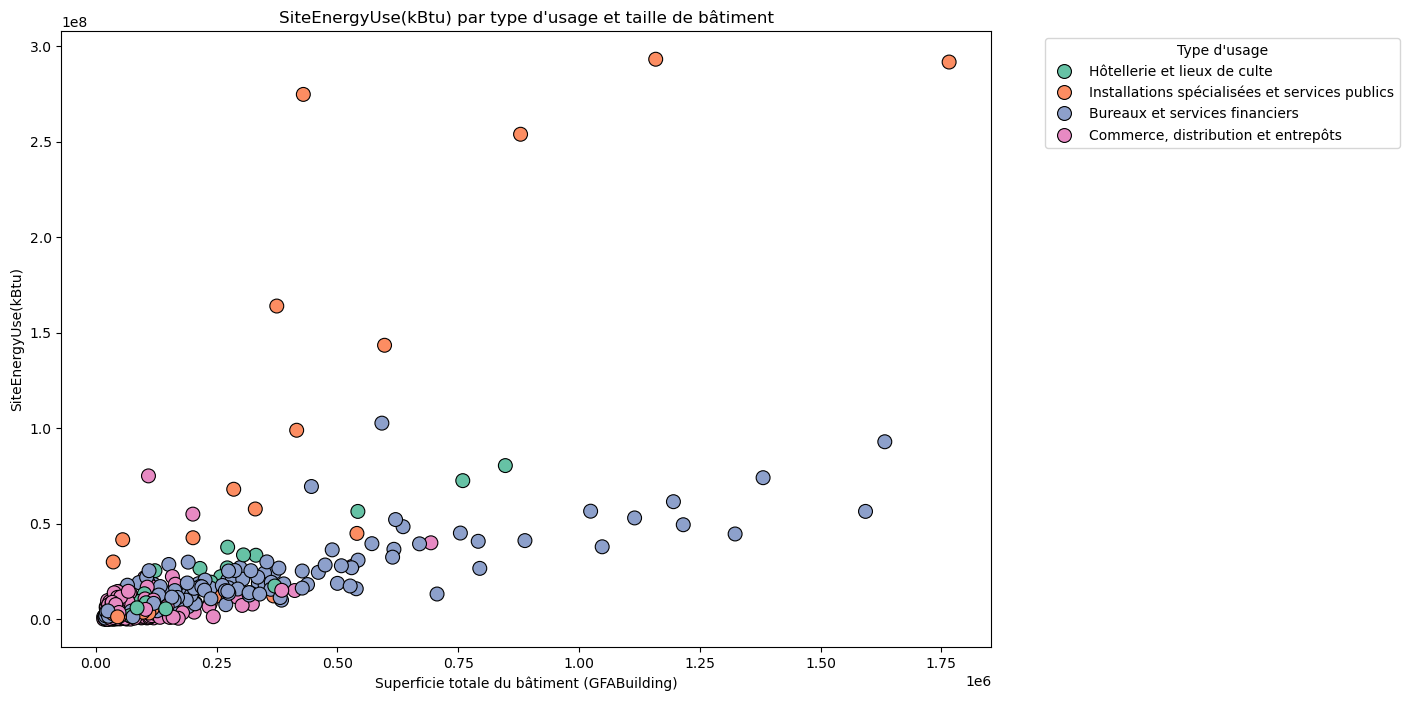

In [218]:
# Analyse combinée : SiteEnergyUse(kBtu) par type d'usage et taille de bâtiment avec palette améliorée
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X_temp2, x='PropertyGFABuilding(s)', y='SiteEnergyUse(kBtu)', hue='LargestPropertyUseType', palette="Set2", s=100, edgecolor='black')
plt.title("SiteEnergyUse(kBtu) par type d'usage et taille de bâtiment")
plt.xlabel("Superficie totale du bâtiment (GFABuilding)")
plt.ylabel("SiteEnergyUse(kBtu)")
plt.legend(title='Type d\'usage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\joan6\AppData\Local\Temp\ipykernel_32500\392086662.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = X_temp2.groupby(['LargestPropertyUseType', 'Size_Category'])['SiteEnergyUse(kBtu)'].mean().reset_index()


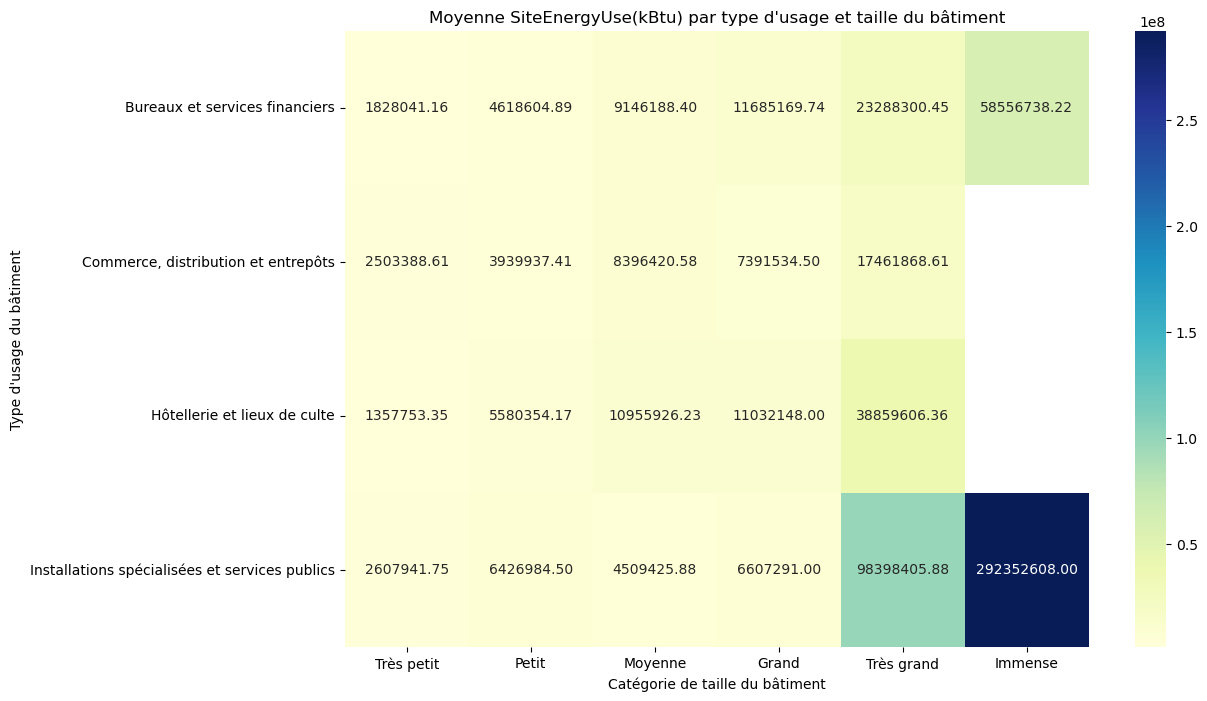

In [219]:
# Regrouper par type d'usage et taille du bâtiment
X_temp2['Size_Category'] = pd.cut(X_temp2['PropertyGFABuilding(s)'], bins=[0, 50000, 100000, 150000, 200000, 1000000, X_temp2['PropertyGFABuilding(s)'].max()], 
                                 labels=['Très petit', 'Petit', 'Moyenne', 'Grand', 'Très grand', 'Immense'])

# Calculer la moyenne des SiteEnergyUse(kBtu) pour chaque combinaison
grouped = X_temp2.groupby(['LargestPropertyUseType', 'Size_Category'])['SiteEnergyUse(kBtu)'].mean().reset_index()

# Visualisation
plt.figure(figsize=(12, 8))
sns.heatmap(grouped.pivot(index='LargestPropertyUseType', columns='Size_Category', values='SiteEnergyUse(kBtu)'), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Moyenne SiteEnergyUse(kBtu) par type d'usage et taille du bâtiment")
plt.xlabel("Catégorie de taille du bâtiment")
plt.ylabel("Type d'usage du bâtiment")
plt.show()

In [220]:
# Calculer la moyenne des SiteEnergyUse(kBtu) pour chaque combinaison
grouped = X_temp2.groupby(['LargestPropertyUseType', 'Size_Category'])['SiteEnergyUse(kBtu)'].mean().reset_index()

# Afficher les données sous forme de tableau
pivot_table = grouped.pivot(index='LargestPropertyUseType', columns='Size_Category', values='SiteEnergyUse(kBtu)')
print(pivot_table)

Size_Category                                     Très petit         Petit  \
LargestPropertyUseType                                                       
Bureaux et services financiers                  1.828041e+06  4.618605e+06   
Commerce, distribution et entrepôts             2.503389e+06  3.939937e+06   
Hôtellerie et lieux de culte                    1.357753e+06  5.580354e+06   
Installations spécialisées et services publics  2.607942e+06  6.426984e+06   

Size_Category                                        Moyenne         Grand  \
LargestPropertyUseType                                                       
Bureaux et services financiers                  9.146188e+06  1.168517e+07   
Commerce, distribution et entrepôts             8.396421e+06  7.391534e+06   
Hôtellerie et lieux de culte                    1.095593e+07  1.103215e+07   
Installations spécialisées et services publics  4.509426e+06  6.607291e+06   

Size_Category                                     Très grand  

C:\Users\joan6\AppData\Local\Temp\ipykernel_32500\2794188105.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = X_temp2.groupby(['LargestPropertyUseType', 'Size_Category'])['SiteEnergyUse(kBtu)'].mean().reset_index()


In [221]:
X_temp2['Size_Category'].value_counts()

Size_Category
Très petit    468
Petit         216
Très grand    108
Moyenne        93
Grand          43
Immense        11
Name: count, dtype: int64

C:\Users\joan6\AppData\Local\Temp\ipykernel_32500\3538121483.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = X_temp2.groupby(['LargestPropertyUseType', 'Size_Category'])['SiteEnergyUse(kBtu)'].mean().reset_index()


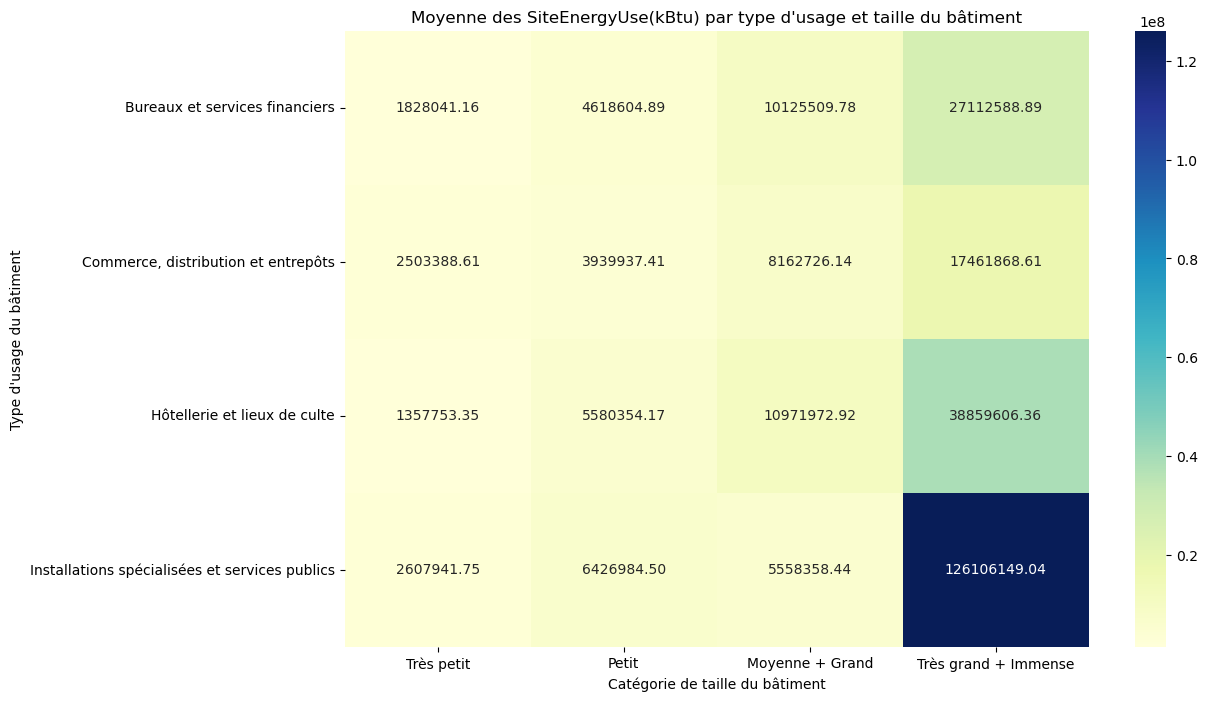

In [222]:
# Regrouper par type d'usage et taille du bâtiment
X_temp2['Size_Category'] = pd.cut(X_temp2['PropertyGFABuilding(s)'], bins=[0, 50000, 100000, 200000, X_temp2['PropertyGFABuilding(s)'].max()], 
                                 labels=['Très petit', 'Petit', 'Moyenne + Grand', 'Très grand + Immense'])

# Calculer la moyenne des SiteEnergyUse(kBtu) pour chaque combinaison
grouped = X_temp2.groupby(['LargestPropertyUseType', 'Size_Category'])['SiteEnergyUse(kBtu)'].mean().reset_index()

# Visualisation
plt.figure(figsize=(12, 8))
sns.heatmap(grouped.pivot(index='LargestPropertyUseType', columns='Size_Category', values='SiteEnergyUse(kBtu)'), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Moyenne des SiteEnergyUse(kBtu) par type d'usage et taille du bâtiment")
plt.xlabel("Catégorie de taille du bâtiment")
plt.ylabel("Type d'usage du bâtiment")
plt.show()

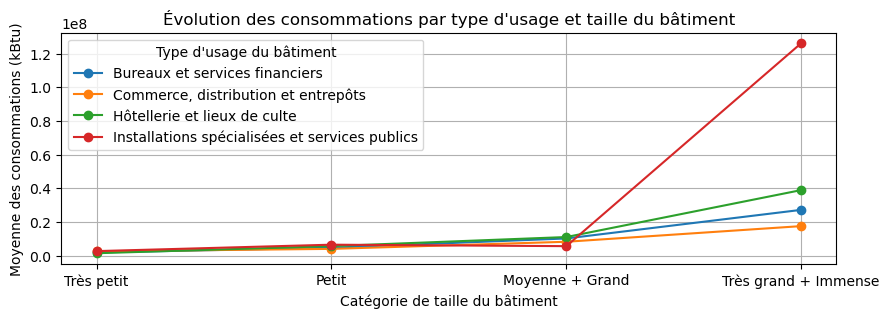

In [223]:
# Visualisation sous forme de courbes
plt.figure(figsize=(10, 3))

# Création des courbes
for use_type in grouped['LargestPropertyUseType'].unique():
    subset = grouped[grouped['LargestPropertyUseType'] == use_type]
    plt.plot(subset['Size_Category'], subset['SiteEnergyUse(kBtu)'], label=use_type, marker='o')

plt.title("Évolution des consommations par type d'usage et taille du bâtiment")
plt.xlabel("Catégorie de taille du bâtiment")
plt.ylabel("Moyenne des consommations (kBtu)")
plt.legend(title="Type d'usage du bâtiment")
plt.grid(True)
plt.show()

**Bureaux et services financiers** :
La consommation augmente de manière significative avec la taille du bâtiment.
Les bâtiments très grands ou immenses consomment en moyenne près de 27 millions kBtu, soit environ 10 fois plus que les très petits bâtiments.

**Commerce, distribution et entrepôts** :
Les bâtiments de taille moyenne à grande consomment environ 8,16 millions kBtu, tandis que ceux de taille très grande ou immense atteignent 17,46 millions kBtu.
La consommation semble presque doubler lorsque la taille dépasse "Grand".

**Hôtellerie et lieux de culte** :
Les très petits bâtiments consomment en moyenne 1,36 million kBtu, et cette consommation augmente régulièrement avec la taille.
Les très grands et immenses bâtiments consomment en moyenne 38,86 millions kBtu, soit une hausse massive par rapport aux catégories plus petites.

**Installations spécialisées et services publics** :
Les très petits bâtiments consomment en moyenne 2,6 millions kBtu, mais les très grands ou immenses bâtiments consomment en moyenne 126,1 millions kBtu, ce qui est exceptionnellement élevé.
Cela peut s'expliquer par la nature des installations publiques et spécialisées, qui nécessitent souvent une consommation énergétique importante.

**Observations globales** :
Pour tous les types d'usage, la consommation d'énergie augmente proportionnellement à la taille du bâtiment.
Les "Installations spécialisées et services publics" sont de loin les plus énergivores, surtout dans les très grandes tailles, probablement en raison de la complexité des équipements et des besoins opérationnels.

In [224]:
X_temp2['Size_Category'].value_counts()

Size_Category
Très petit              468
Petit                   216
Moyenne + Grand         136
Très grand + Immense    119
Name: count, dtype: int64

In [225]:
X_temp2['Usage_Taille_Combiné'] = X_temp2['LargestPropertyUseType'].astype(str) + ' ' + X_temp2['Size_Category'].astype(str)

In [226]:
# Grouper par 'Usage_Taille_Combiné_Regroupé' et calculer les statistiques des SiteEnergyUse(kBtu)
co2_grouped = X_temp2.groupby('Usage_Taille_Combiné')['SiteEnergyUse(kBtu)'].agg(['mean', 'sum', 'std', 'count'])

# Afficher le résultat
print(co2_grouped)

                                                            mean  \
Usage_Taille_Combiné                                               
Bureaux et services financiers Moyenne + Grand      1.012551e+07   
Bureaux et services financiers Petit                4.618605e+06   
Bureaux et services financiers Très grand + Imm...  2.711259e+07   
Bureaux et services financiers Très petit           1.828041e+06   
Commerce, distribution et entrepôts Moyenne + G...  8.162726e+06   
Commerce, distribution et entrepôts Petit           3.939937e+06   
Commerce, distribution et entrepôts Très grand ...  1.746187e+07   
Commerce, distribution et entrepôts Très petit      2.503389e+06   
Hôtellerie et lieux de culte Moyenne + Grand        1.097197e+07   
Hôtellerie et lieux de culte Petit                  5.580354e+06   
Hôtellerie et lieux de culte Très grand + Immense   3.885961e+07   
Hôtellerie et lieux de culte Très petit             1.357753e+06   
Installations spécialisées et services publics .

In [227]:
# Regroupement par type d'usage
X_temp2['Usage_Regroupé'] = X_temp2['LargestPropertyUseType'].replace({
    'Bureaux et services financiers': 'Bureaux/Services',
    'Commerce, distribution et entrepôts': 'Commerce/Distribution',
    'Hôtellerie et lieux de culte': 'Hôtellerie/Lieux de culte',
    'Installations spécialisées et services publics': 'Installations/Services publics'
})

# Regroupement par taille de bâtiment
X_temp2['Taille_Regroupée'] = X_temp2['Size_Category'].replace({
    'Très petit': 'Petit à moyen',
    'Petit': 'Petit à moyen',
    'Moyenne': 'Petit à moyen',
    'Grand': 'Grand à immense',
    'Très grand': 'Grand à immense',
    'Immense': 'Grand à immense'
})

# Convertir les colonnes en chaînes de caractères
X_temp2['Usage_Regroupé'] = X_temp2['Usage_Regroupé'].astype(str)
X_temp2['Taille_Regroupée'] = X_temp2['Taille_Regroupée'].astype(str)

# Maintenant, combiner les deux colonnes
X_temp2['Usage_Taille_Combiné_Regroupé'] = X_temp2['Usage_Regroupé'] + ' ' + X_temp2['Taille_Regroupée']

C:\Users\joan6\AppData\Local\Temp\ipykernel_32500\1798102106.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  X_temp2['Taille_Regroupée'] = X_temp2['Size_Category'].replace({


In [228]:
# Grouper par 'Usage_Taille_Combiné_Regroupé' et calculer les statistiques des SiteEnergyUse(kBtu)
co2_grouped = X_temp2.groupby('Usage_Taille_Combiné_Regroupé')['SiteEnergyUse(kBtu)'].agg(['mean', 'sum', 'std',  'count'])

# Afficher le résultat
print(co2_grouped)

                                                            mean  \
Usage_Taille_Combiné_Regroupé                                      
Bureaux/Services Moyenne + Grand                    1.012551e+07   
Bureaux/Services Petit à moyen                      2.814106e+06   
Bureaux/Services Très grand + Immense               2.711259e+07   
Commerce/Distribution Moyenne + Grand               8.162726e+06   
Commerce/Distribution Petit à moyen                 2.947200e+06   
Commerce/Distribution Très grand + Immense          1.746187e+07   
Hôtellerie/Lieux de culte Moyenne + Grand           1.097197e+07   
Hôtellerie/Lieux de culte Petit à moyen             2.564211e+06   
Hôtellerie/Lieux de culte Très grand + Immense      3.885961e+07   
Installations/Services publics Moyenne + Grand      5.558358e+06   
Installations/Services publics Petit à moyen        3.371750e+06   
Installations/Services publics Très grand + Imm...  1.261061e+08   

                                               

### Variables quantitatives VS cible 2

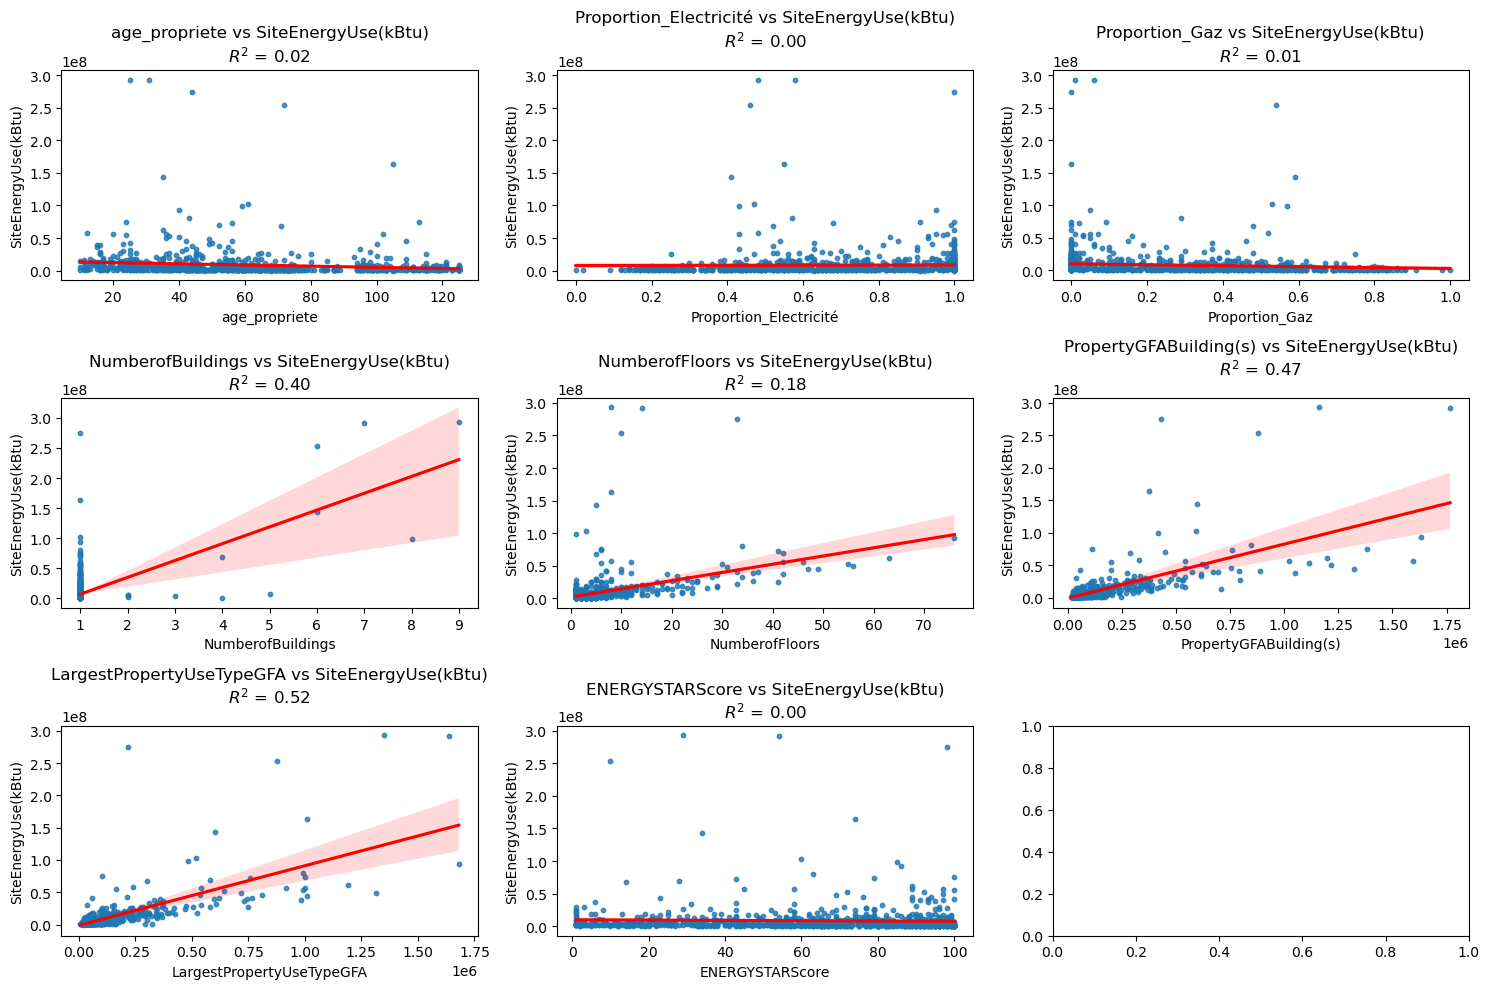

In [229]:
# Liste des variables quantitatives que tu veux analyser avec TotalGHGEmissions
variables = ['age_propriete', 'Proportion_Electricité', 'Proportion_Gaz', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA','ENERGYSTARScore']

# Créer une figure avec des sous-graphes'Proportion_Electricité', 'Proportion_Gaz', 
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # Aplatir pour faciliter l'indexation

# Pour chaque variable dans la liste, créer un nuage de points avec la droite de régression
for idx, var in enumerate(variables):
    # Créer le nuage de points avec la droite de régression
    sns.regplot(x=var, y='SiteEnergyUse(kBtu)', data=X_temp2, ax=axes[idx], scatter_kws={'s': 10}, line_kws={'color': 'red'})
    
    # Calculer le coefficient de corrélation R2
    x_data = X_temp2[var].dropna()
    y_data = X_temp2['SiteEnergyUse(kBtu)'].dropna()
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)
    r2 = r_value ** 2
    
    # Ajouter le titre avec R2
    axes[idx].set_title(f'{var} vs SiteEnergyUse(kBtu)\n$R^2$ = {r2:.2f}')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('SiteEnergyUse(kBtu)')   
    
# Ajuster la mise en page pour éviter le chevauchement des titres
plt.tight_layout()
plt.show()

Étant donné qu'une régression linéaire ne montre pas de relations évidentes, nous allons maintenant calculer les coefficients de corrélation de Spearman pour évaluer la force de la relation monotone entre chacune des variables explicatives et la cible TotalGHGEmissions. Ce test est non paramétrique et peut capturer des relations qui ne sont pas nécessairement linéaires, mais qui peuvent encore être significatives.

In [230]:
# Calculer les coefficients de corrélation de Spearman entre les variables explicatives et la cible
spearman_corr = X_temp2[variables + ['SiteEnergyUse(kBtu)']].corr(method='spearman')

# Extraire les corrélations avec la cible 'SiteEnergyUse(kBtu)'
corr_with_target = spearman_corr['SiteEnergyUse(kBtu)'].drop('SiteEnergyUse(kBtu)')  # On retire la corrélation de la variable avec elle-même

# Afficher les résultats
print(corr_with_target)

age_propriete               -0.298340
Proportion_Electricité       0.024222
Proportion_Gaz              -0.076950
NumberofBuildings            0.105664
NumberofFloors               0.561678
PropertyGFABuilding(s)       0.771874
LargestPropertyUseTypeGFA    0.760114
ENERGYSTARScore             -0.131070
Name: SiteEnergyUse(kBtu), dtype: float64


C:\Users\joan6\AppData\Local\Temp\ipykernel_32500\3645096181.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette="Blues_r")


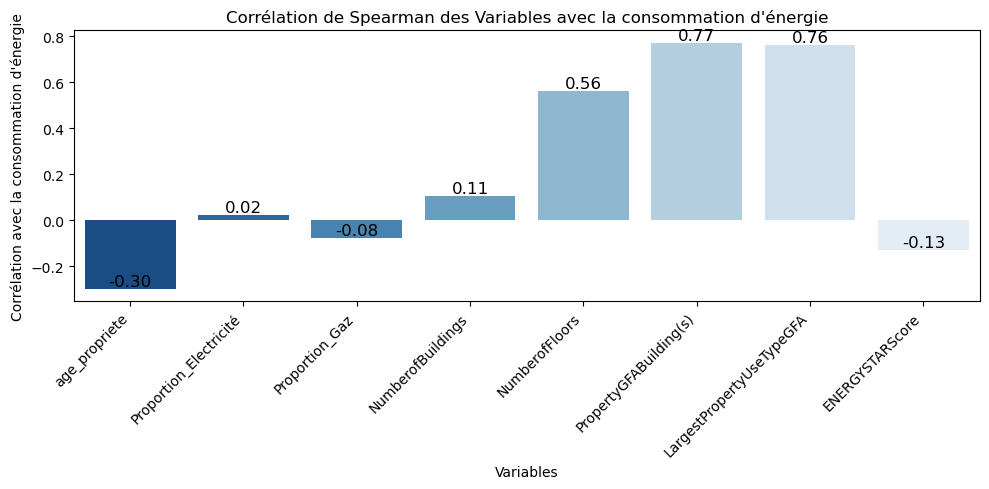

In [244]:
# Discrétisation de NumberofFloors en 3 catégories
floor_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
X_temp2['NumberofFloors_binned'] = floor_discretizer.fit_transform(X_temp2[['NumberofFloors']])

# Recalculer la corrélation de Spearman
corr_with_target = X_temp2[['age_propriete', 'Proportion_Electricité', 'Proportion_Gaz', 'NumberofBuildings',
                             'NumberofFloors', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA','ENERGYSTARScore']].corrwith(
                            X_temp2['SiteEnergyUse(kBtu)'], method='spearman')
# Création du graphique
plt.figure(figsize=(10, 5))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette="Blues_r")

# Ajouter les valeurs sur les barres
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=12)

# Personnalisation
plt.title("Corrélation de Spearman des Variables avec la consommation d'énergie")
plt.xlabel("Variables")
plt.ylabel("Corrélation avec la consommation d'énergie")
plt.xticks(rotation=45, ha="right", fontsize=10)

# Afficher le graphique
plt.tight_layout()
plt.show()

Variables avec corrélation positive (directe) :<br>
PropertyGFABuilding(s) (0.7719) :<br>
La surface brute totale des bâtiments est fortement corrélée avec la consommation énergétique. Cela est attendu car des bâtiments plus grands consomment généralement plus d'énergie.<br>

LargestPropertyUseTypeGFA (0.7601) :<br>
La surface brute associée au plus grand usage d'un bâtiment est également fortement corrélée, renforçant l'idée que la taille d'une zone dédiée à une utilisation spécifique joue un rôle important dans la consommation.

NumberofFloors (0.5617) :<br>
Le nombre d'étages présente une corrélation modérée avec la consommation énergétique, indiquant que les bâtiments plus hauts ont tendance à consommer plus.<br>

NumberofBuildings (0.1057) :<br>
Corrélation faible mais positive ; plus il y a de bâtiments sur une propriété, plus la consommation énergétique augmente, mais l'impact reste limité.<br>

Proportion_Électricité (0.0253) :<br>
Corrélation très faible ; l'utilisation de l'électricité n'a pas de lien significatif direct avec la consommation énergétique totale.<br>

Variables avec corrélation négative (inverse) :<br>
age_propriete (-0.2983) :<br>
Corrélation modérée et négative. Les bâtiments plus anciens semblent consommer moins d'énergie, ce qui peut être lié à des tailles généralement plus petites ou à des normes énergétiques différentes.

Proportion_Gaz (-0.0770) :<br>
Faible corrélation négative, ce qui indique que l'utilisation accrue de gaz pourrait légèrement réduire la consommation totale d'énergie en kBtu.

ENERGYSTARScore (-0.1311) :<br>
Corrélation faible mais négative. Les bâtiments ayant un meilleur score ENERGY STAR consomment légèrement moins d'énergie, ce qui est cohérent avec les objectifs d'efficacité énergétique.

Observations générales :<br>
Les variables liées à la taille des bâtiments (PropertyGFABuilding(s), LargestPropertyUseTypeGFA, NumberofFloors) dominent en termes de corrélation avec la consommation énergétique, soulignant leur importance pour modéliser la cible.
Les corrélations négatives, bien que faibles, indiquent des pistes pour des interventions possibles, comme améliorer l'efficacité énergétique (via ENERGY STAR) ou cibler les bâtiments plus anciens.

In [233]:
import pickle

# Sauvegarder X
with open('X.pkl', 'wb') as fichier_X:
    pickle.dump(X, fichier_X)

# Sauvegarder X_temp
with open('X_temp.pkl', 'wb') as fichier_X_temp:
    pickle.dump(X_temp, fichier_X_temp)
    
# Sauvegarder X_temp2
with open('X_temp2.pkl', 'wb') as fichier_X_temp2:
    pickle.dump(X_temp2, fichier_X_temp2)
    
# Sauvegarder y
with open('y.pkl', 'wb') as fichier_y:
    pickle.dump(y, fichier_y)

# Sauvegarder y2
with open('y2.pkl', 'wb') as fichier_y2:
    pickle.dump(y2, fichier_y2)

print("Tableaux sauvegardés avec succès !")

Tableaux sauvegardés avec succès !
